Задание. Регрессионный анализ «Квартиры»
1. Импортировать данные из файлы “flats.csv”.
2. Переименовать столбцы (латиницей).
3. Построить все возможные графики для визуализации данных и их взаимосвязей
(гистограммы, диаграммы рассеяния, диаграммы размаха).
4. Проверить все взаимосвязи факторов друг в другом и их влияние на зависимую
переменную.
5. Построить парную модель регрессии цены от метража.
6. Проверить остатки на нормальность.
7. Проверить на гетероскедастичность.
8. Устранить гетероскедастичность (двумя способами: делением на значение фактора и
логарифмированием зависимой переменной).
9. Построить новую парную модель.
10. Проверить остатки новой модели на нормальность.
11. Проверить остатки новой модели на гетероскедастичность.
12. Построить диаграмму рассеяния, линию регрессии, доверительные интервалы для
функции регрессии и для прогноза.
13. Построить модель множественной регрессии на все факторы.
14. Удалить незначимые факторы, объяснить, почему факторы незначимы и построить новую
модель.
15. Построить прогноз для «своей квартиры» в соответствии с множественной моделью.
16. Провести анализ остатков.
17. Устранить гетероскедастичность логарифмированием зависимой переменной.

# 1. Импортировать данные из файла “flats.csv”.
# 2. Переименовать столбцы (латиницей).

In [ ]:
# 1, 2

# Импорт данных из CSV
flats <- read.csv("flats.csv", sep=";", header=TRUE, stringsAsFactors=FALSE, fileEncoding="Windows-1251")

# Проверка заголовков
print(colnames(flats))

# Переименование столбцов
colnames(flats) <- c("Type", "Rental_Value", "Floor", "Total_Floors", "Area", "Furniture")

flats$Area <- as.numeric(gsub(",", ".", flats$Area))  # Заменяем запятые на точки и преобразуем в число

# Просмотр первых строк для проверки
head(flats)

[1] "Тип"                            "Арендная.плаиа"                
[3] "Этаж"                           "Общее.количество.этажей.в.доме"
[5] "Площадь"                        "Мебель"                        


,Type,Rental_Value,Floor,Total_Floors,Area,Furniture
,<chr>,<int>,<int>,<int>,<dbl>,<chr>
1,студия,8500,1,5,15.0,нет
2,студия,9000,1,5,14.0,нет
3,студия,9500,8,9,15.0,есть
4,студия,8000,1,5,12.2,есть
5,студия,9000,2,5,18.0,есть
6,студия,9000,1,5,14.0,есть


In [ ]:
str(flats) # информация о признаках

'data.frame':	50 obs. of  6 variables:
 $ Type        : chr  "студия" "студия" "студия" "студия" ...
 $ Rental_Value: int  8500 9000 9500 8000 9000 9000 10000 8000 6500 9000 ...
 $ Floor       : int  1 1 8 1 2 1 2 1 1 2 ...
 $ Total_Floors: int  5 5 9 5 5 5 5 5 3 4 ...
 $ Area        : num  15 14 15 12.2 18 14 19 14 13 13 ...
 $ Furniture   : chr  "нет" "нет" "есть" "есть" ...


In [ ]:
sum(duplicated(flats))

[1] 0

In [ ]:
colSums(is.na(flats))

Type Rental_Value        Floor Total_Floors         Area    Furniture 
           0            0            0            0            0            0

In [ ]:
table(flats$Type)


квартира   студия 
      35       15 

In [ ]:
table(flats$Rental_Value)


 1000  6500  7700  8000  8500  9000  9500 10000 11000 11500 12000 12500 13000 
    1     1     1     2     1     5     1     6     1     1     8     1     7 
13500 14000 15000 16000 17500 18000 19000 20000 25000 
    2     1     2     3     1     1     2     1     1 

In [ ]:
table(flats$Floor)


 1  2  3  4  5  6  7  8  9 10 13 
10 11  5 12  5  2  1  1  1  1  1 

In [ ]:
table(flats$Total_Floors)


 3  4  5  6  7  9 10 15 17 
 2  3 23  2  2  7  7  1  3 

In [ ]:
table(flats$Area)


   3   12 12.2   13   14   15   18   19   20   24   26 28.8   29   30   31   32 
   1    1    1    2    3    2    2    3    2    1    1    1    1    1    1    1 
  33   34   35   36 36.6   37   38   39   40   41   42   44   47   55 
   3    2    2    1    1    3    3    1    1    3    1    3    1    1 

In [ ]:
table(flats$Furniture)


есть  нет 
  37   13 

In [ ]:
summary(flats)

     Type            Rental_Value       Floor        Total_Floors  
 Length:50          Min.   : 1000   Min.   : 1.00   Min.   : 3.00  
 Class :character   1st Qu.:10000   1st Qu.: 2.00   1st Qu.: 5.00  
 Mode  :character   Median :12000   Median : 3.00   Median : 5.00  
                    Mean   :12274   Mean   : 3.58   Mean   : 7.16  
                    3rd Qu.:13500   3rd Qu.: 4.00   3rd Qu.: 9.00  
                    Max.   :25000   Max.   :13.00   Max.   :17.00  
      Area        Furniture        
 Min.   : 3.00   Length:50         
 1st Qu.:19.00   Class :character  
 Median :33.00   Mode  :character  
 Mean   :29.43                     
 3rd Qu.:38.00                     
 Max.   :55.00                     

# 3. Построить все возможные графики для визуализации данных и их взаимосвязей (гистограммы, диаграммы рассеяния, диаграммы размаха).

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


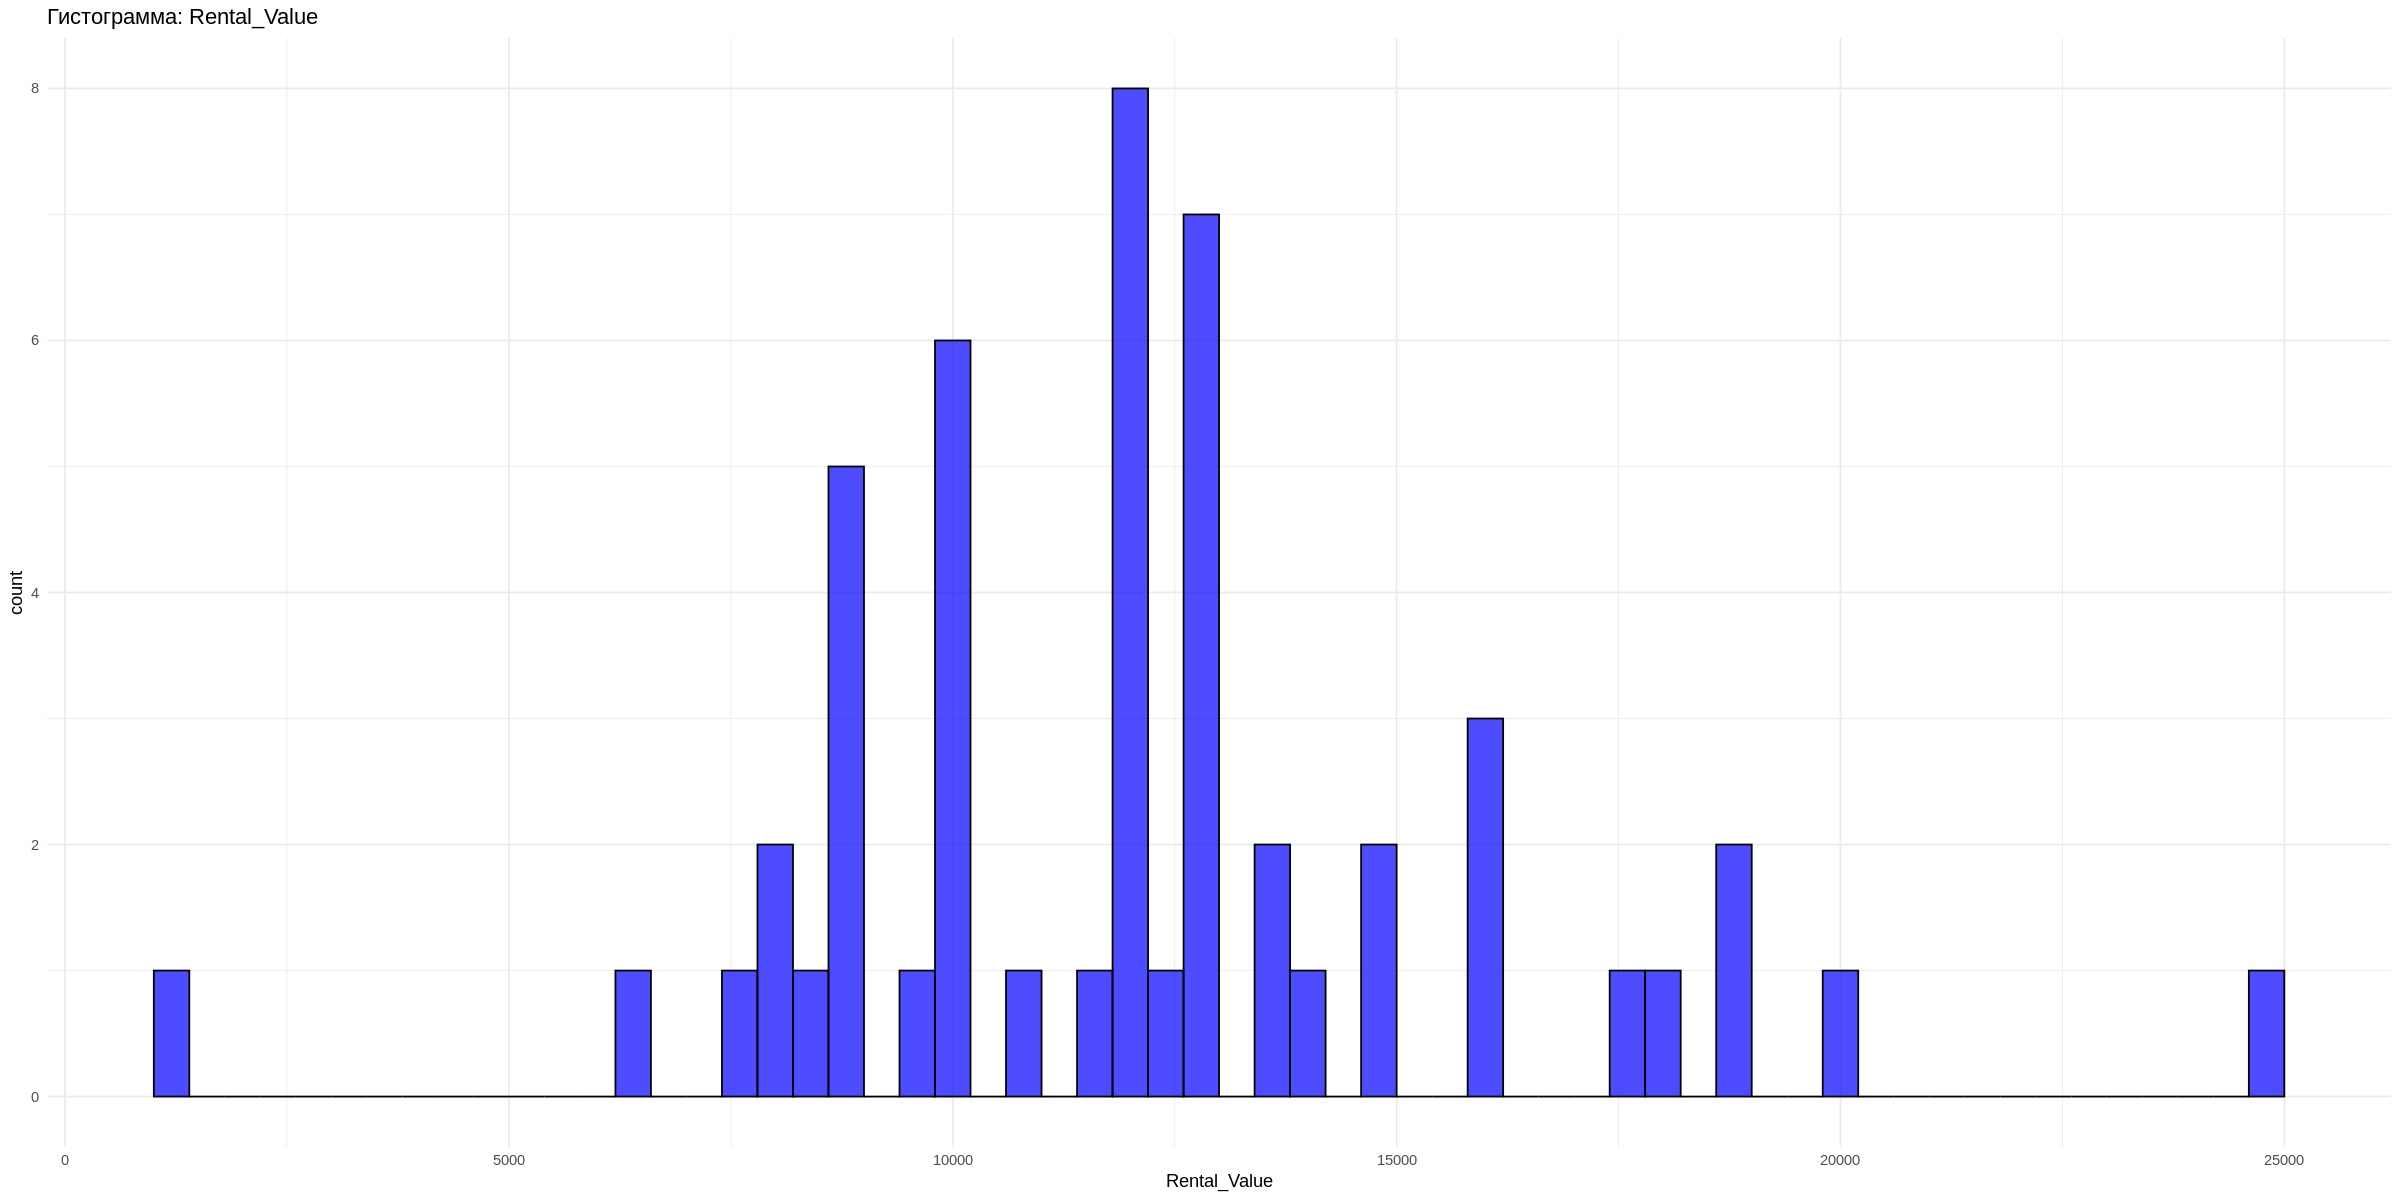

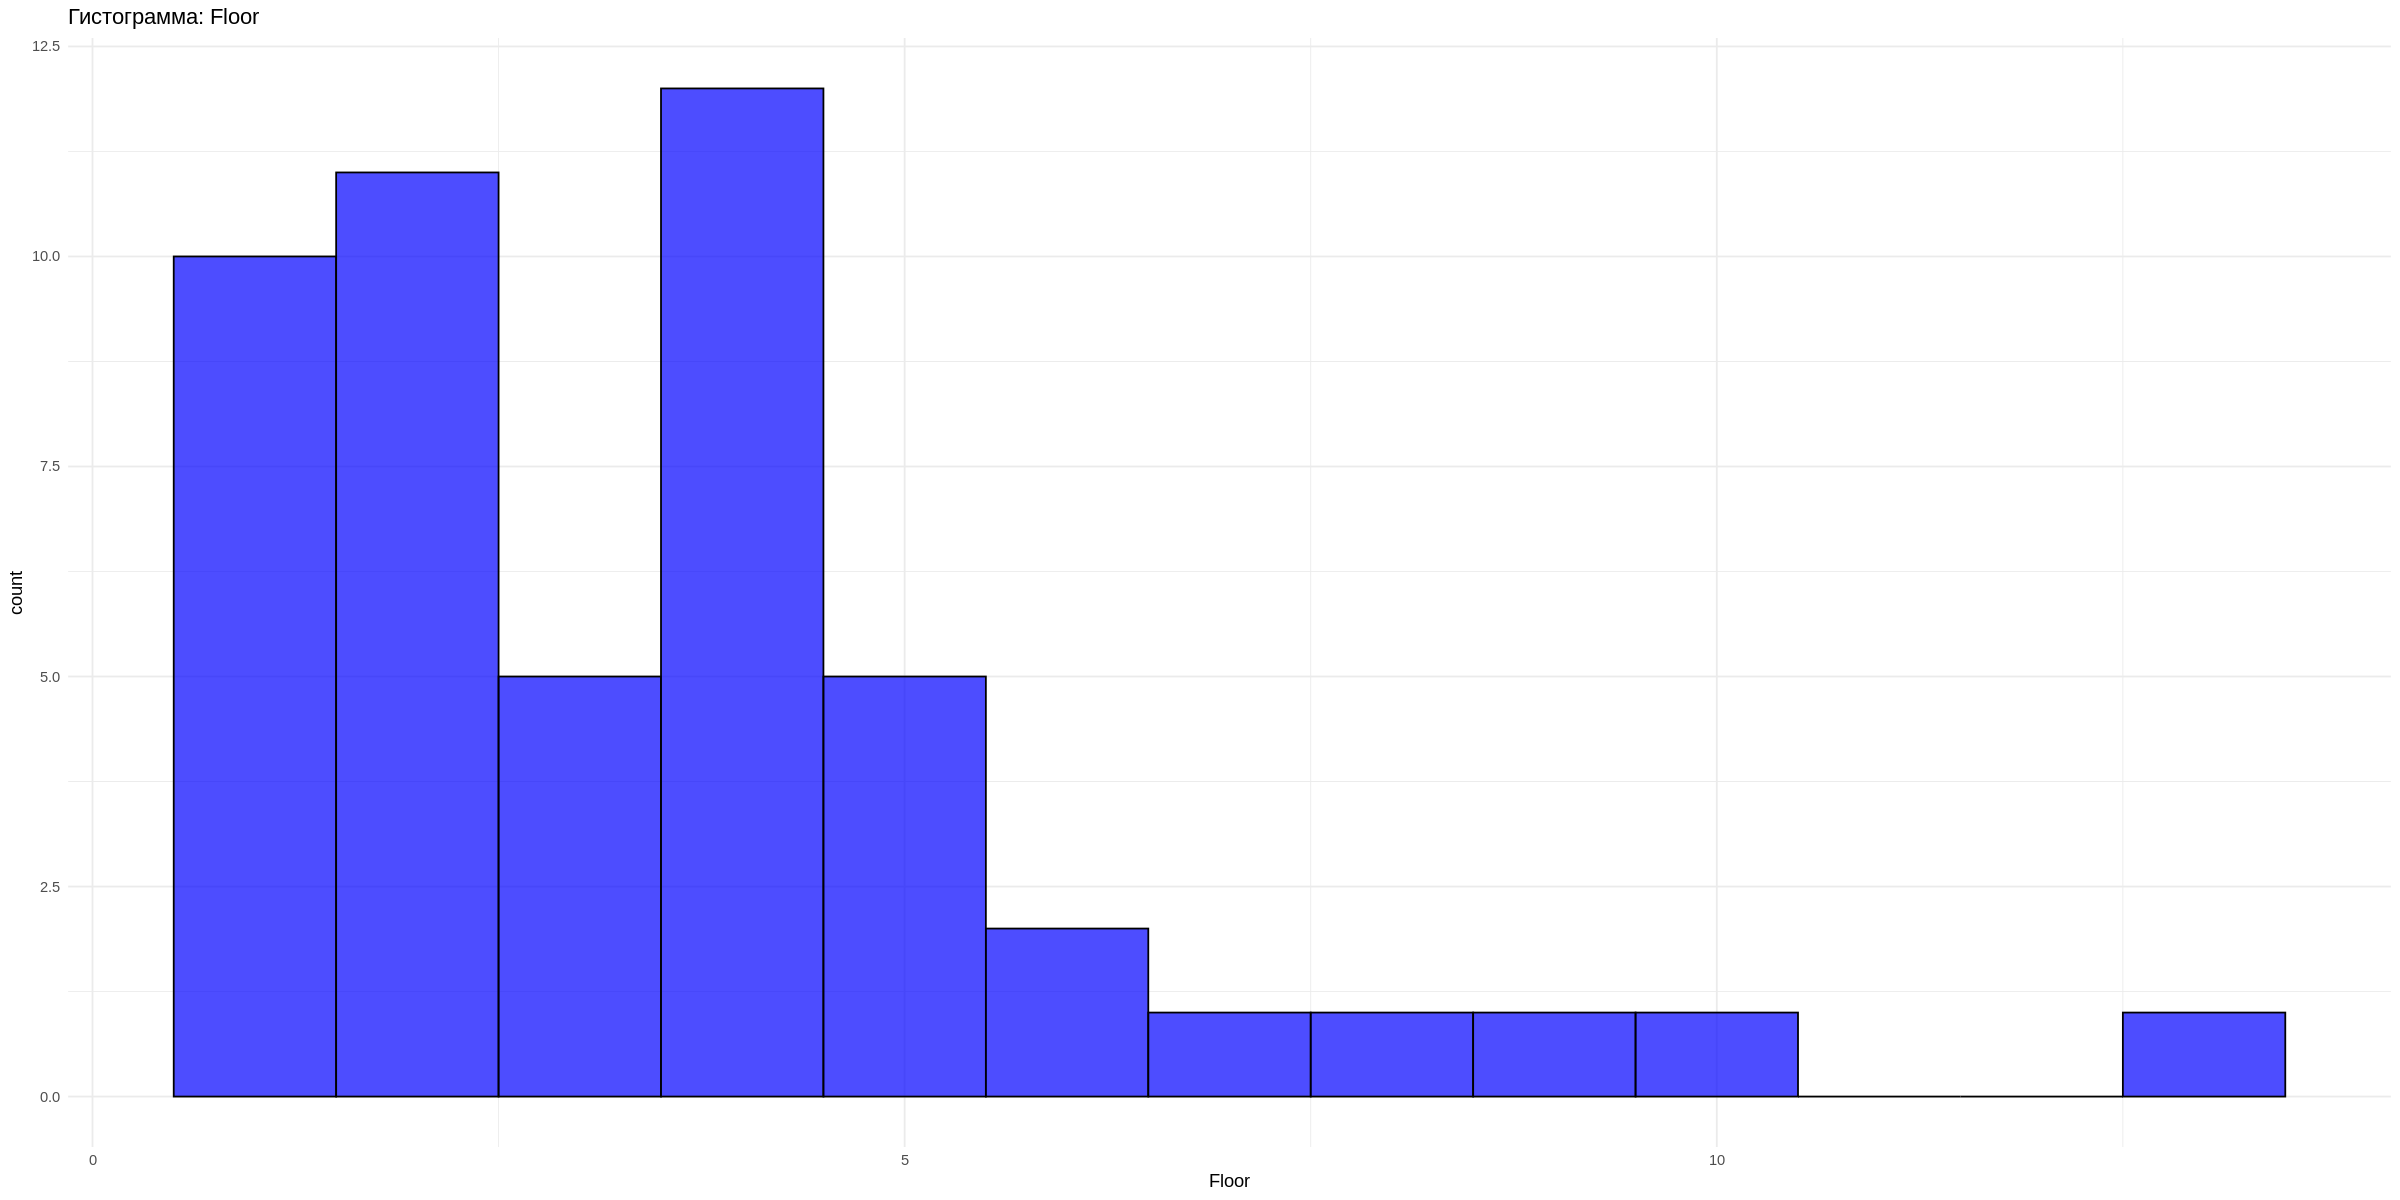

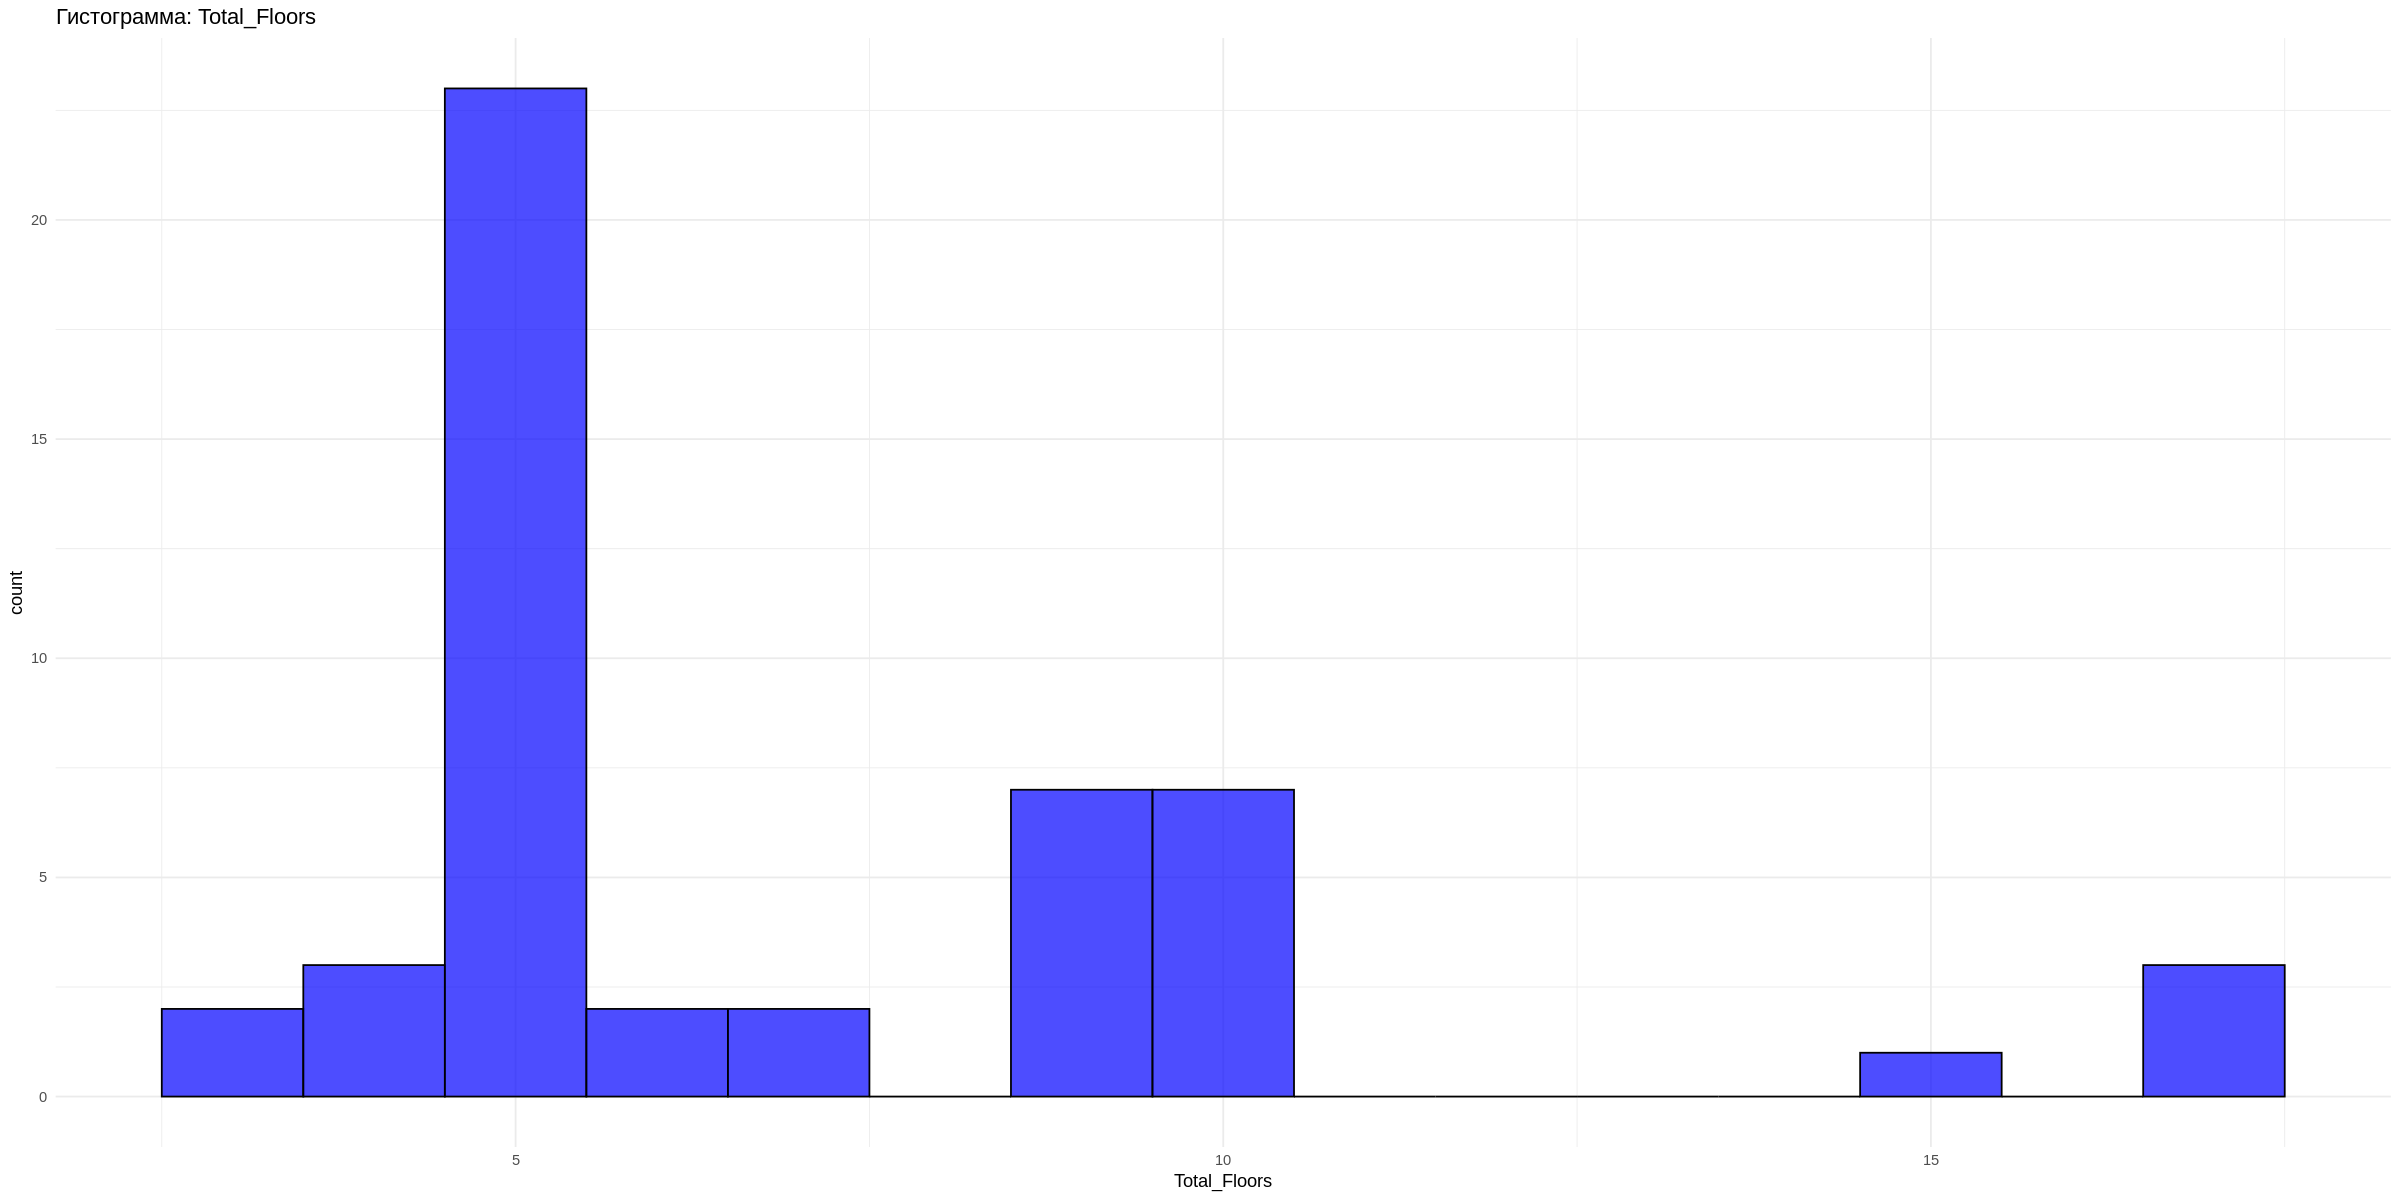

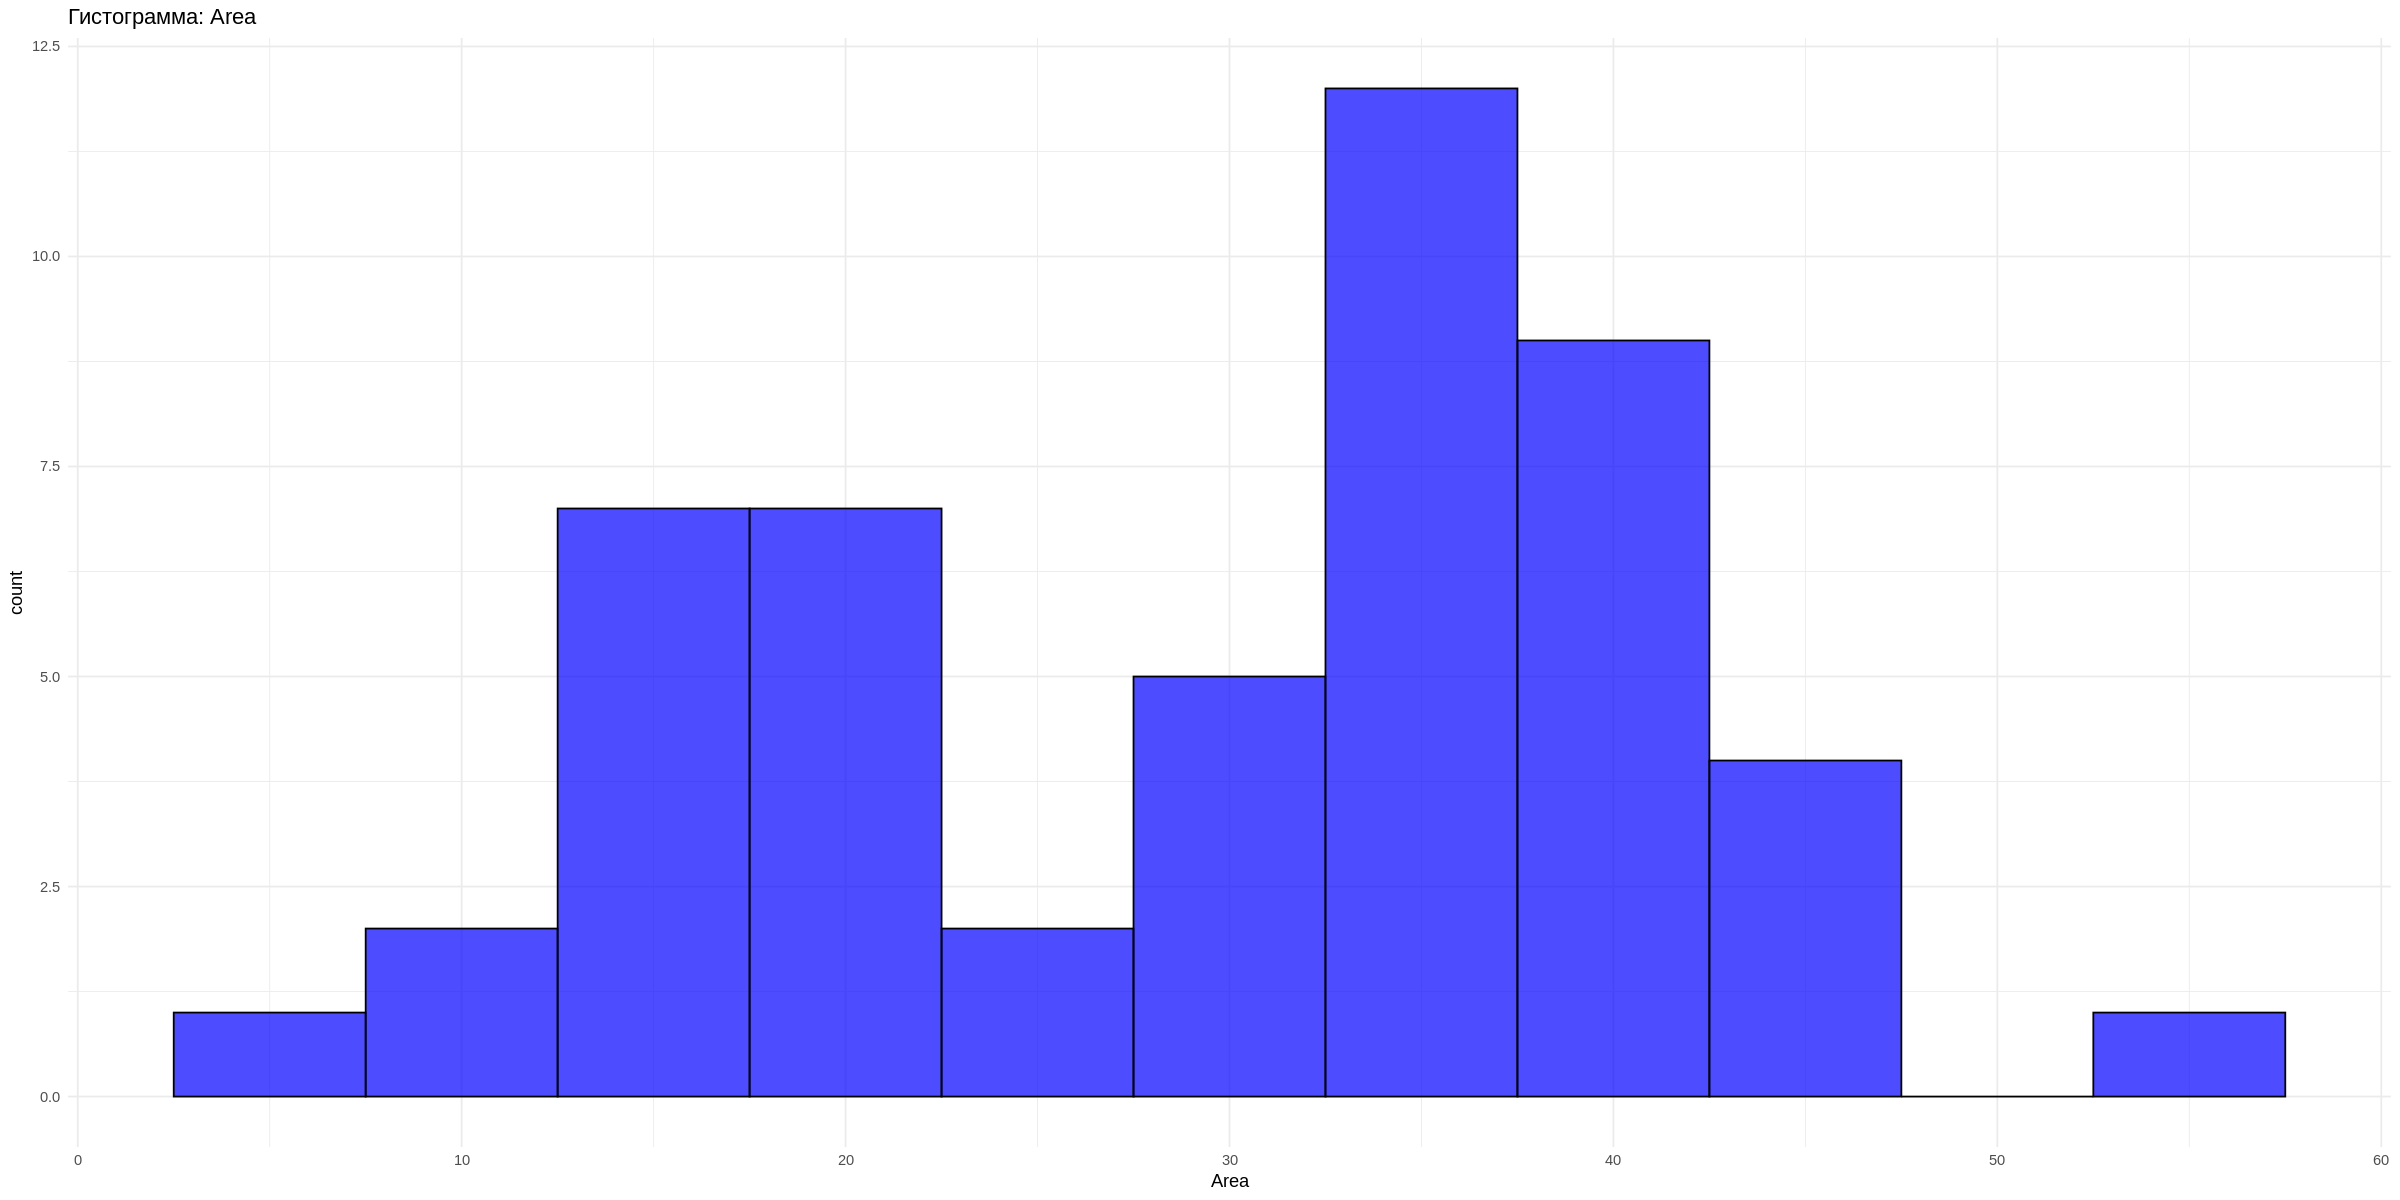

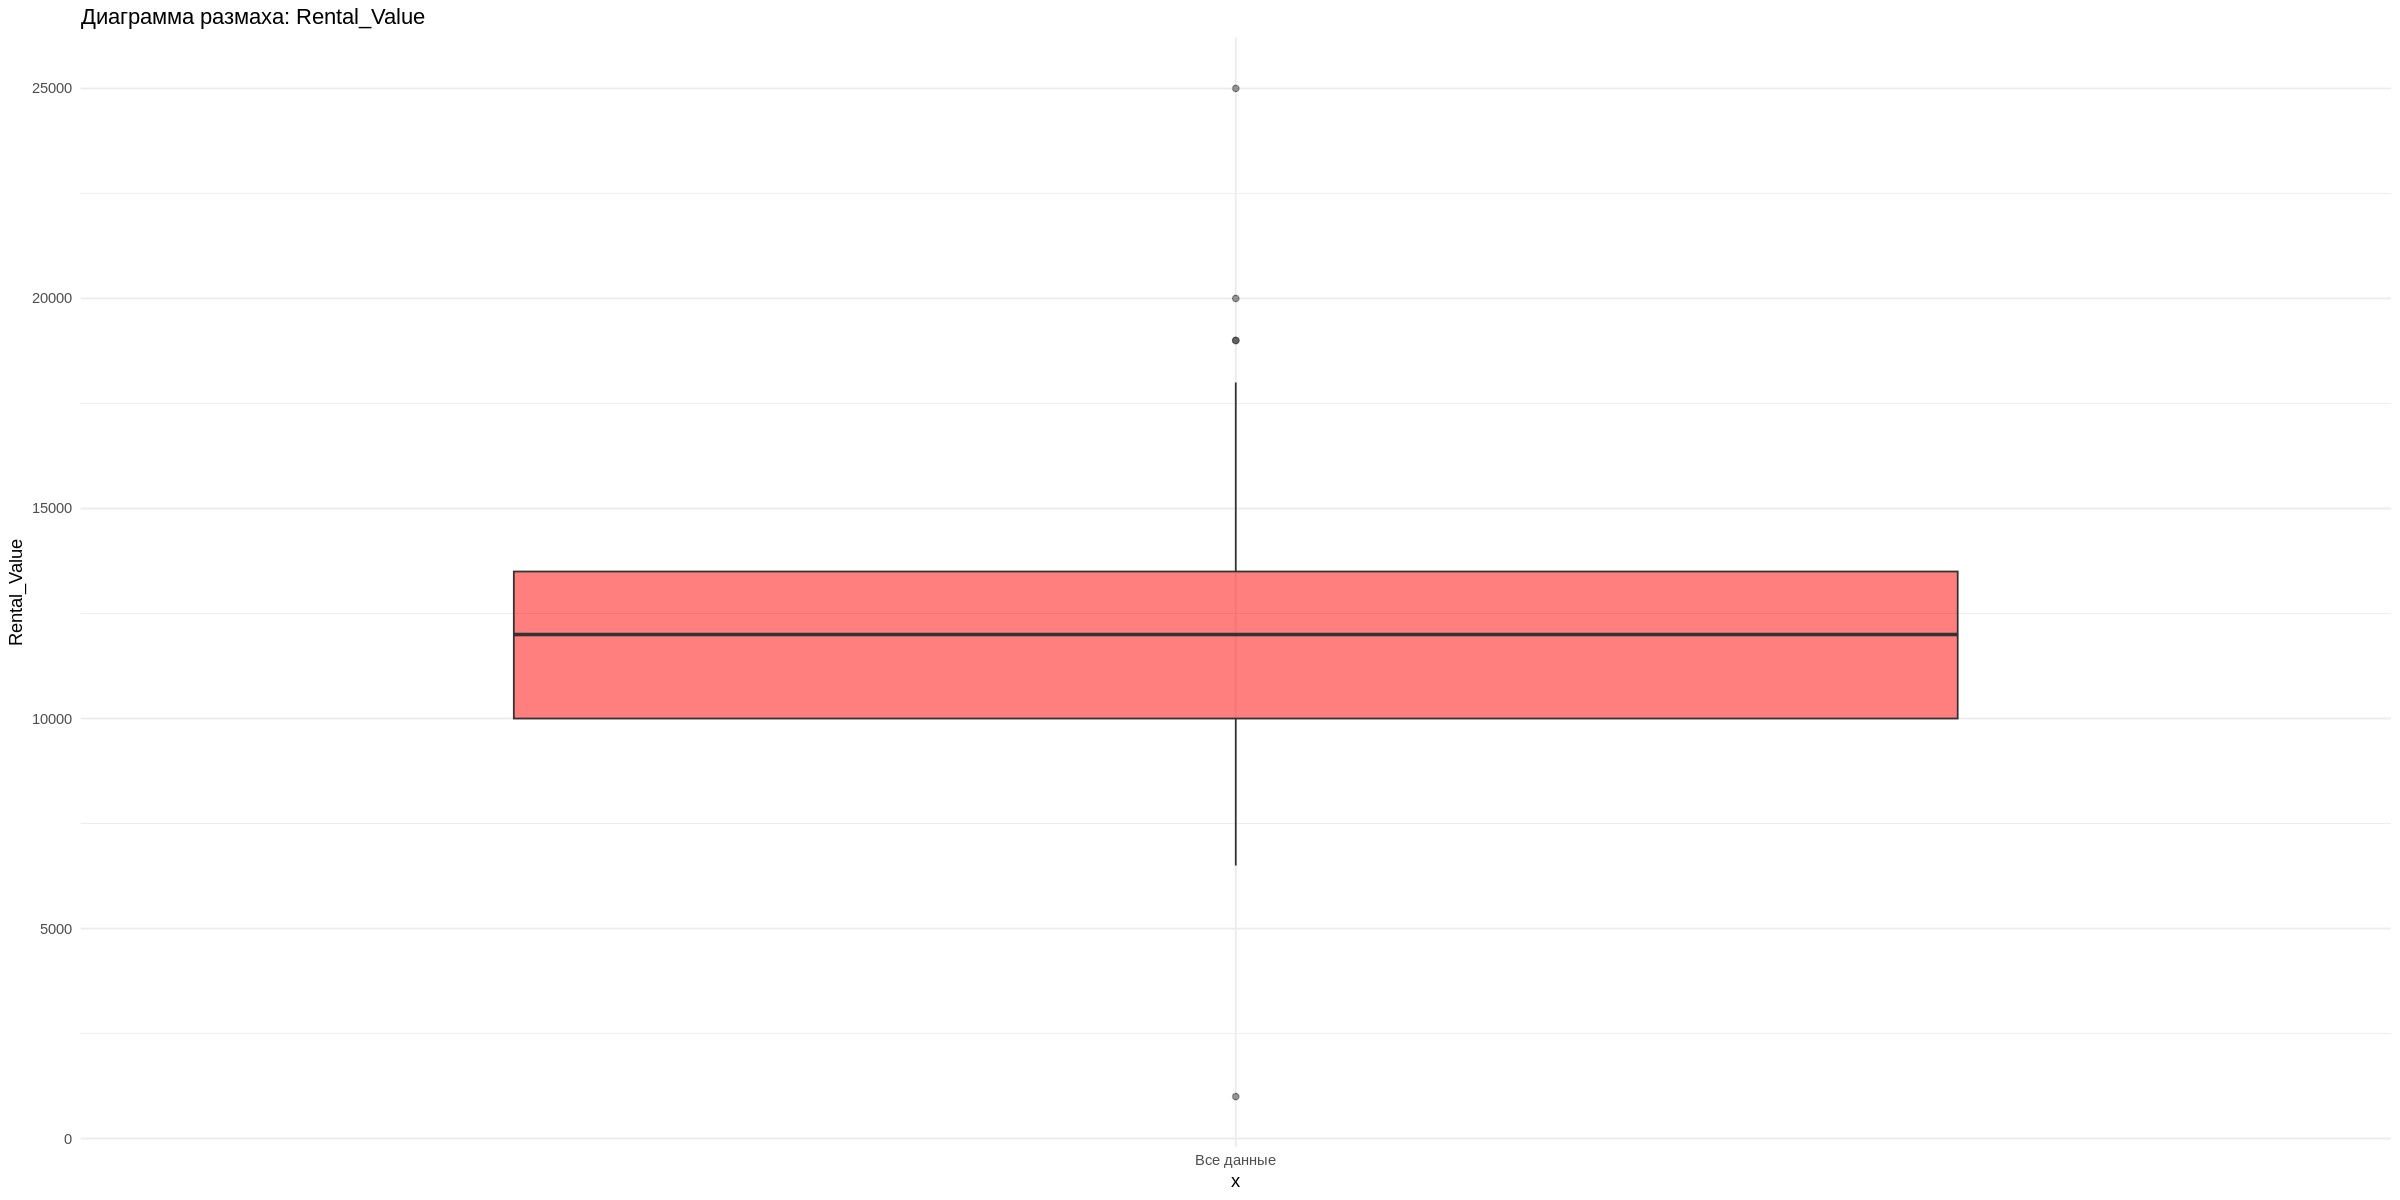

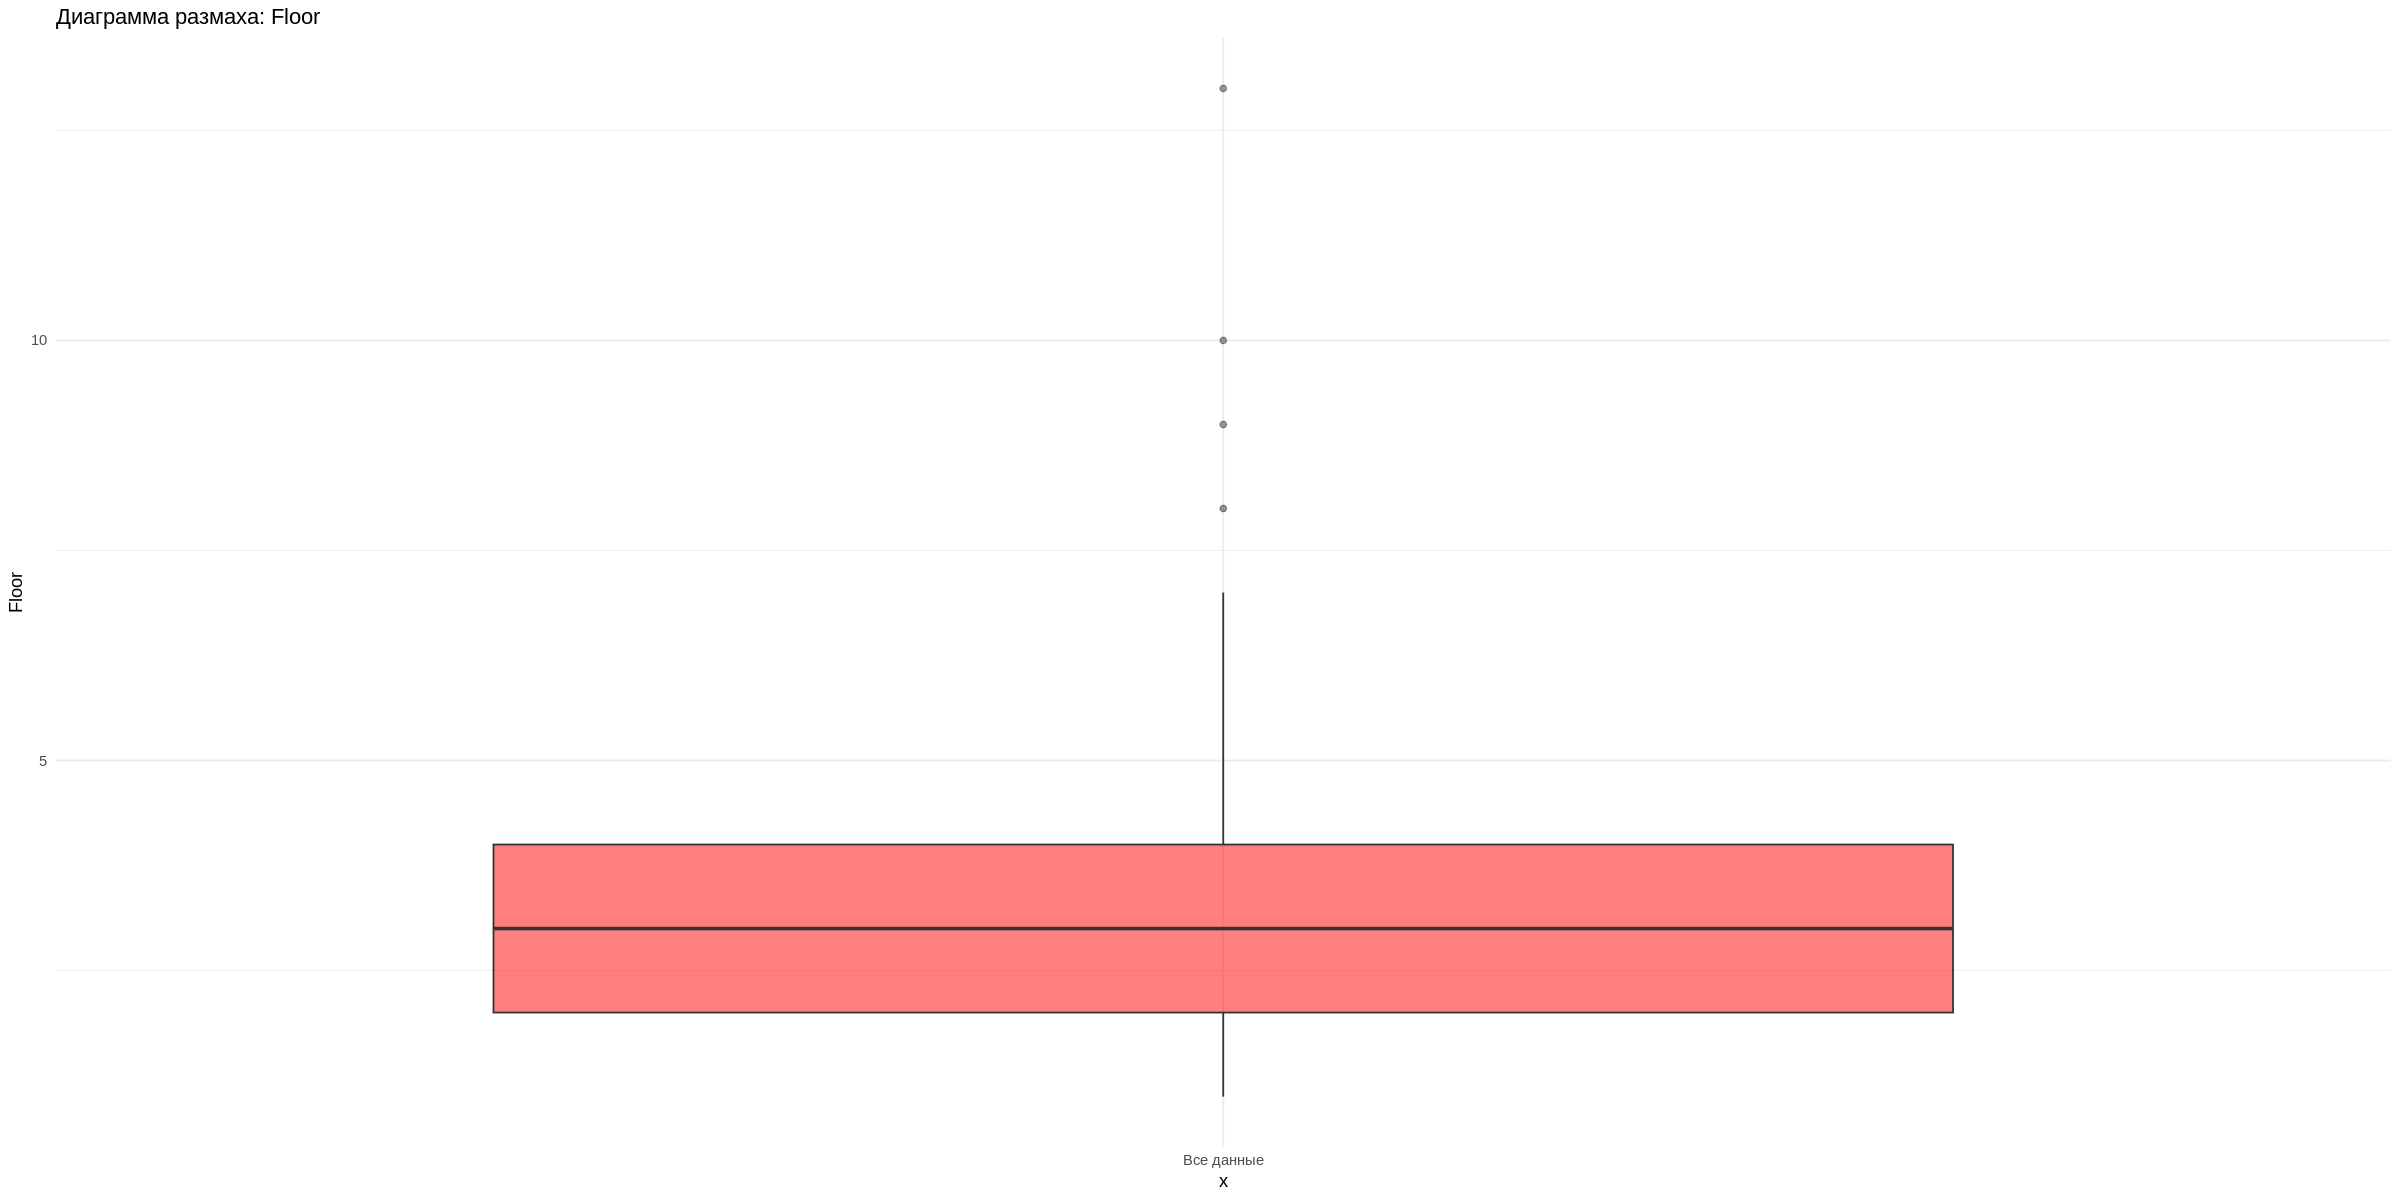

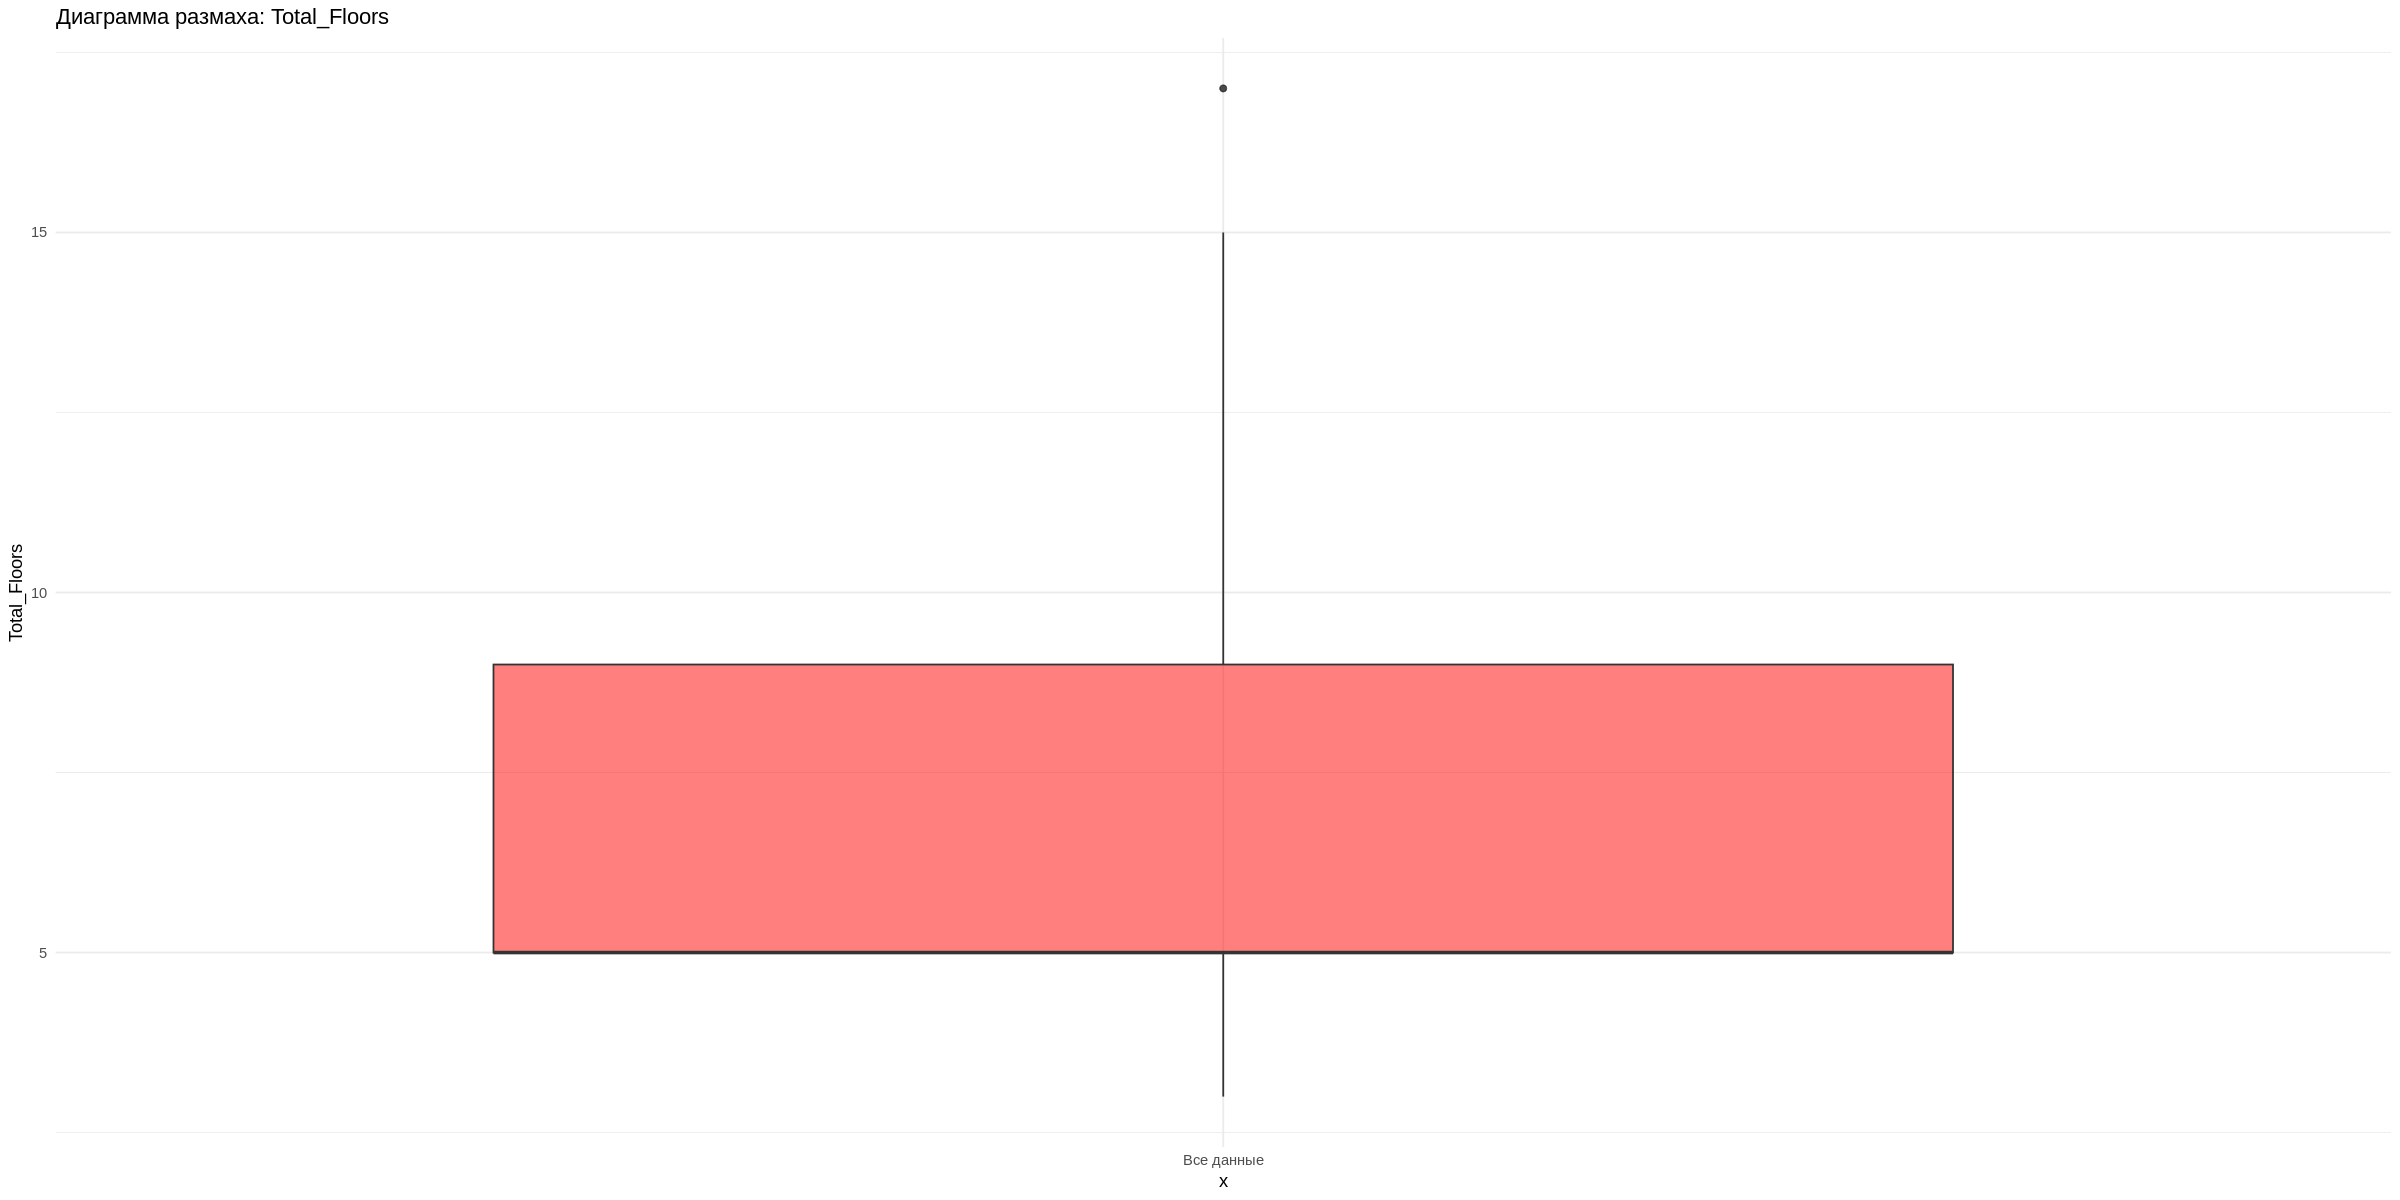

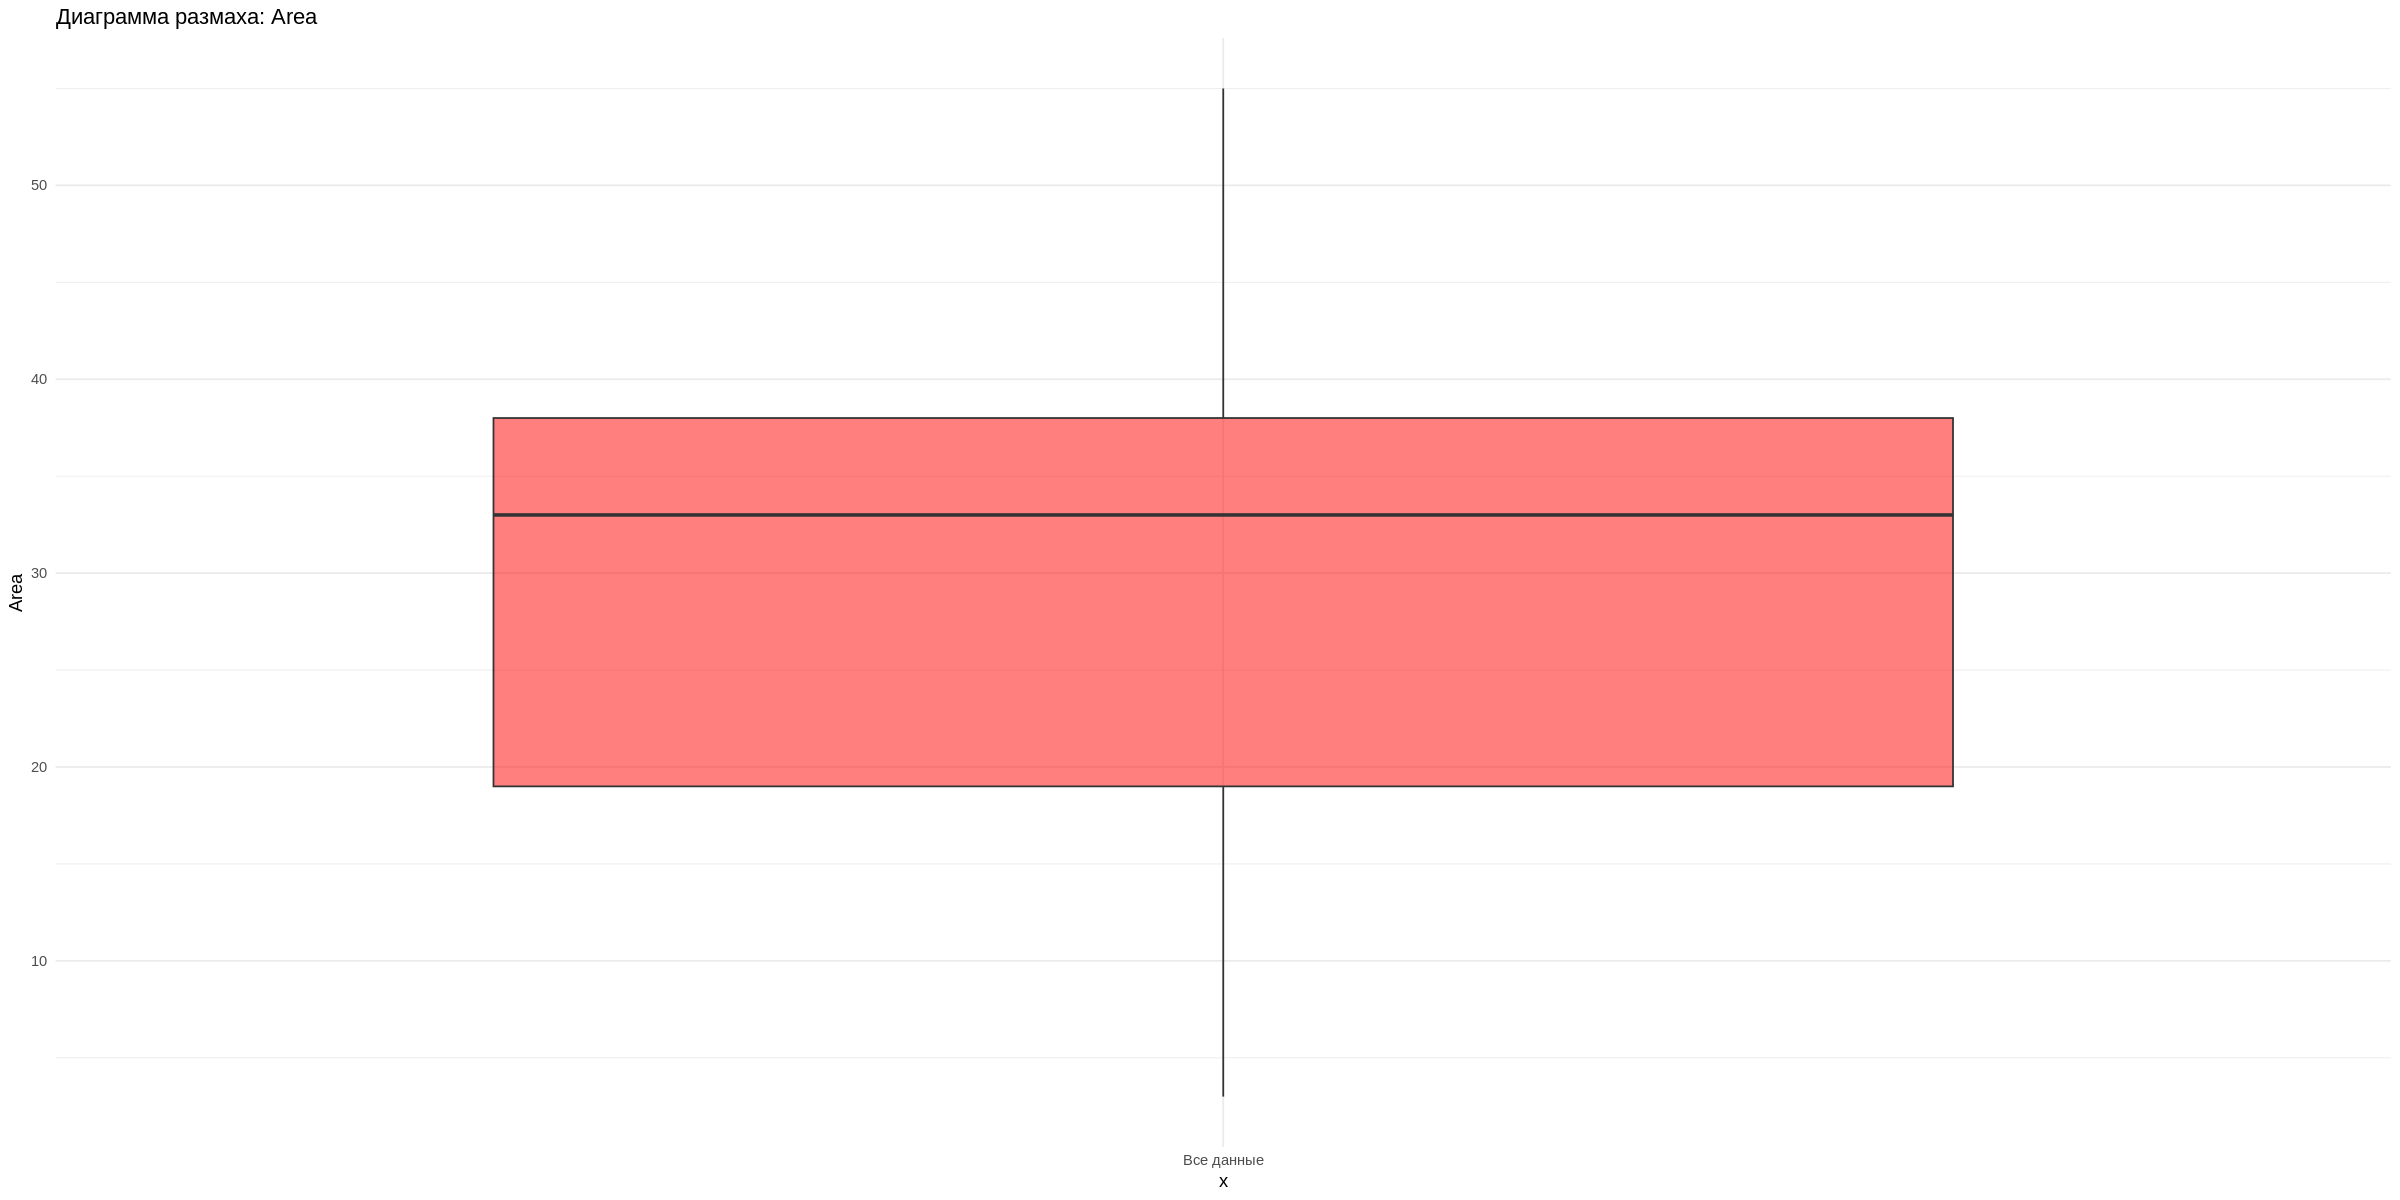

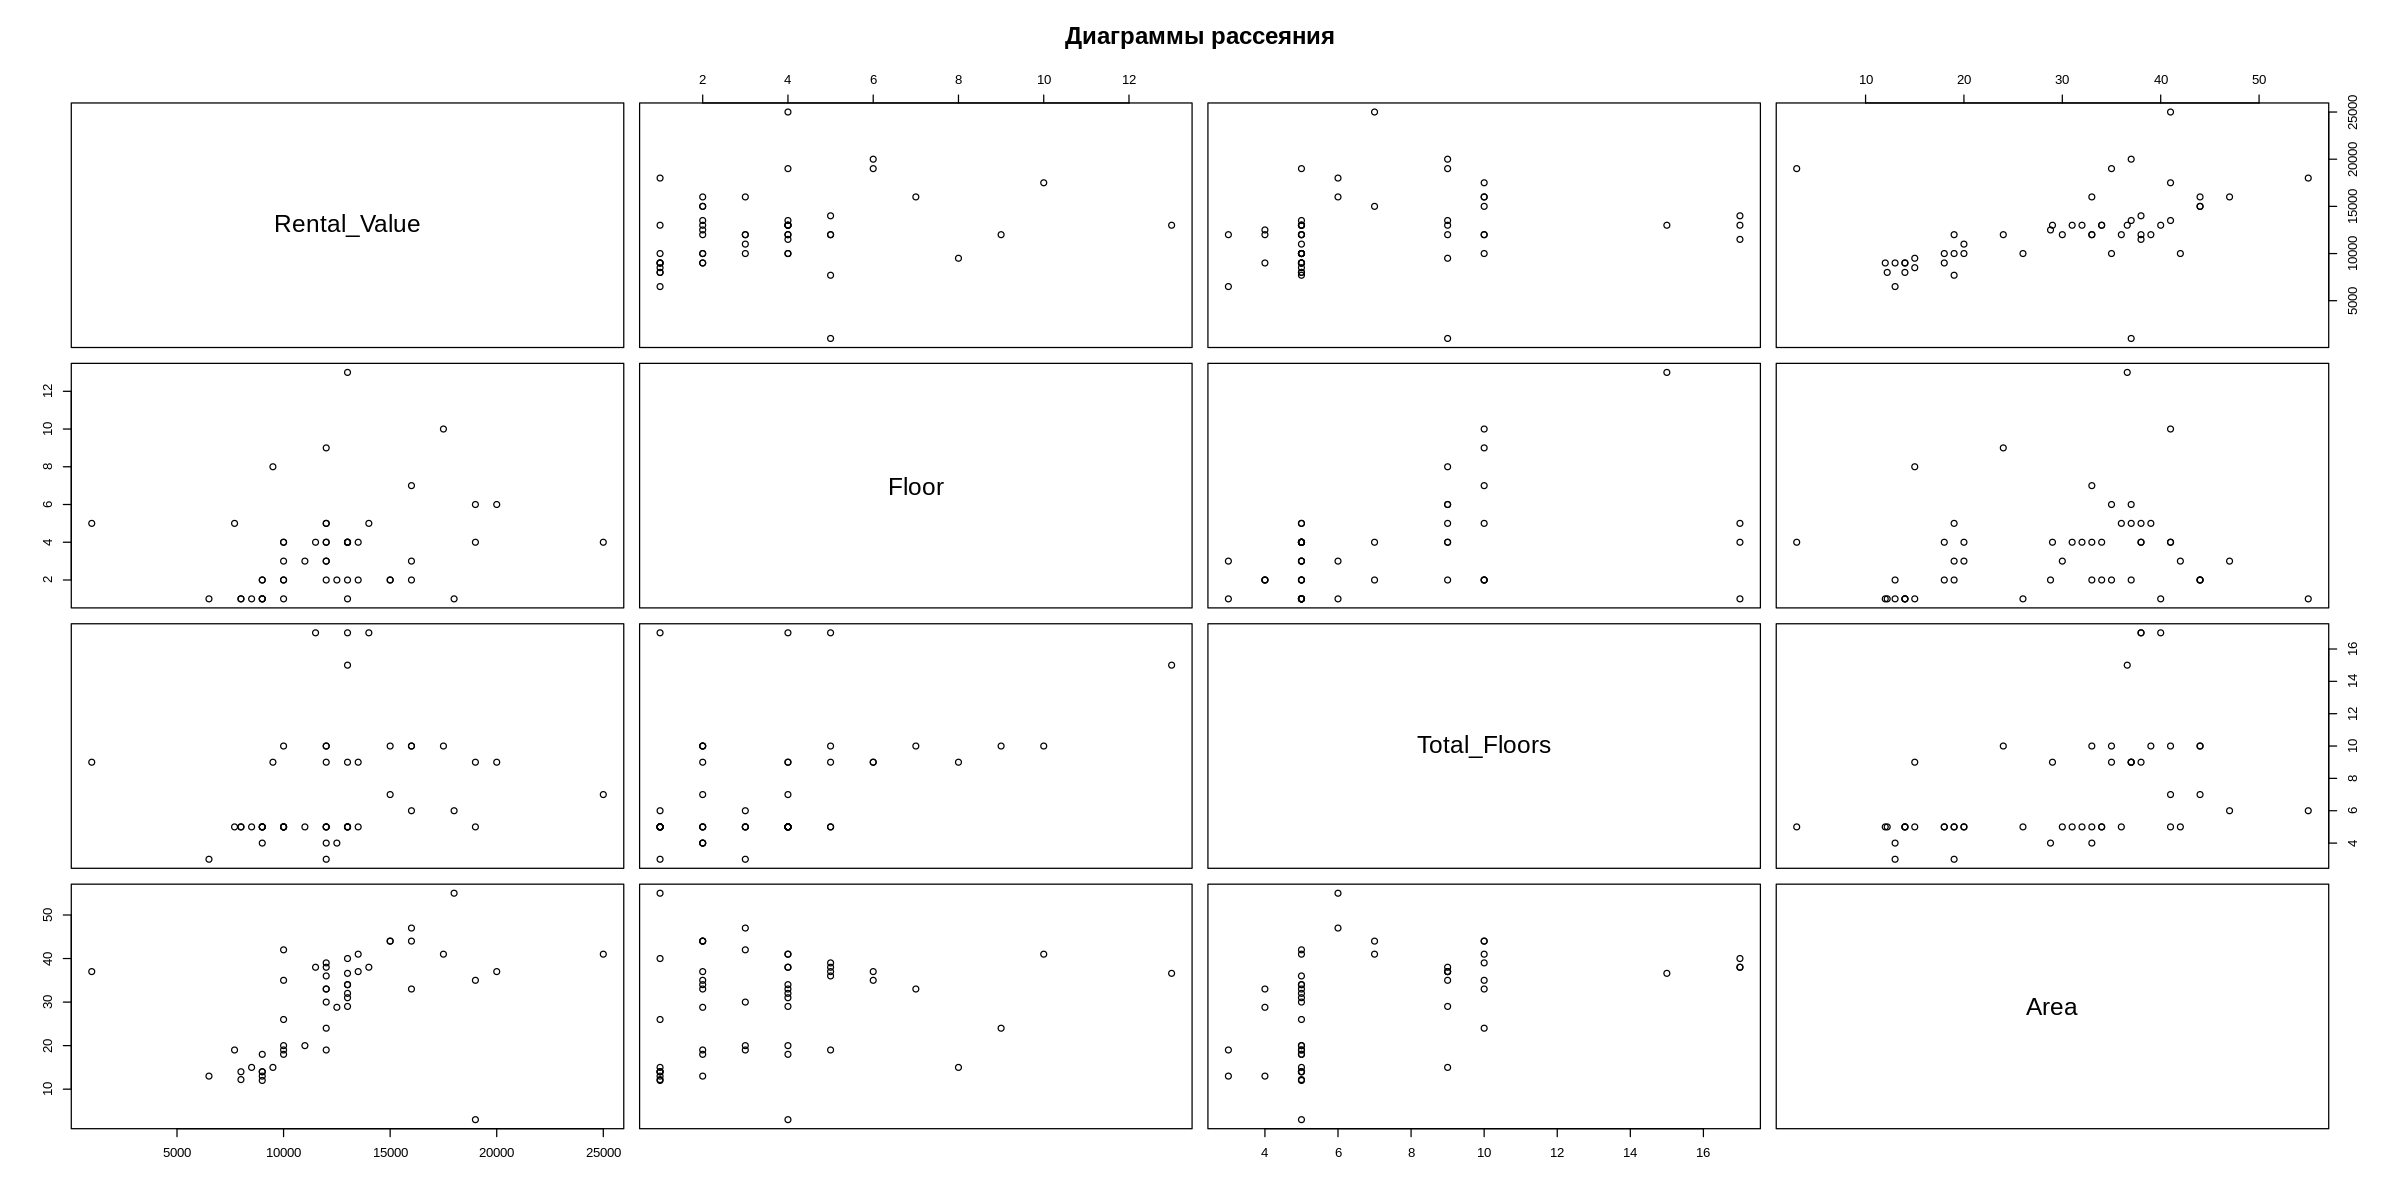

In [ ]:
# 3

# Подключение библиотеки
library(ggplot2)

# Гистограммы для всех числовых переменных
numeric_columns <- c("Rental_Value", "Floor", "Total_Floors", "Area")

options(repr.plot.width=20, repr.plot.height=10)  # Задает ширину и высоту

for (col in numeric_columns) {
  bin_width <- ifelse(col == "Rental_Value", 400, ifelse(col == "Area", 5, 1))  # Подбираем бины (ширина столбцов)

  p <- ggplot(flats, aes_string(x = col)) +
    geom_histogram(binwidth = bin_width, fill = "blue", color = "black", alpha = 0.7) +
    ggtitle(paste("Гистограмма:", col)) +
    theme_minimal()

  print(p)
}

# Диаграммы размаха (boxplot) для числовых переменных
for (col in numeric_columns) {
  p <- ggplot(flats, aes_string(x = "'Все данные'", y = col)) +
    geom_boxplot(fill = "red", alpha = 0.5) +
    ggtitle(paste("Диаграмма размаха:", col)) +
    theme_minimal()
  print(p)  # Вывод графика в цикле
}

# Диаграмма рассеяния для всех числовых переменных
pairs(flats[, numeric_columns], main = "Диаграммы рассеяния")


# 4. Проверить все взаимосвязи факторов друг с другом и их влияние на зависимую переменную.

In [ ]:
# 4

install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.95 loaded

`geom_smooth()` using formula = 'y ~ x'


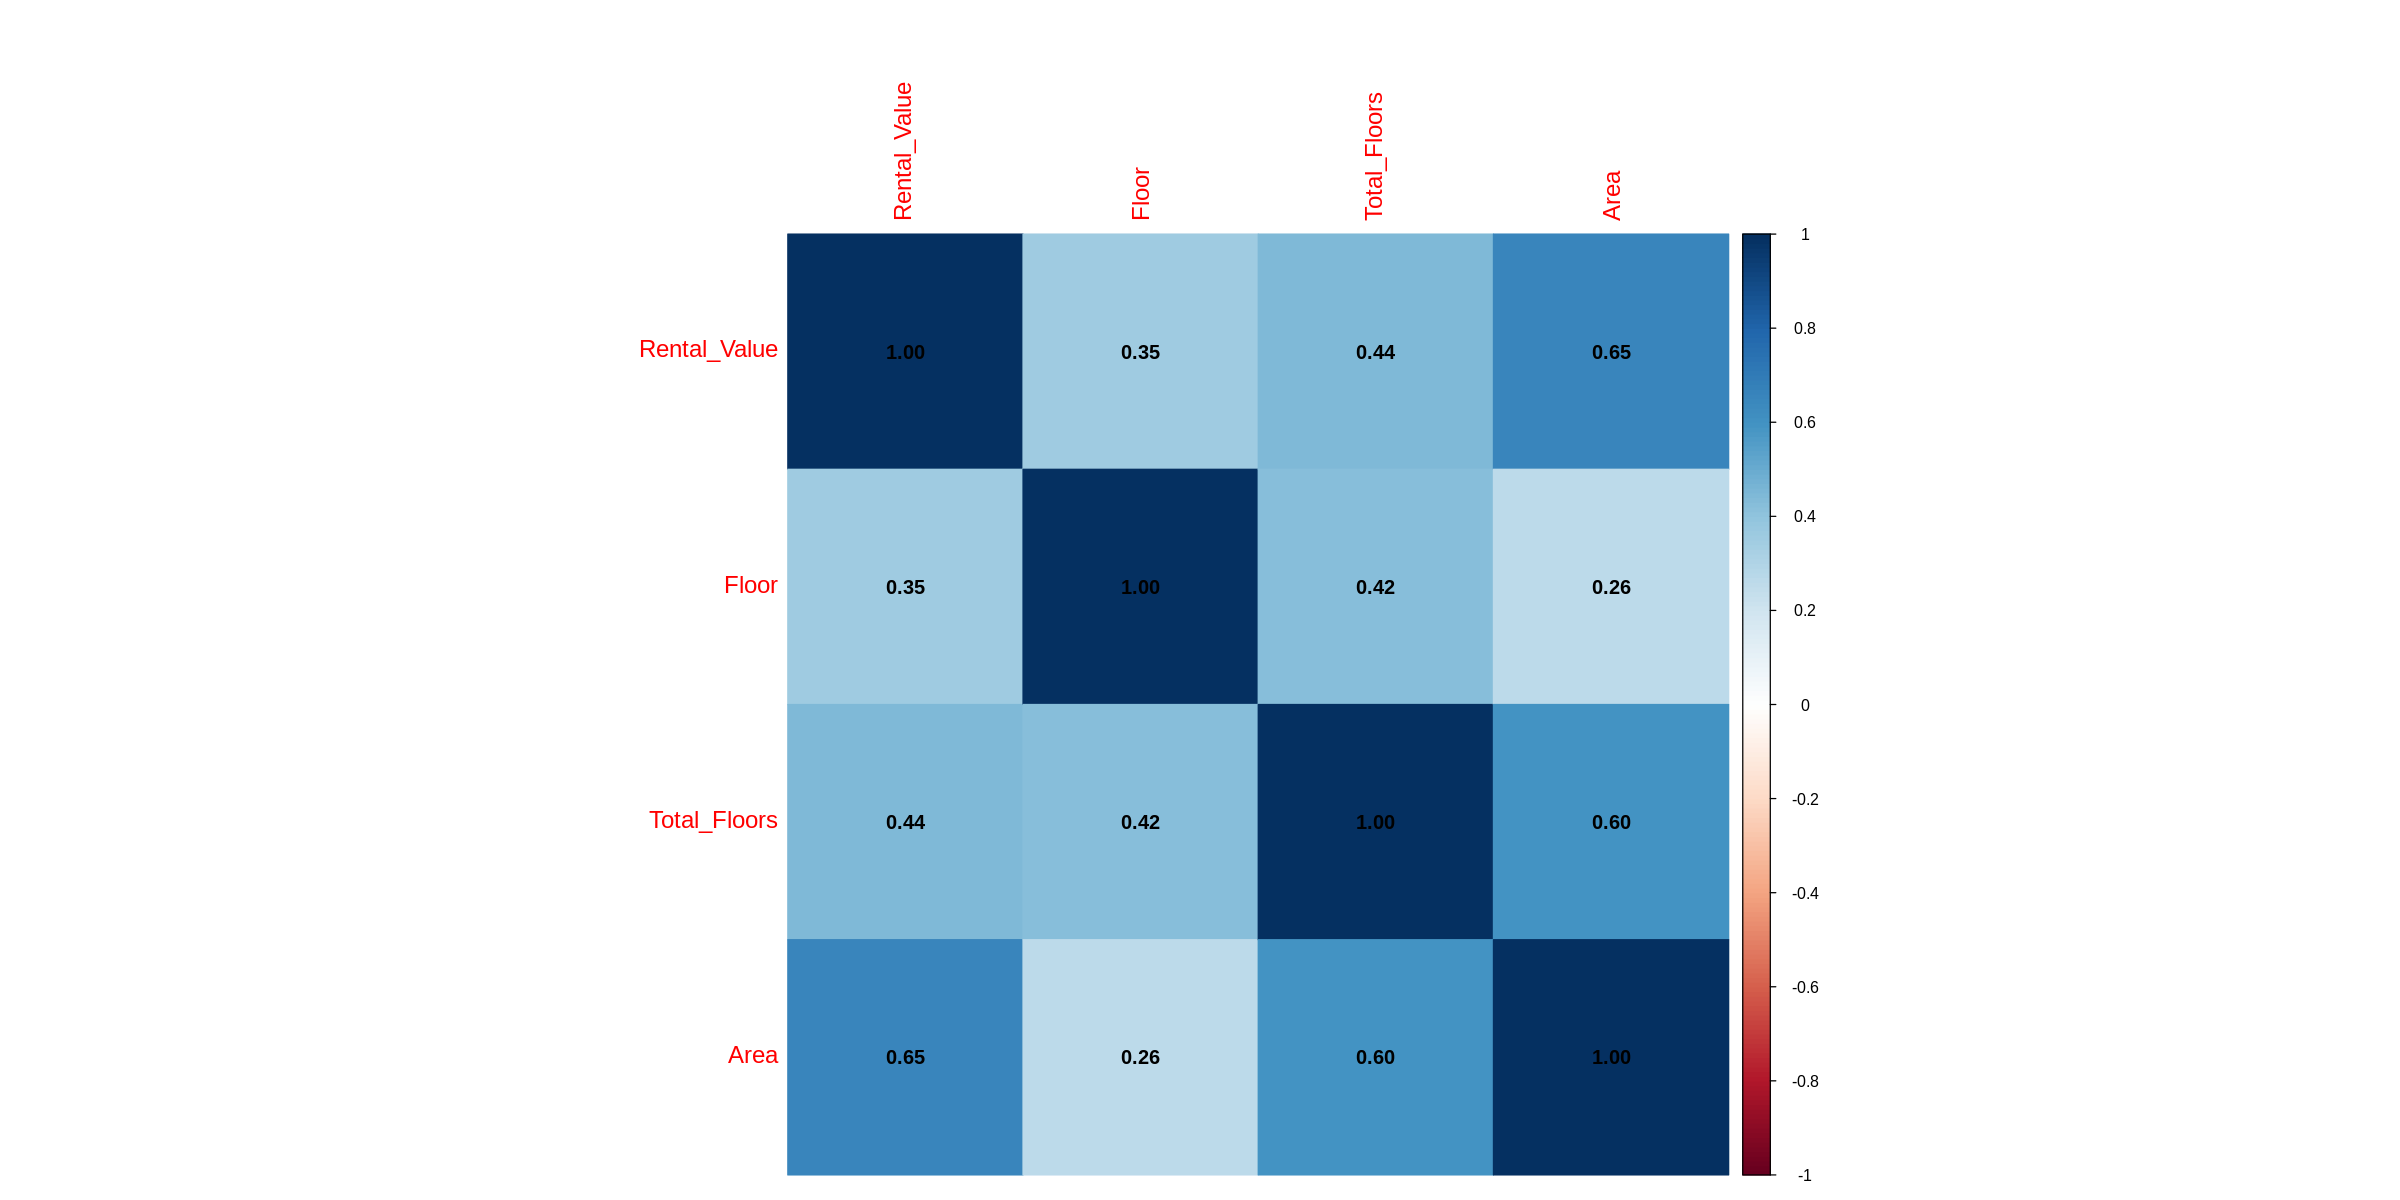

`geom_smooth()` using formula = 'y ~ x'


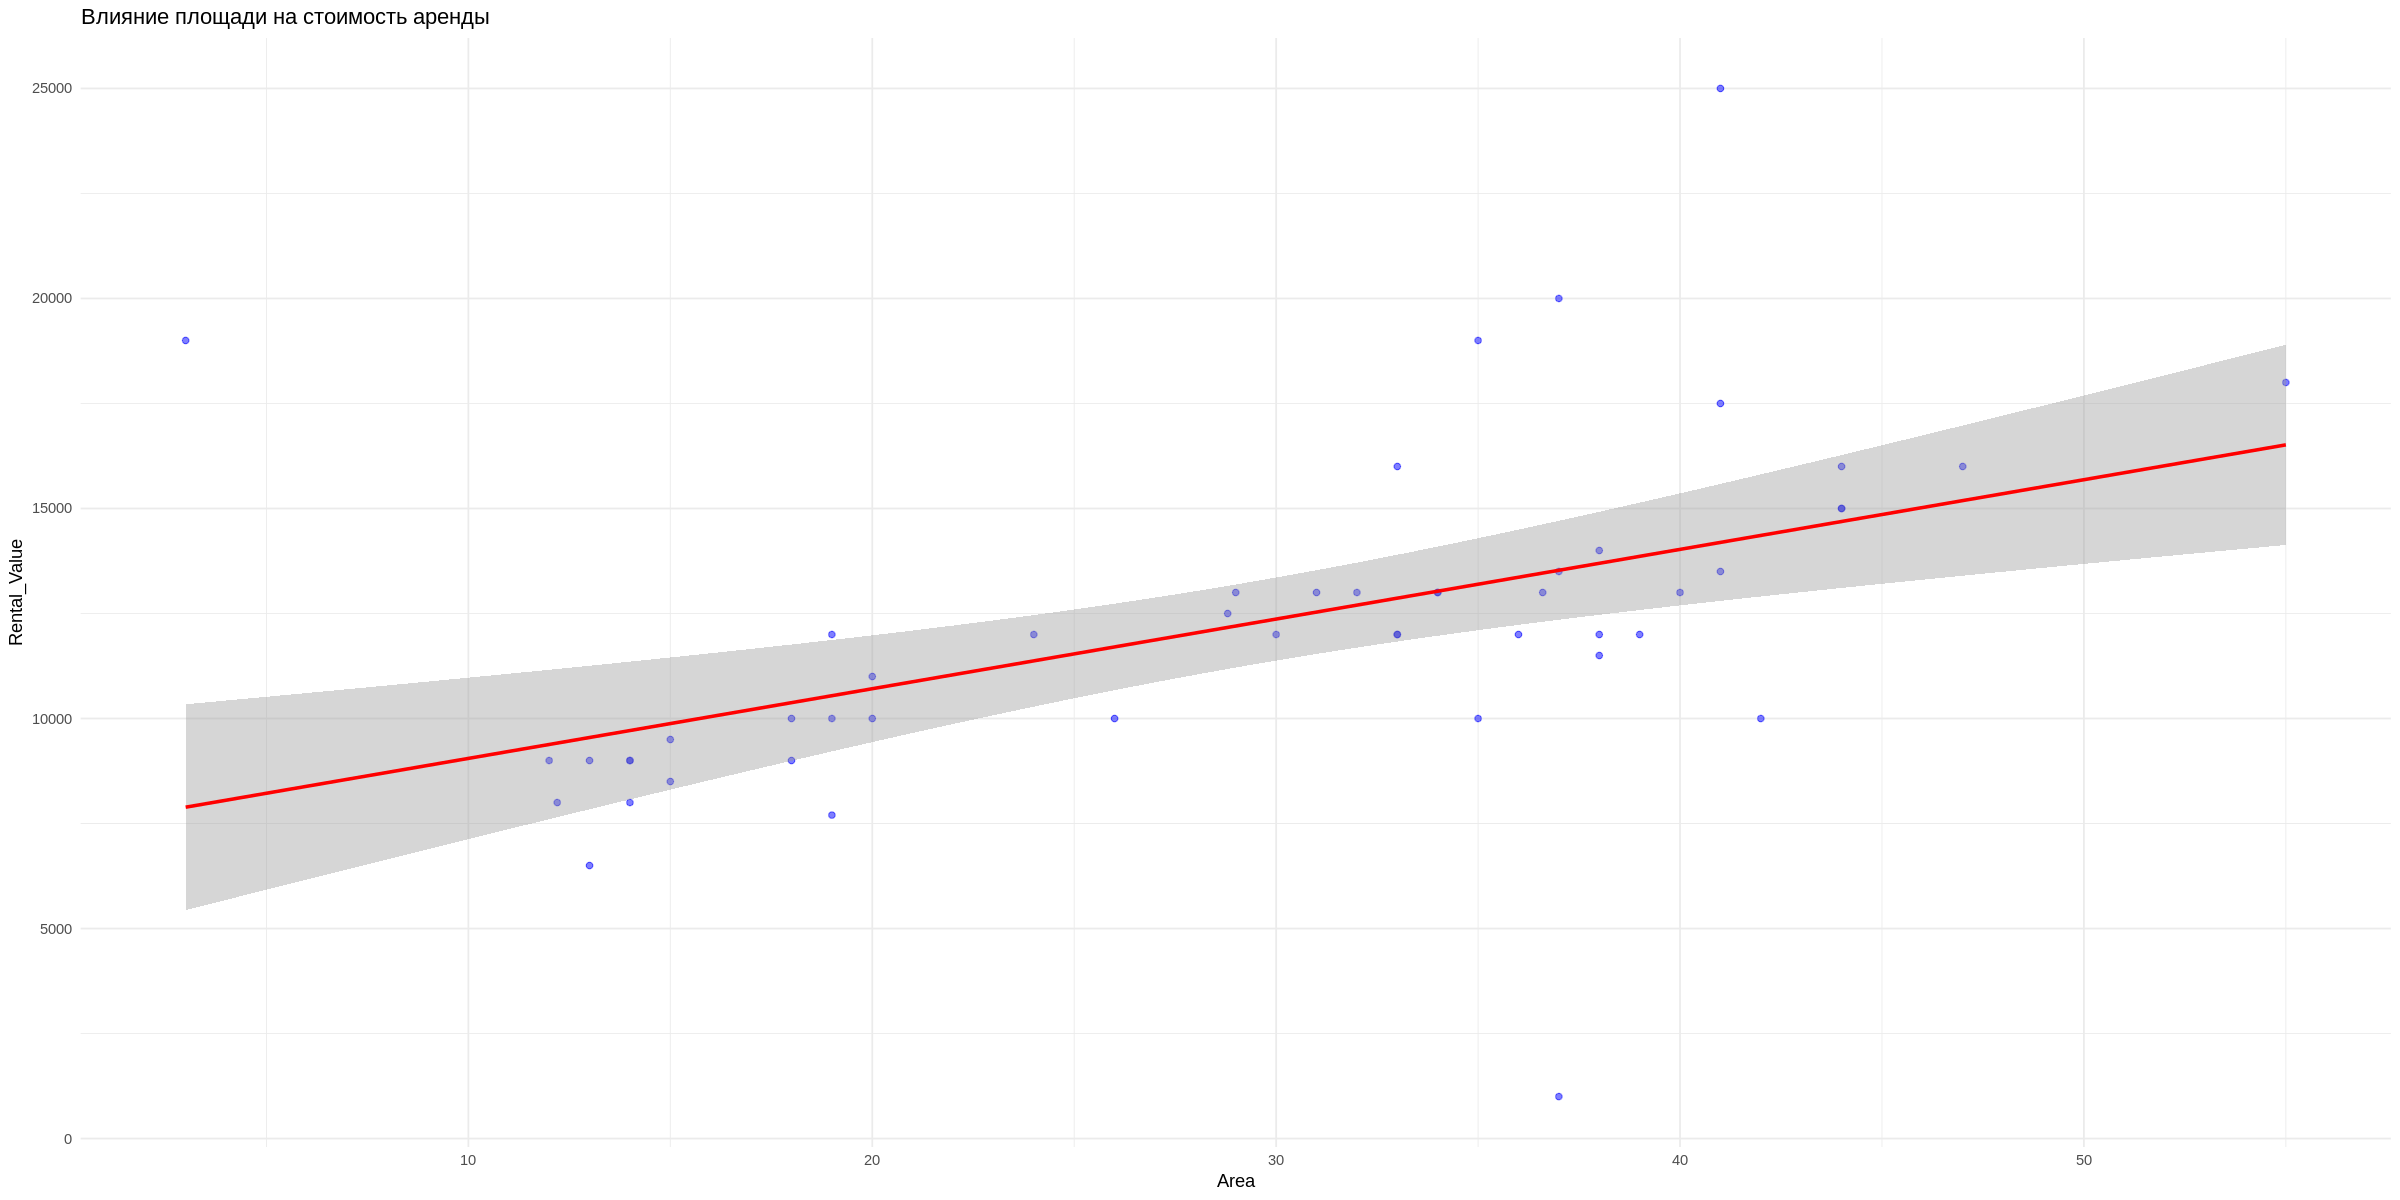

`geom_smooth()` using formula = 'y ~ x'


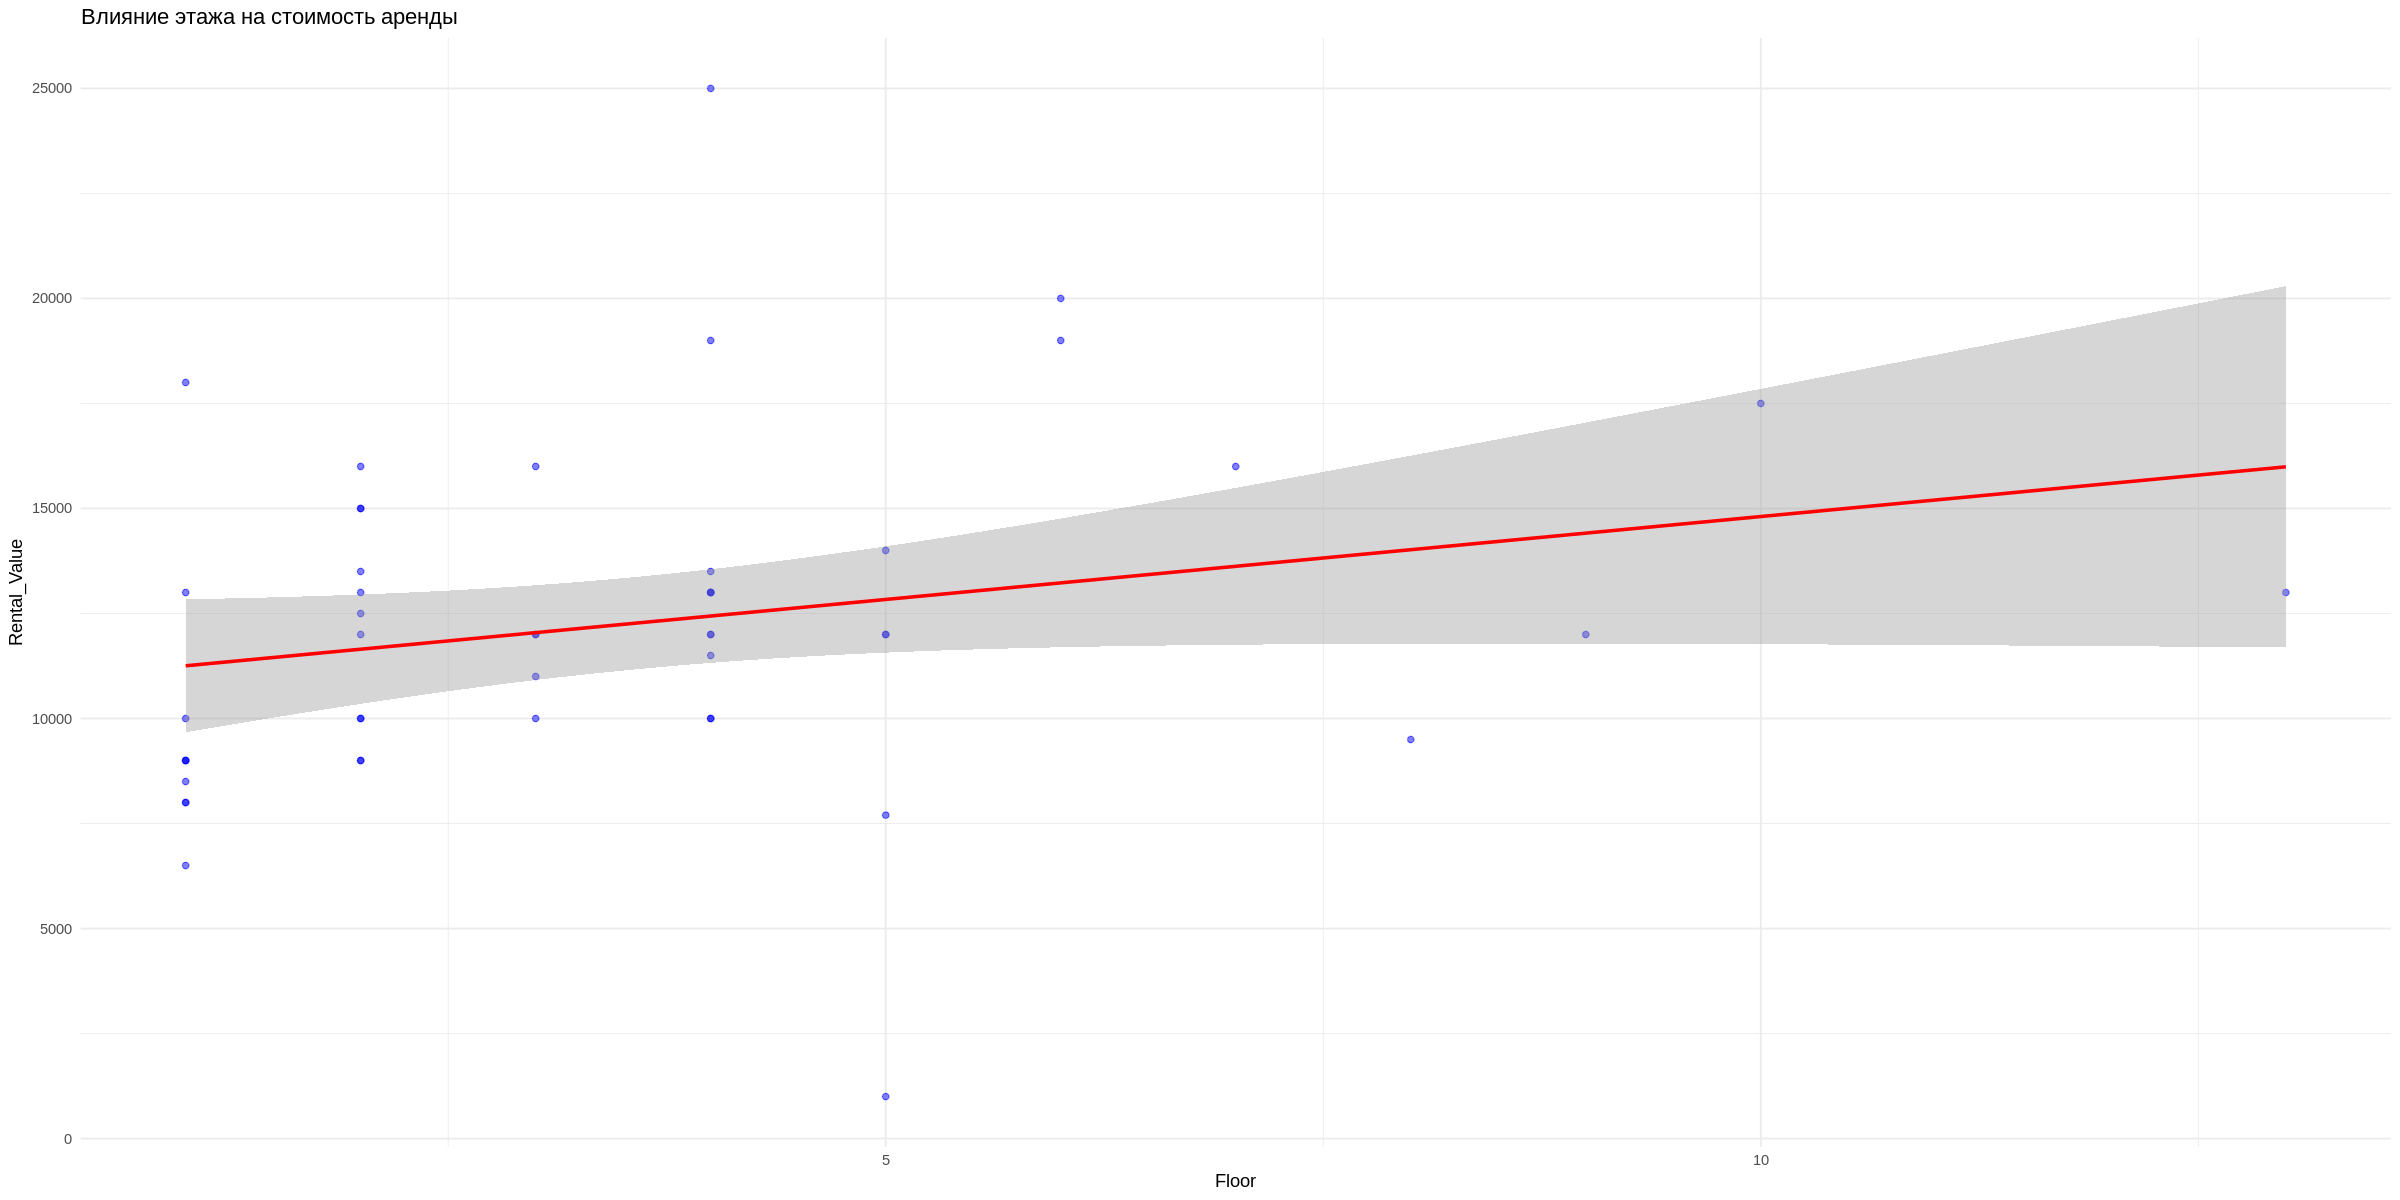

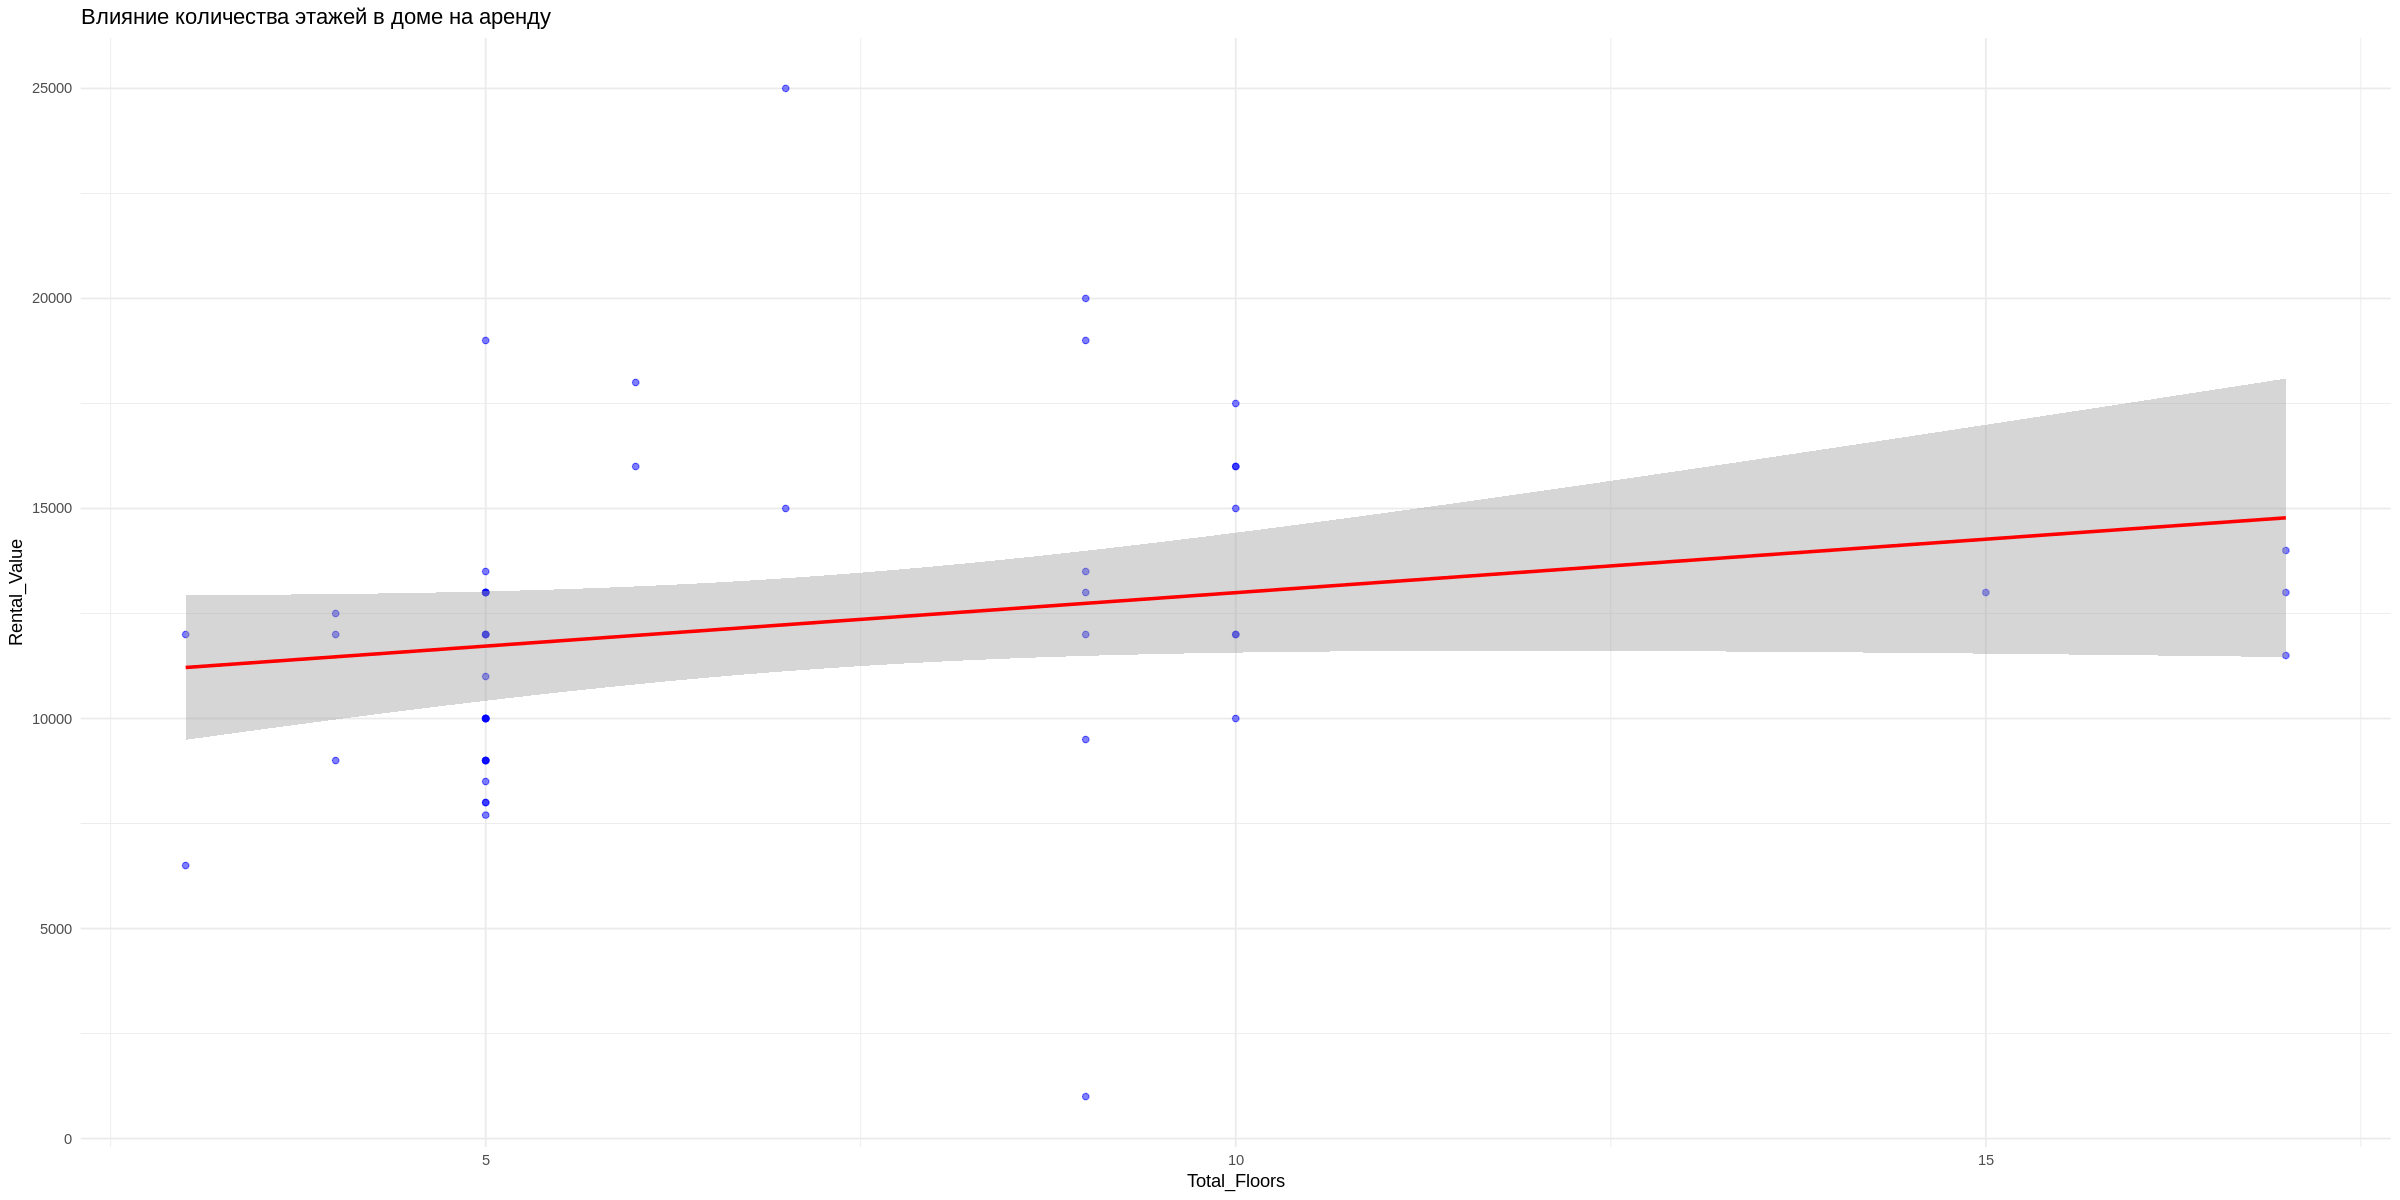

In [ ]:
# Вычисляем корреляционную матрицу для числовых столбцов
cor_matrix <- cor(flats[, numeric_columns], use = "complete.obs", method = "spearman")

# Визуализация с помощью corrplot
library(corrplot)
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.cex = 1.2)

ggplot(flats, aes(x = Area, y = Rental_Value)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Влияние площади на стоимость аренды") +
  theme_minimal()

ggplot(flats, aes(x = Floor, y = Rental_Value)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Влияние этажа на стоимость аренды") +
  theme_minimal()

ggplot(flats, aes(x = Total_Floors, y = Rental_Value)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Влияние количества этажей в доме на аренду") +
  theme_minimal()


# 5. Построить парную модель регрессии цены от метража.


Call:
lm(formula = Rental_Value ~ Area, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-12529.4  -1374.1   -381.2    432.1  11110.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7391.8     1335.5   5.535 1.28e-06 ***
Area           165.9       42.2   3.931 0.000271 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3474 on 48 degrees of freedom
Multiple R-squared:  0.2435,	Adjusted R-squared:  0.2278 
F-statistic: 15.45 on 1 and 48 DF,  p-value: 0.0002708


`geom_smooth()` using formula = 'y ~ x'


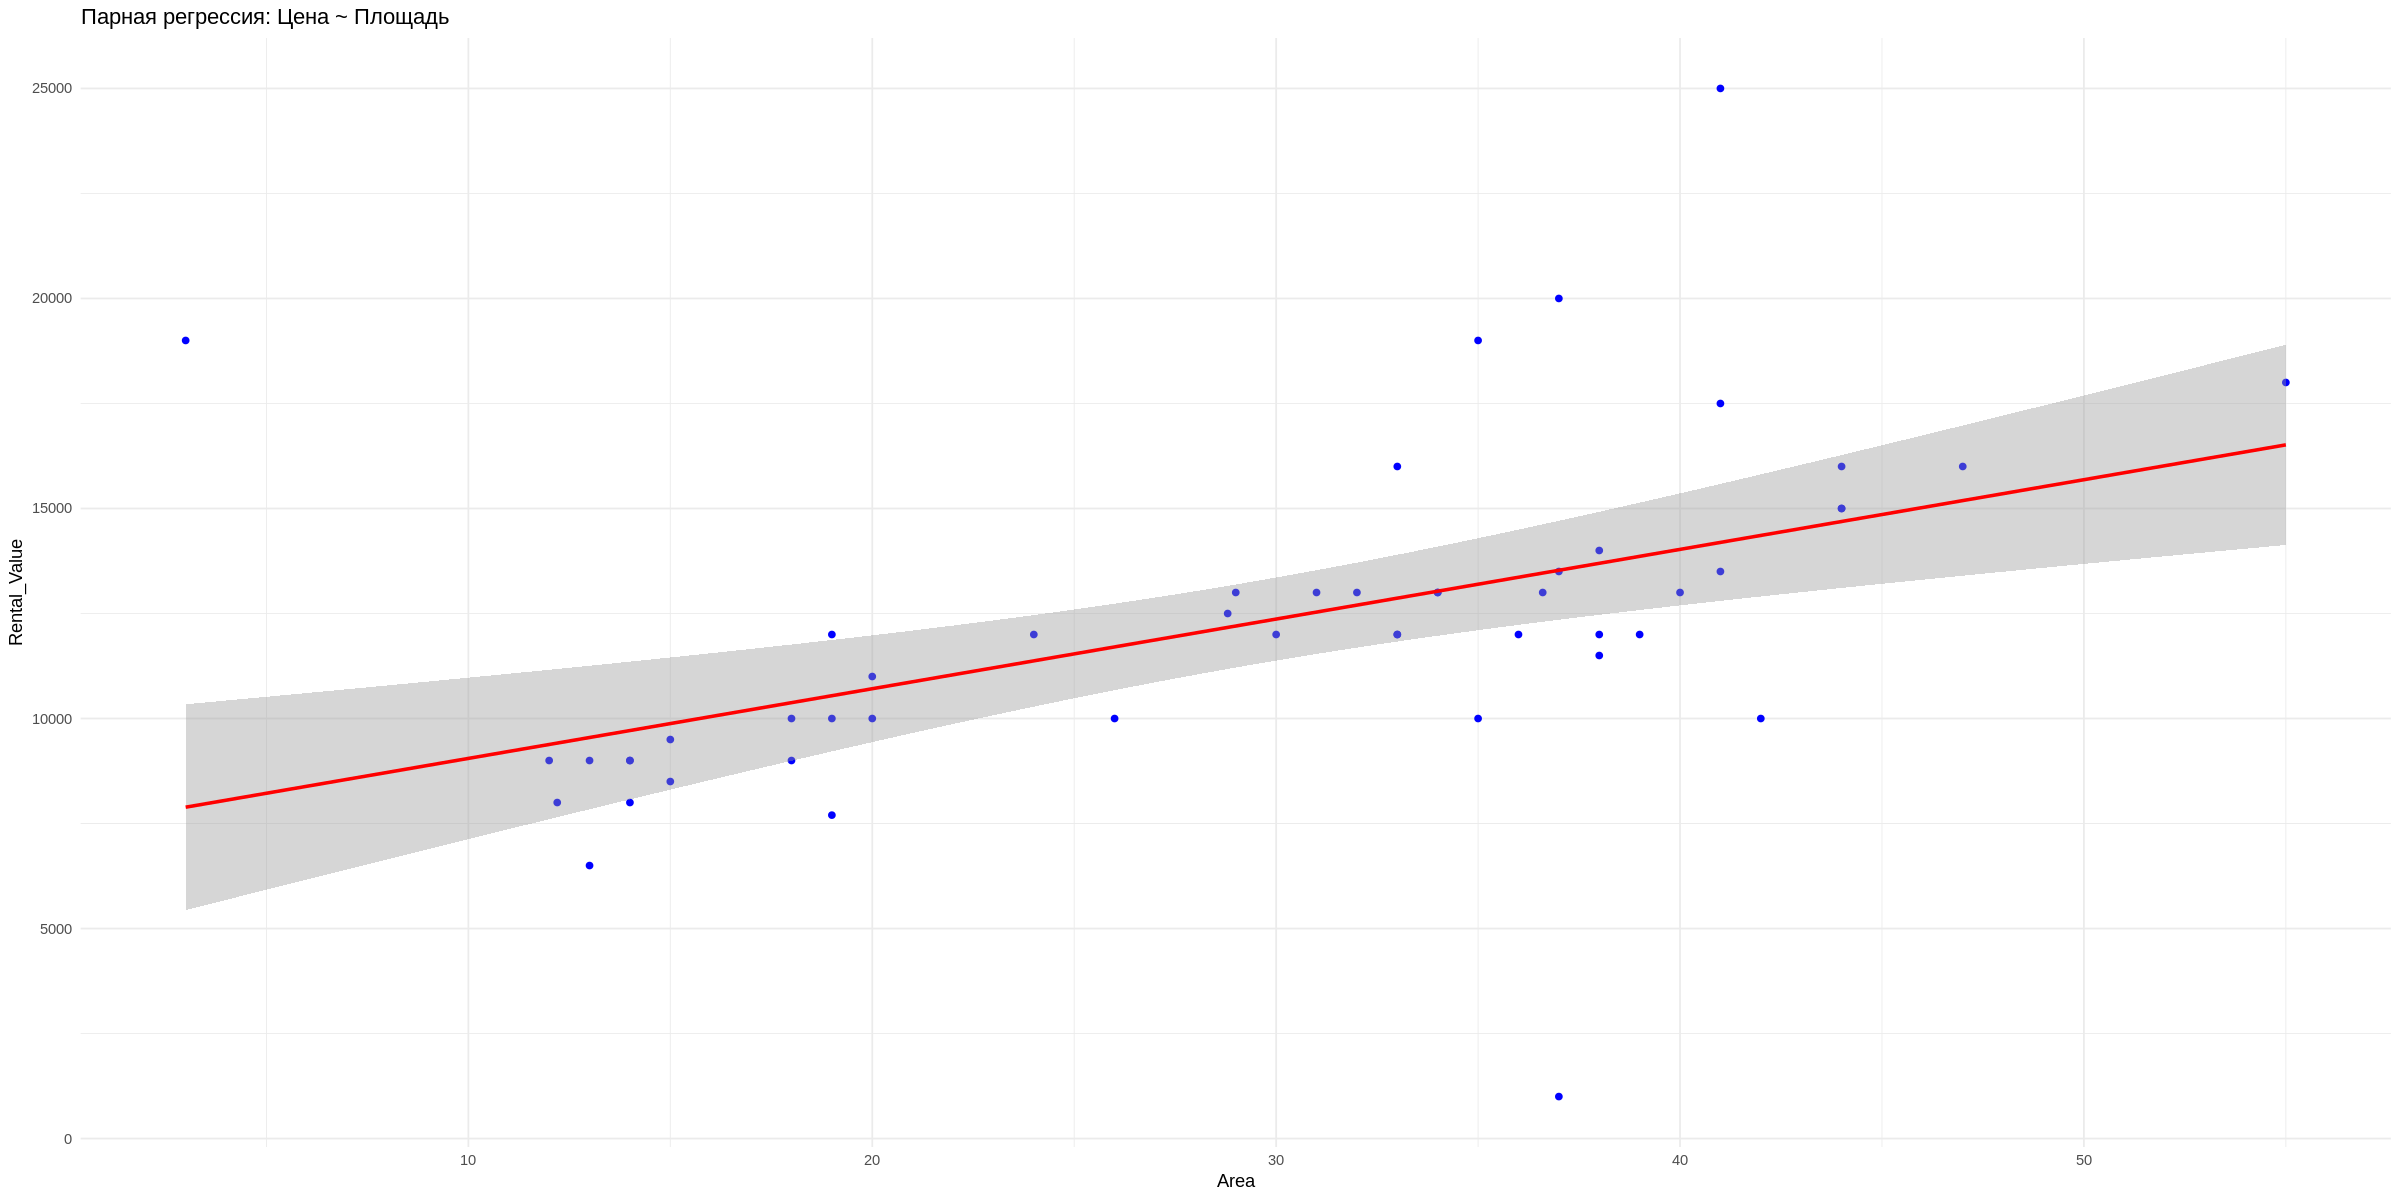

In [ ]:
# 5

model <- lm(Rental_Value ~ Area, data = flats)
summary(model)  # Вывод результатов регрессии

# Визуализация модели
ggplot(flats, aes(x = Area, y = Rental_Value)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Парная регрессия: Цена ~ Площадь") +
  theme_minimal()

# 6. Проверить остатки на нормальность.

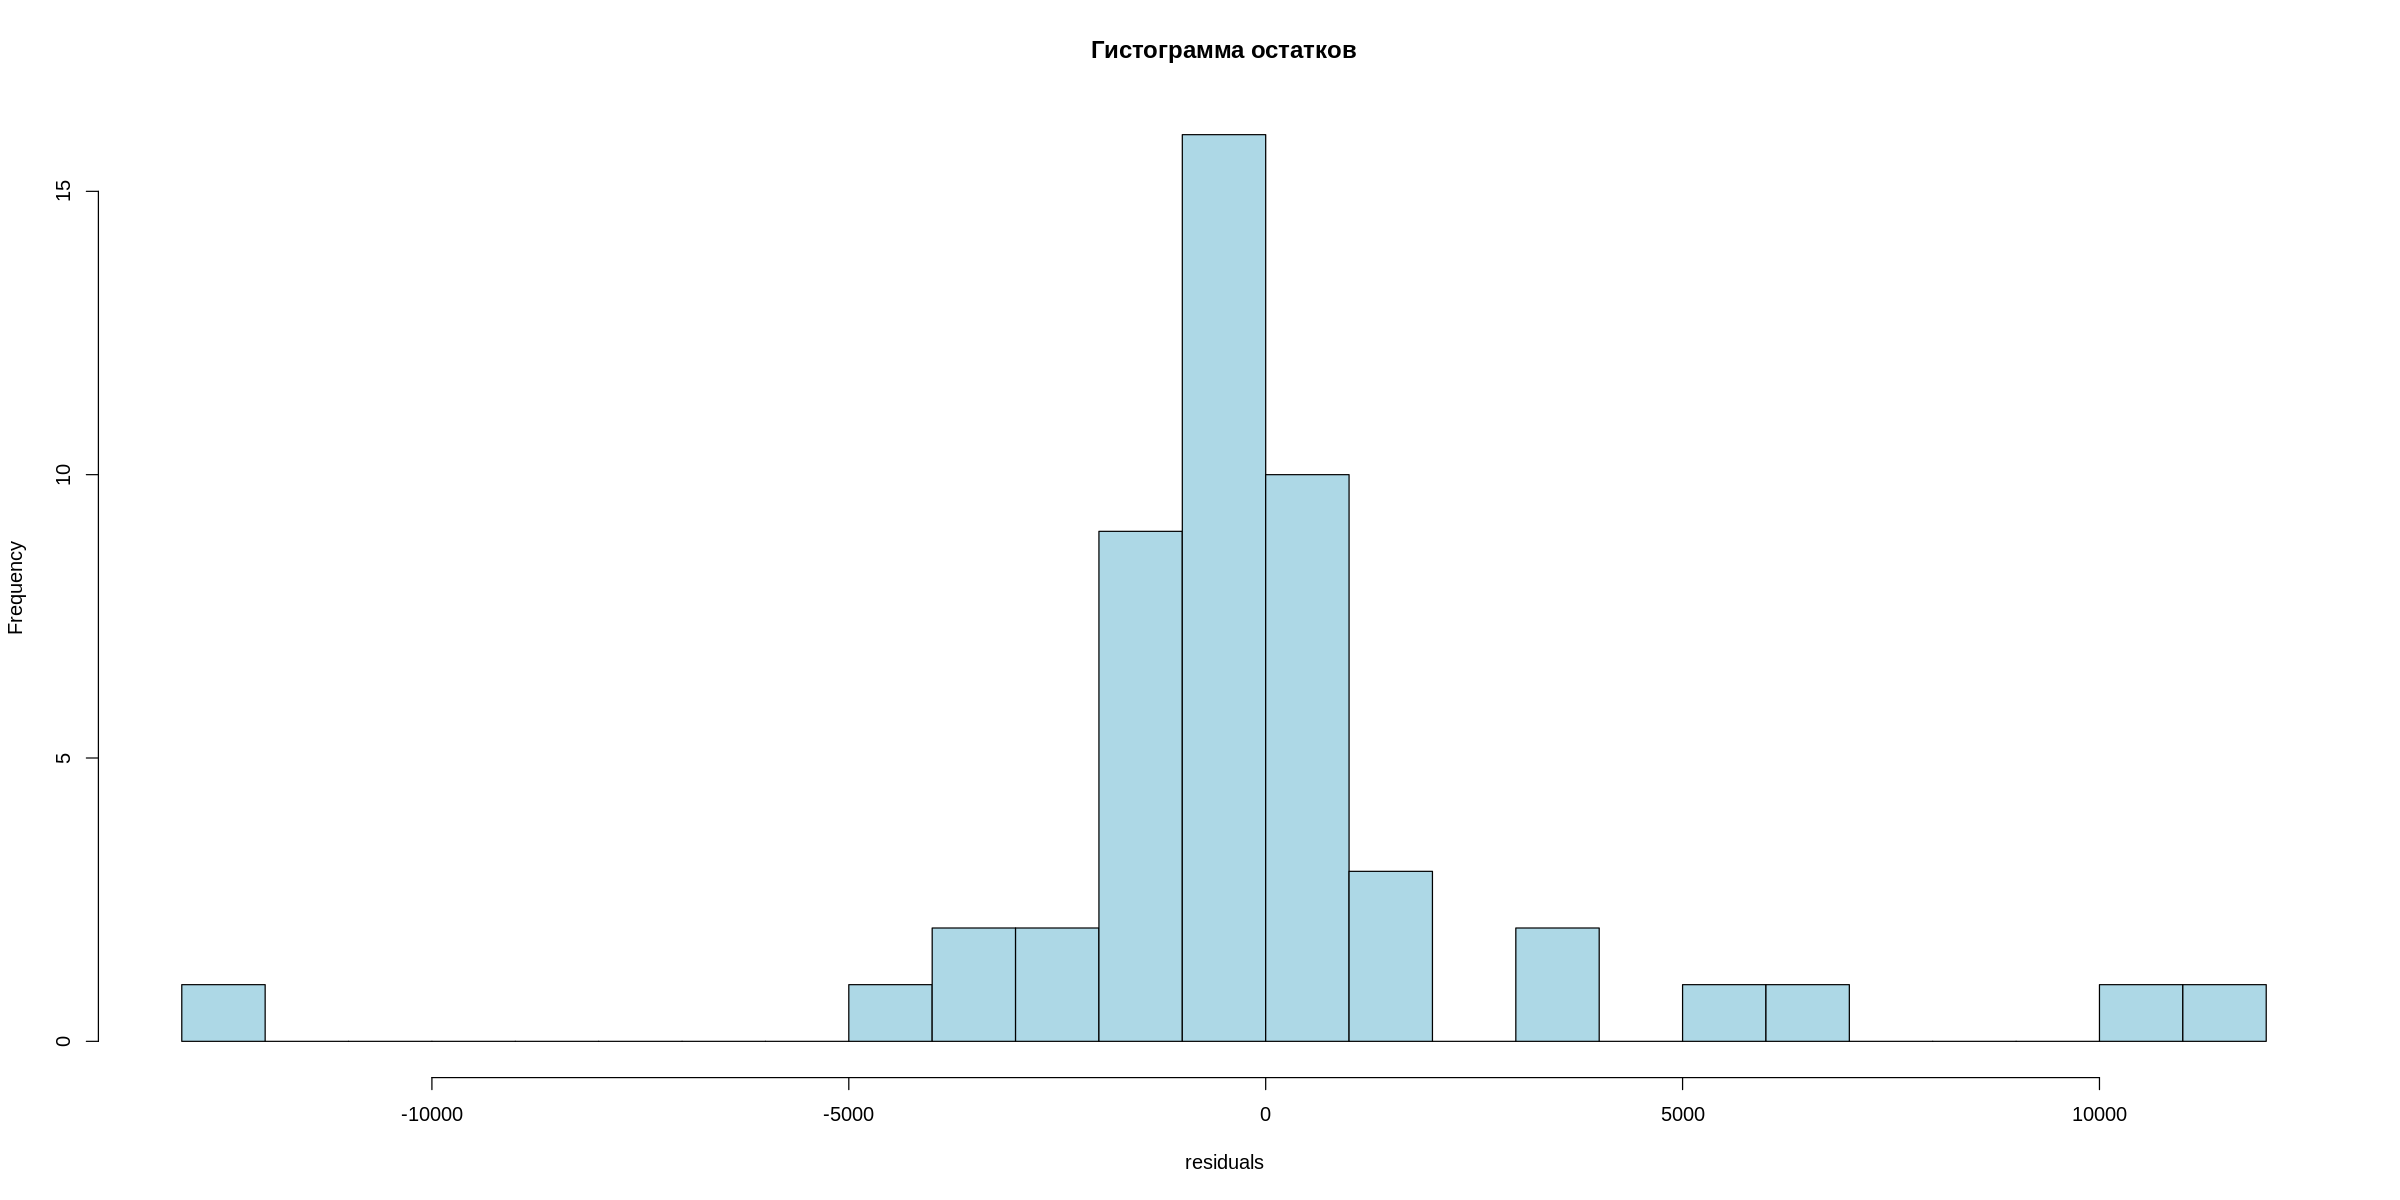


	Shapiro-Wilk normality test

data:  residuals
W = 0.7906, p-value = 5.361e-07


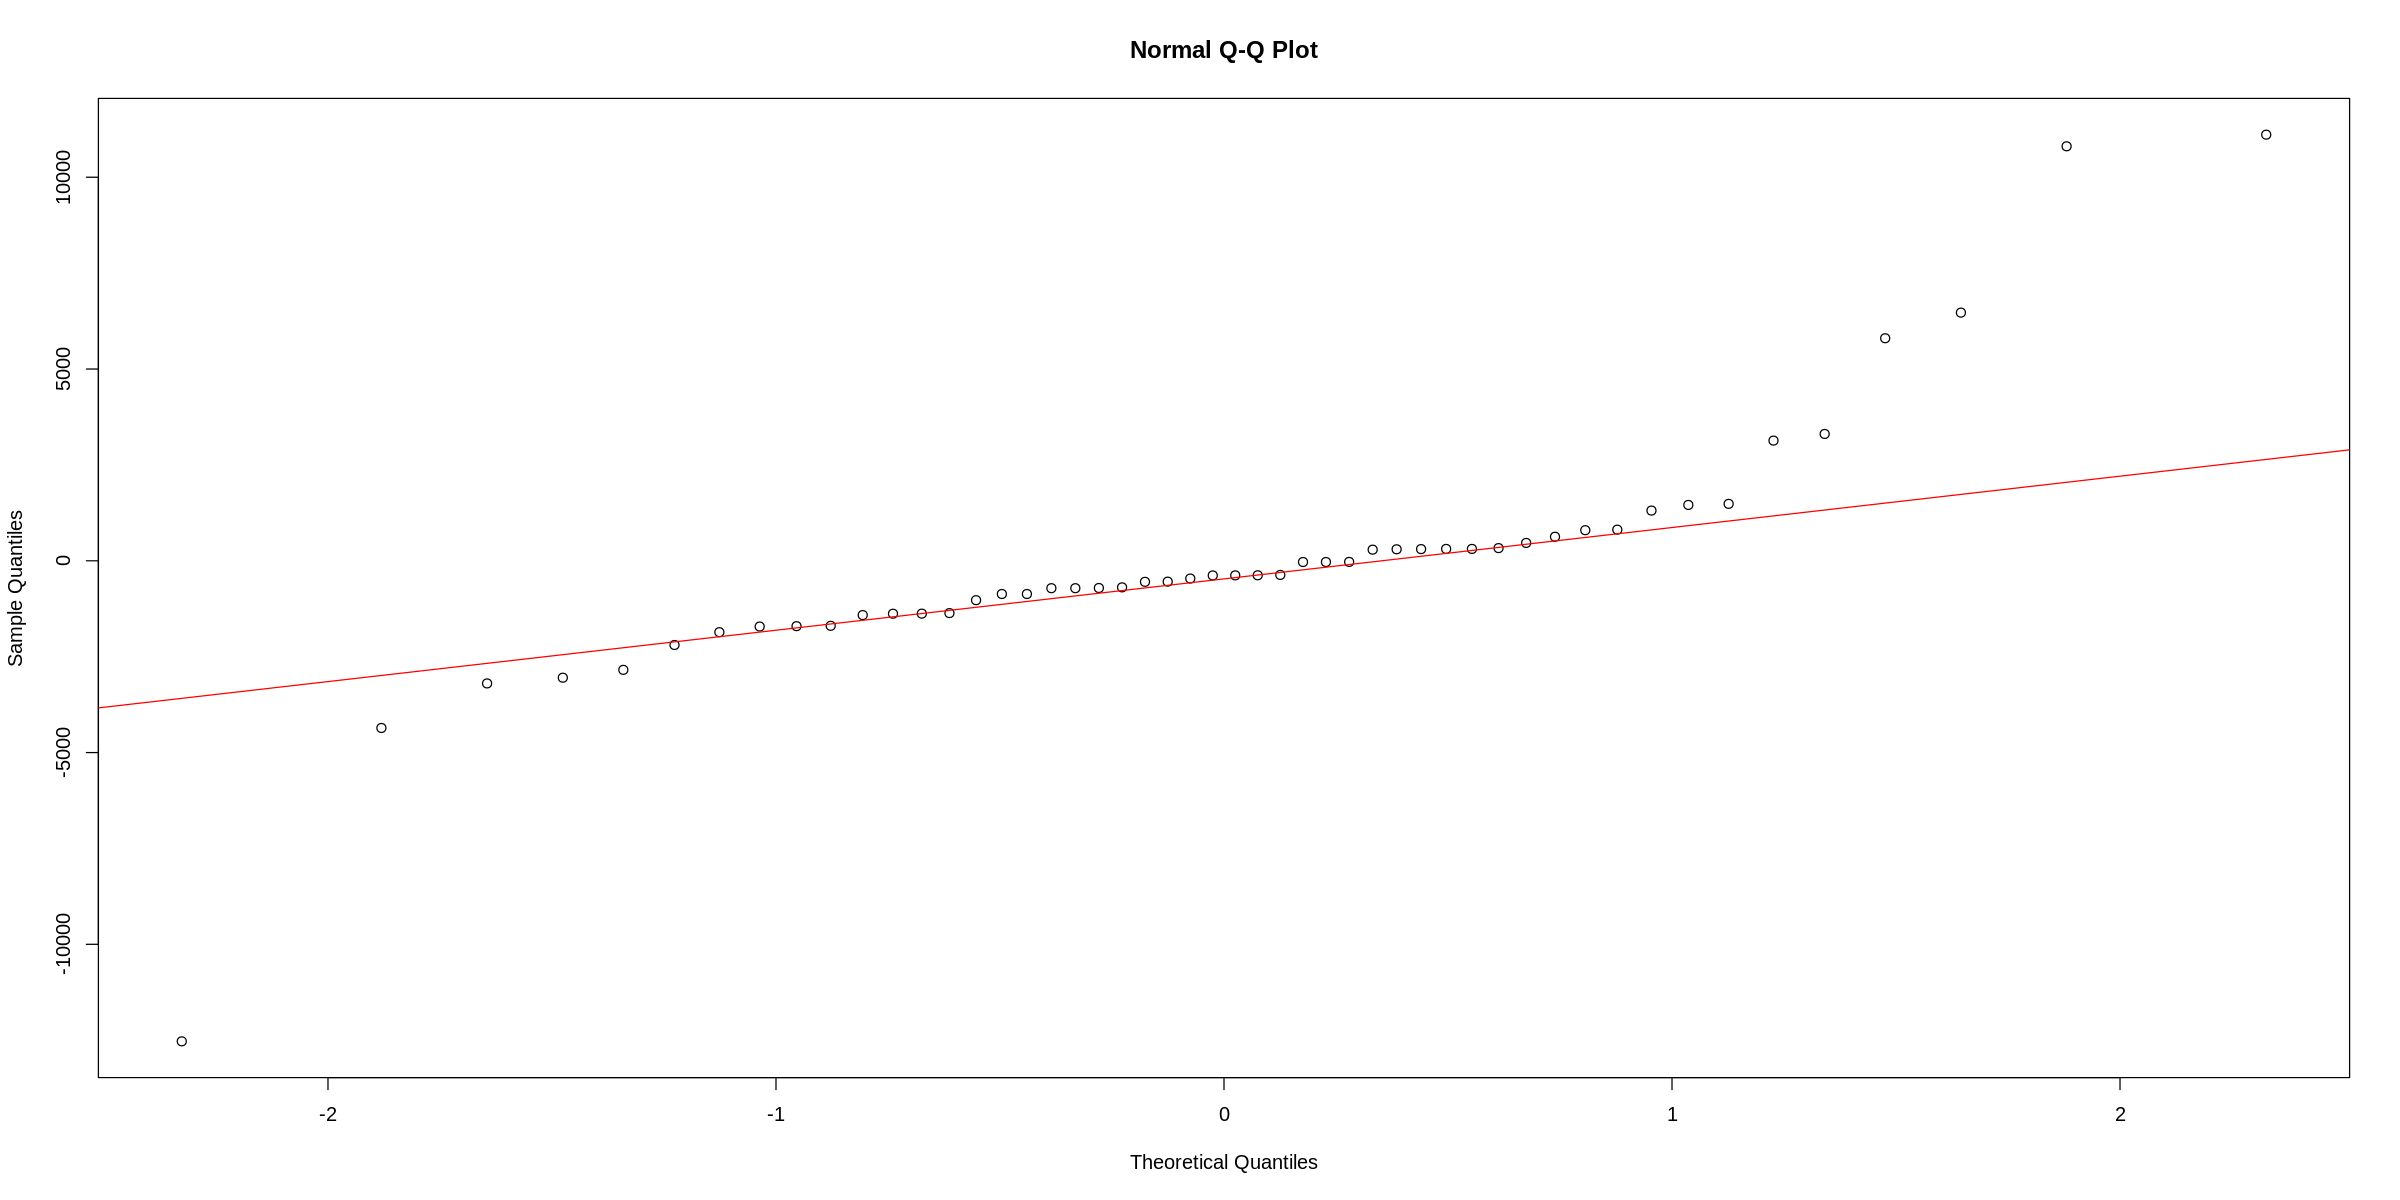

In [ ]:
# 6

residuals <- resid(model)  # Остатки модели

# Гистограмма остатков
hist(residuals, breaks = 30, main = "Гистограмма остатков", col = "lightblue")

# QQ-график
qqnorm(residuals)
qqline(residuals, col = "red")

# Тест Шапиро-Уилка
shapiro.test(residuals)

# 7. Проверить на гетероскедастичность

In [ ]:
# 7

install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library(lmtest)

bptest(model)  # Тест на гетероскедастичность
gqtest(model)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model
BP = 0.00016506, df = 1, p-value = 0.9897



	Goldfeld-Quandt test

data:  model
GQ = 7.0517, df1 = 23, df2 = 23, p-value = 7.421e-06
alternative hypothesis: variance increases from segment 1 to 2


# 8. Устранить гетероскедастичность (двумя способами: делением на значение фактора и логарифмированием зависимой переменной).
# 9. Построить новую парную модель.


Call:
lm(formula = Rental_Value_Adjusted ~ Area_Scaled, data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-607.15 -169.95   81.62  144.03  713.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -246.75      53.57  -4.606 3.04e-05 ***
Area_Scaled 17600.74     832.83  21.134  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 265.7 on 48 degrees of freedom
Multiple R-squared:  0.903,	Adjusted R-squared:  0.9009 
F-statistic: 446.6 on 1 and 48 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


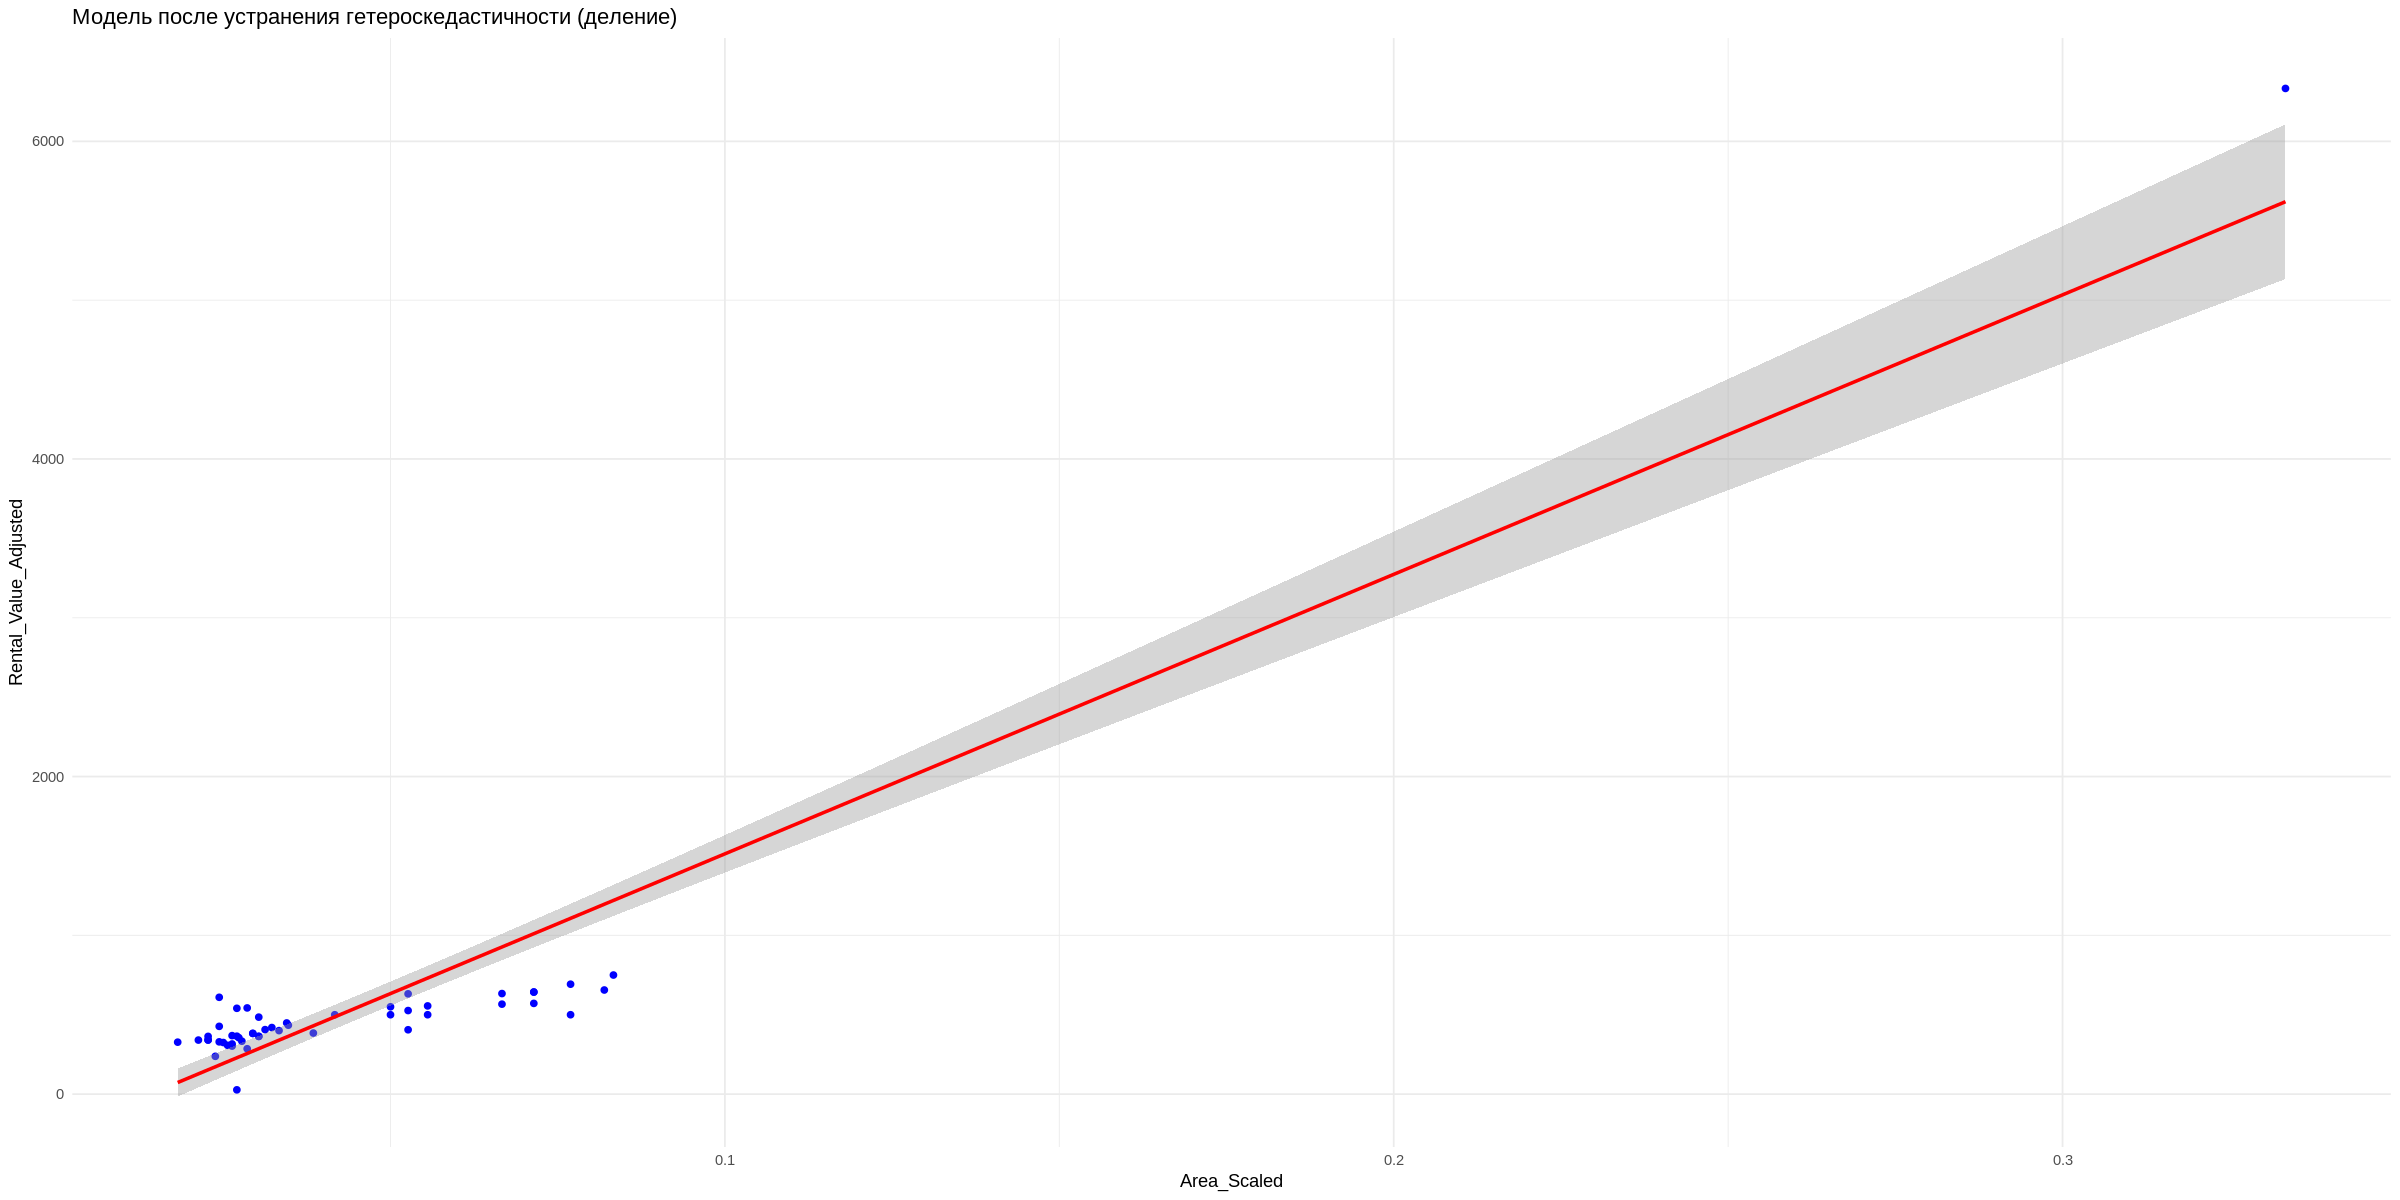

In [ ]:
# 8, 9

flats$Rental_Value_Adjusted <- flats$Rental_Value / flats$Area
flats$Area_Scaled <- 1 / flats$Area

model_adjusted <- lm(Rental_Value_Adjusted ~ Area_Scaled, data = flats)
summary(model_adjusted)

# Новый график
ggplot(flats, aes(x = Area_Scaled, y = Rental_Value_Adjusted)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Модель после устранения гетероскедастичности (деление)") +
  theme_minimal()


Call:
lm(formula = Log_Rental_Value ~ Area_Log, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.50107 -0.10494  0.01729  0.10905  0.91215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.7350     0.3914   22.32   <2e-16 ***
Area_Log      0.1866     0.1181    1.58    0.121    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4391 on 48 degrees of freedom
Multiple R-squared:  0.04945,	Adjusted R-squared:  0.02965 
F-statistic: 2.497 on 1 and 48 DF,  p-value: 0.1206


`geom_smooth()` using formula = 'y ~ x'


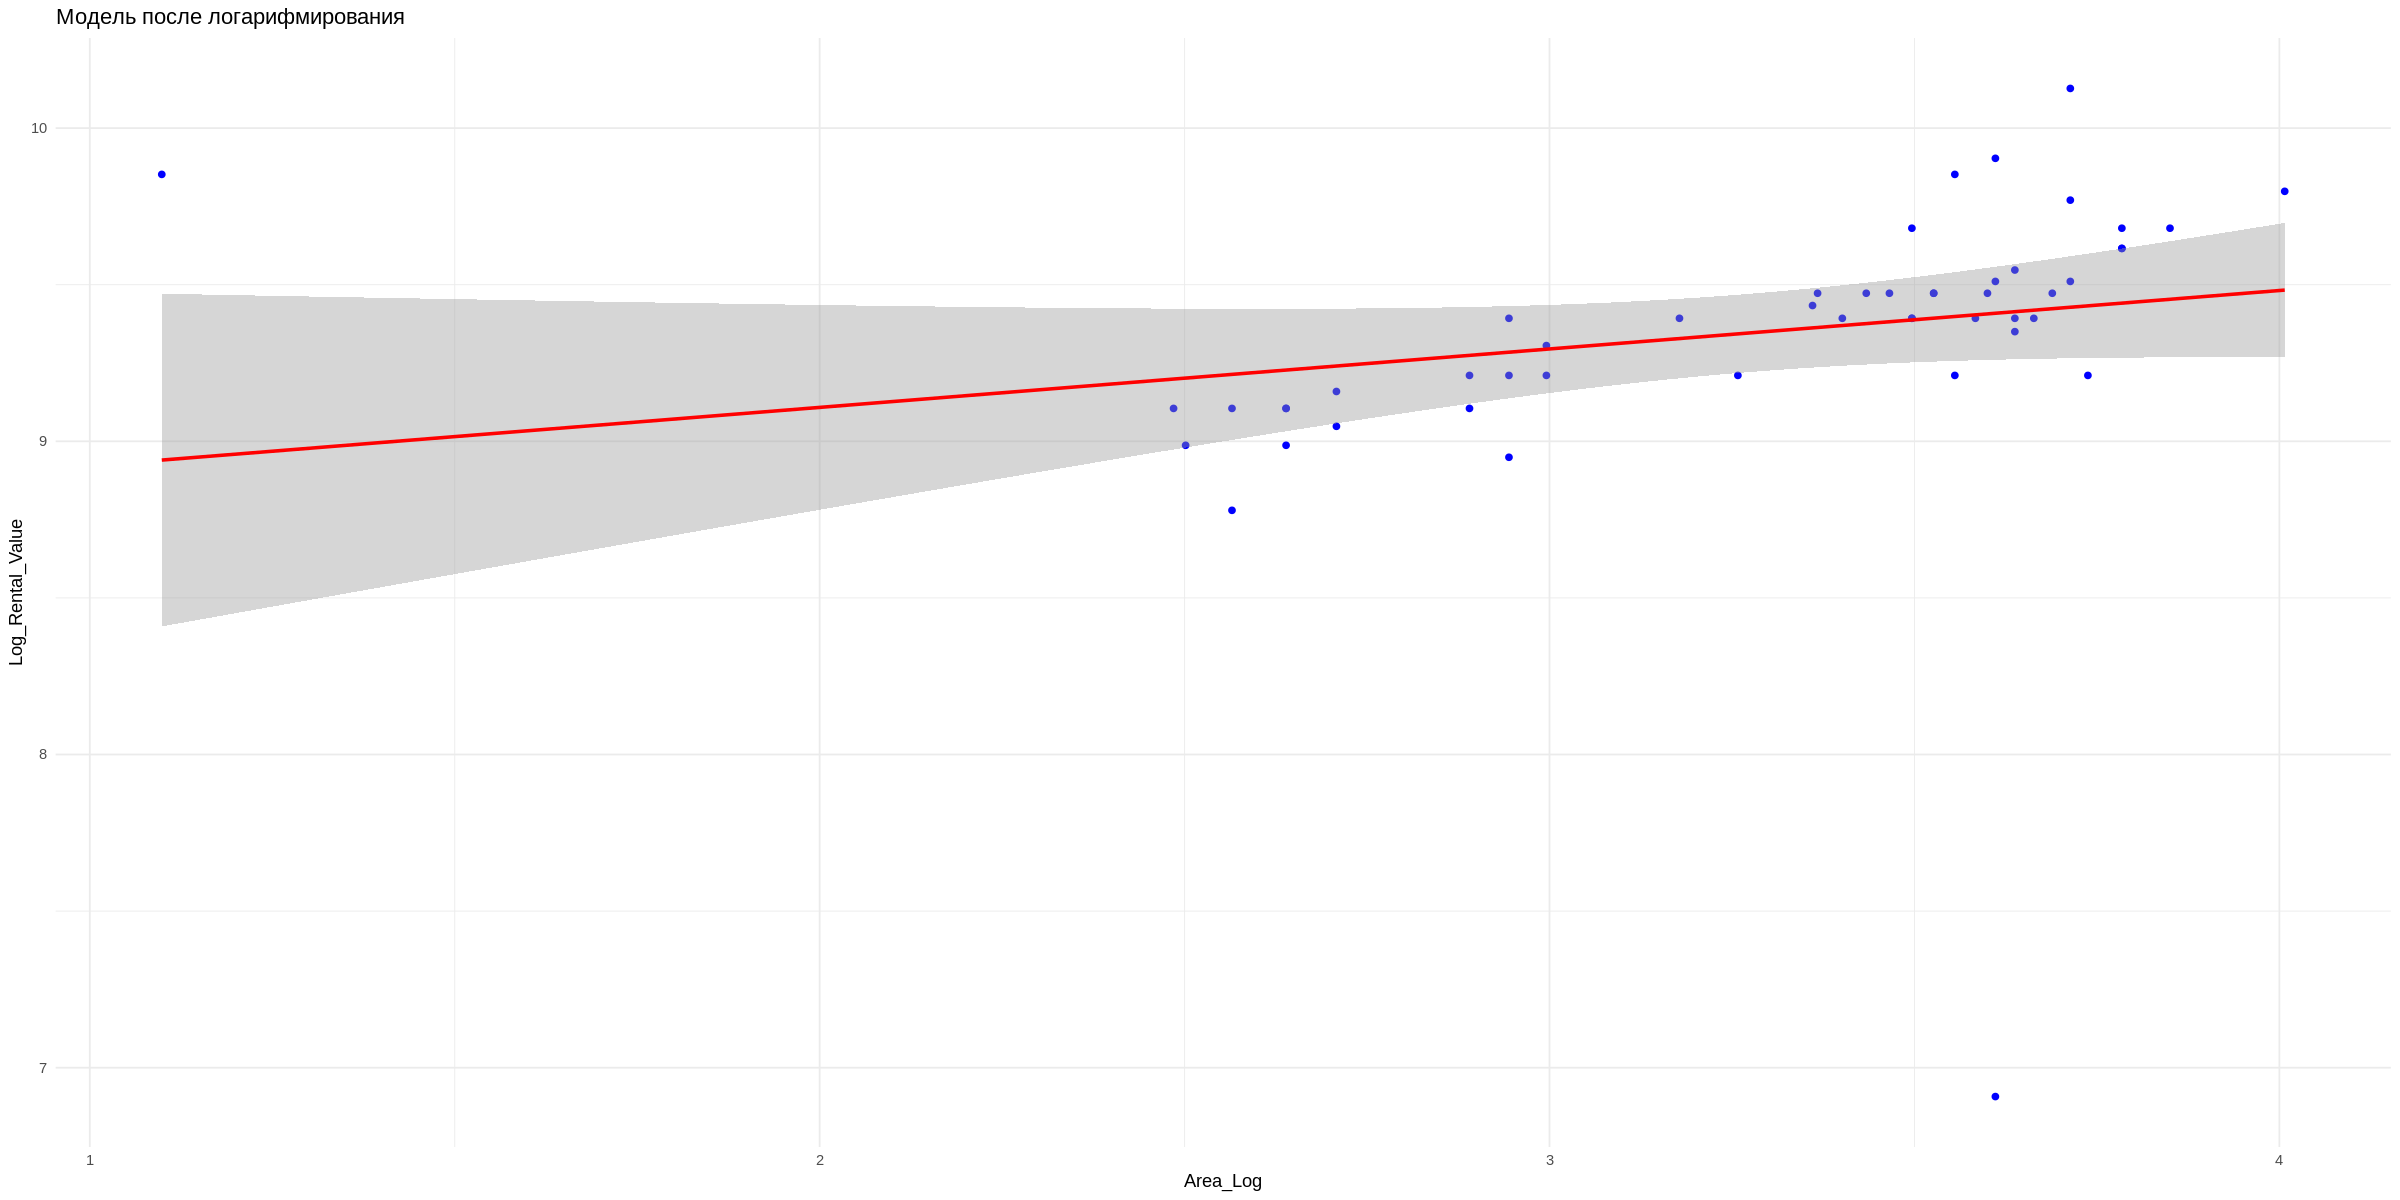

In [ ]:
flats$Log_Rental_Value <- log(flats$Rental_Value)
flats$Area_Log <- log(flats$Area)

model_log <- lm(Log_Rental_Value ~ Area_Log, data = flats)
summary(model_log)

# Новый график
ggplot(flats, aes(x = Area_Log, y = Log_Rental_Value)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Модель после логарифмирования") +
  theme_minimal()


# 10. Проверить остатки новой модели на нормальность.

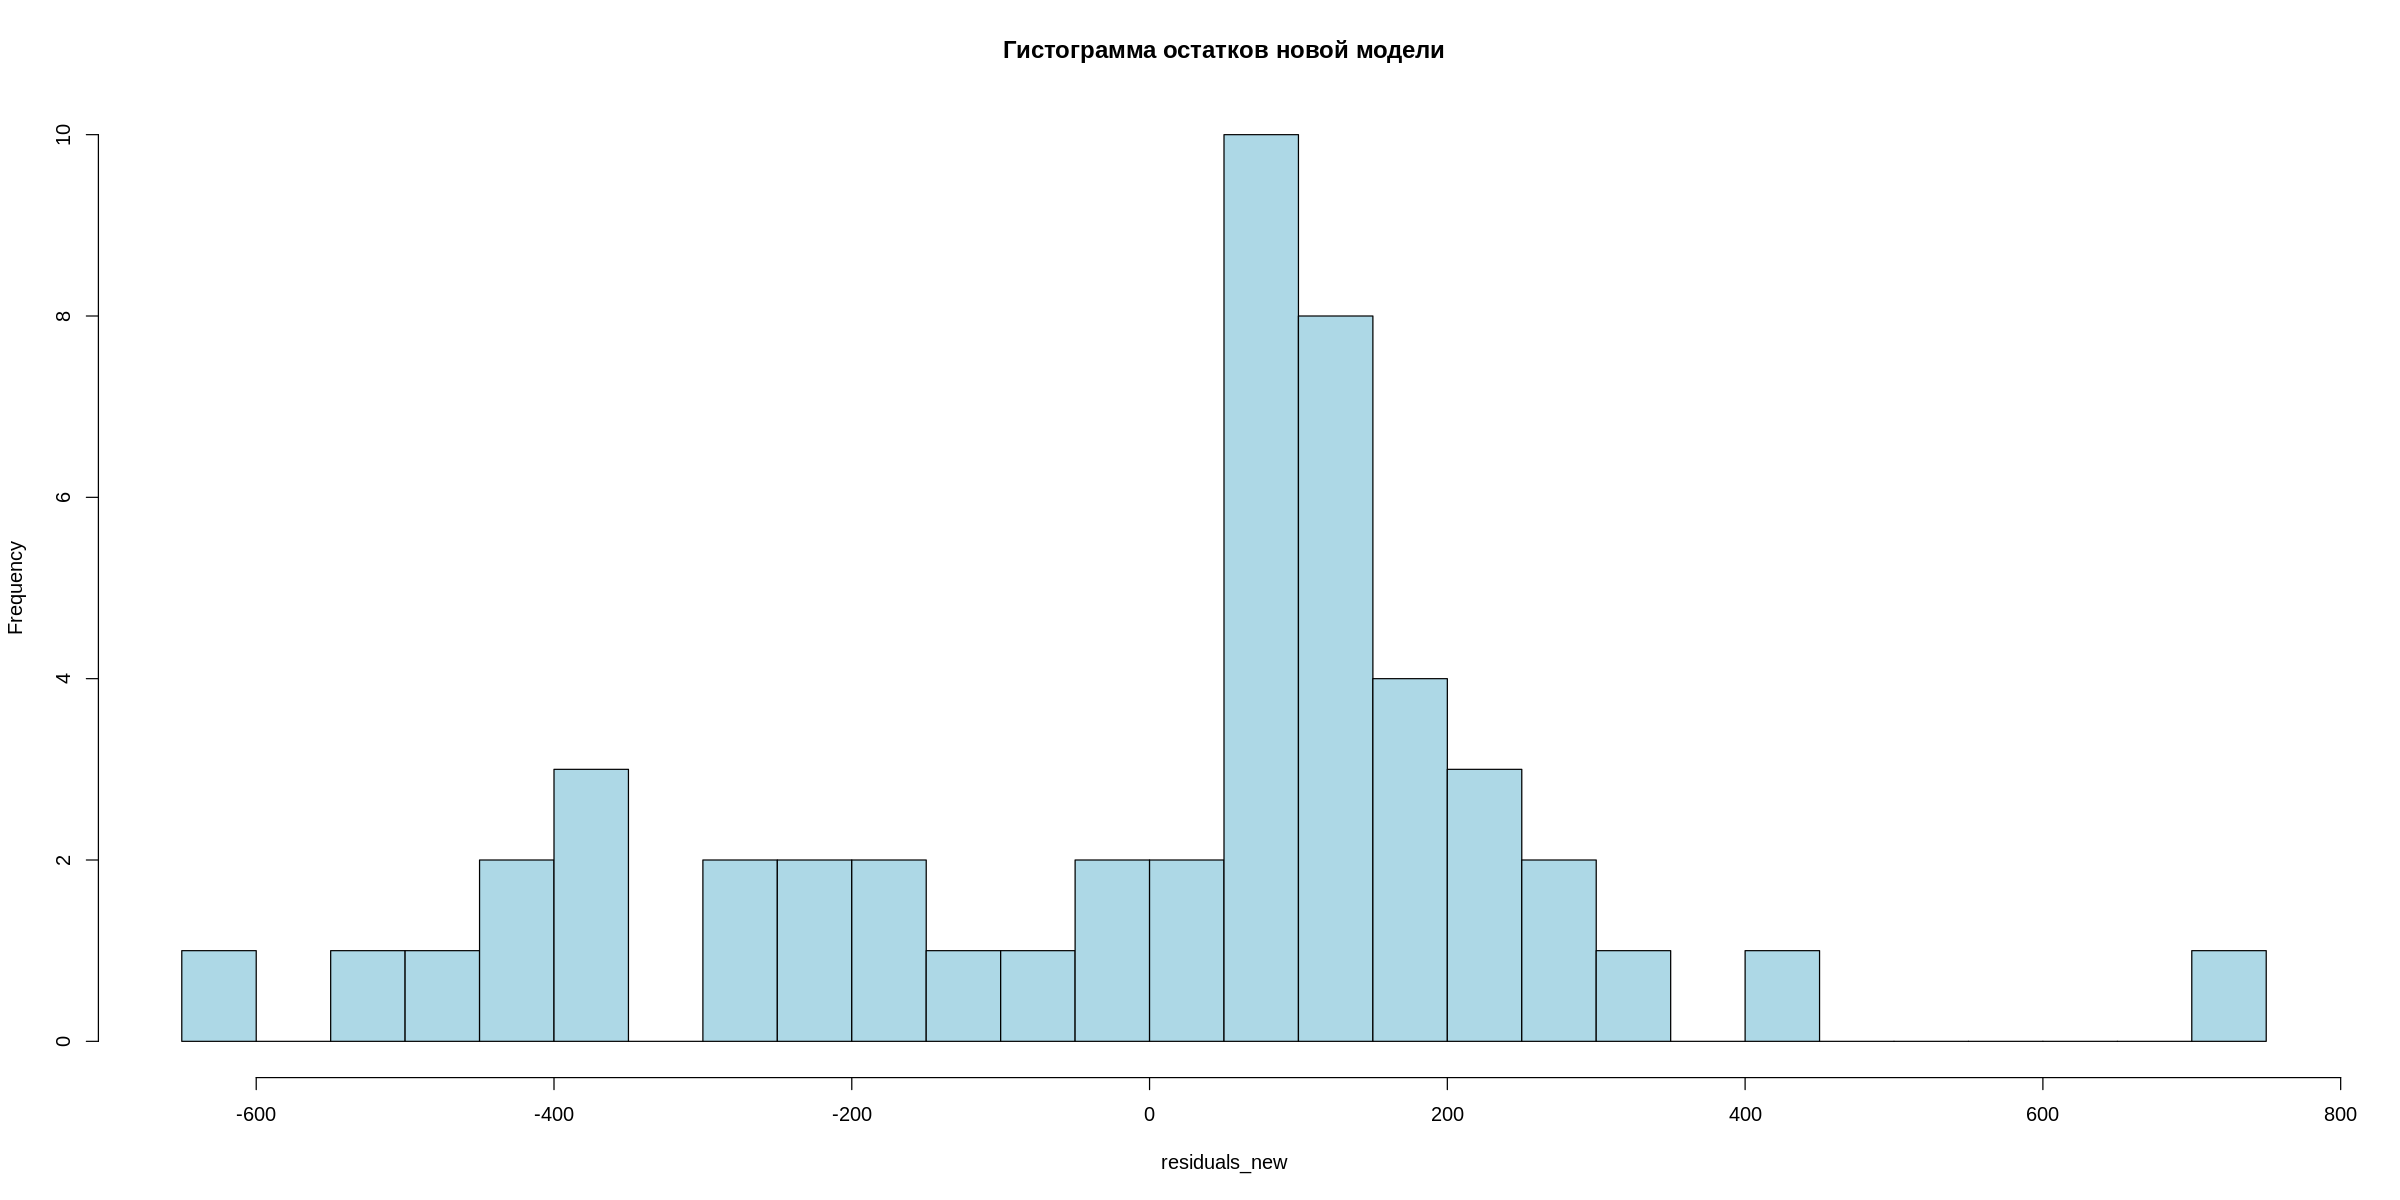


	Shapiro-Wilk normality test

data:  residuals_new
W = 0.9416, p-value = 0.0156


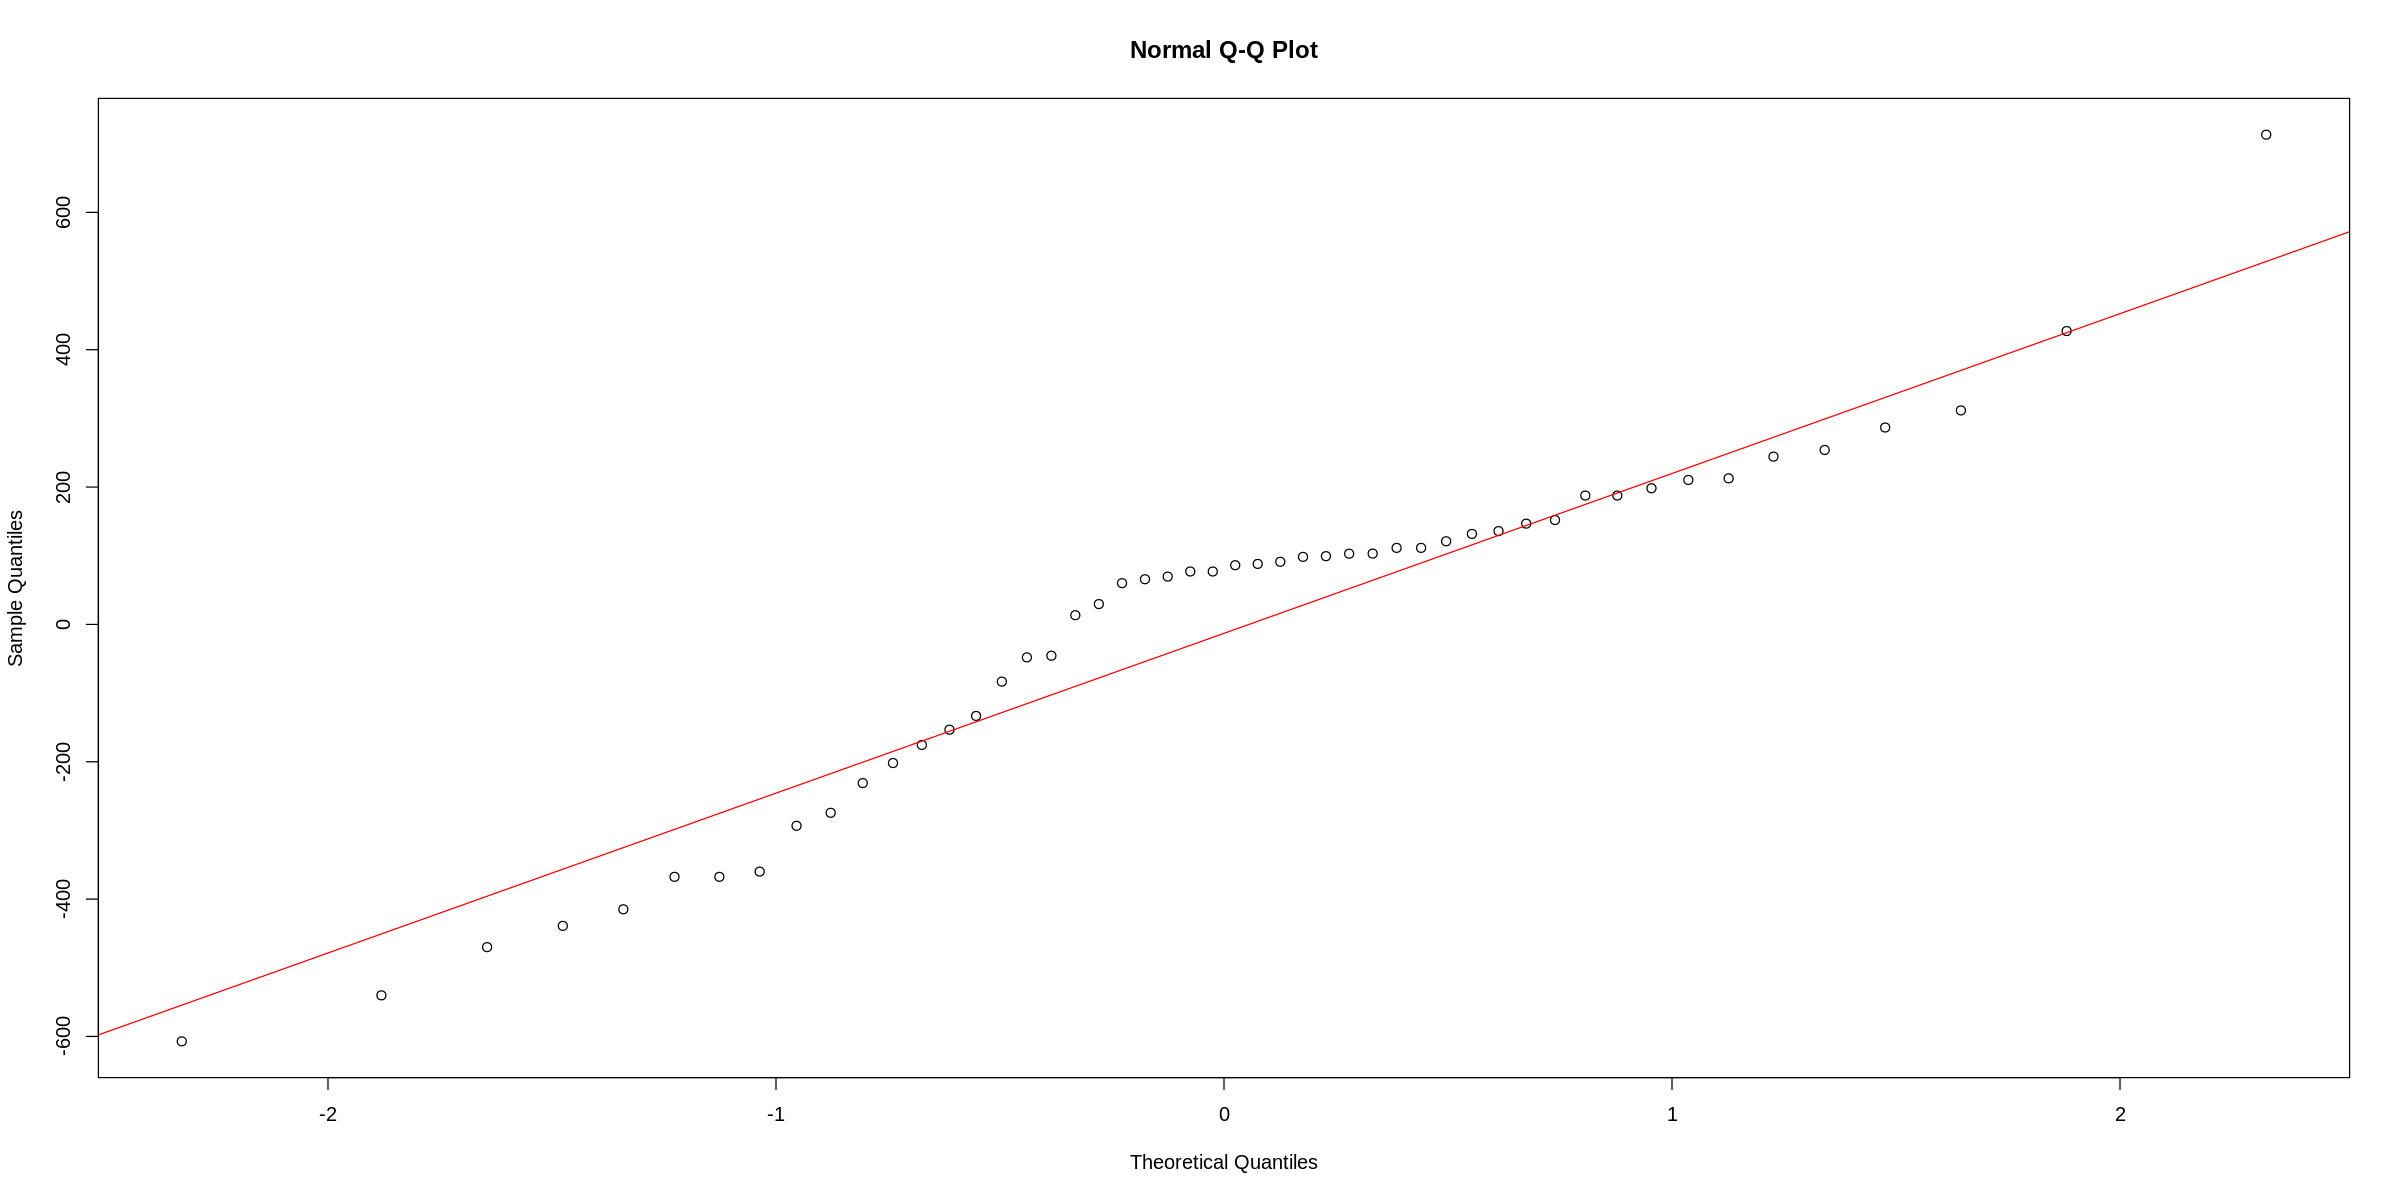

In [ ]:
# 10

# Получаем остатки модели
residuals_new <- residuals(model_adjusted)

# Гистограмма остатков
hist(residuals_new, breaks = 30, main = "Гистограмма остатков новой модели", col = "lightblue")

# QQ-график для остатков
qqnorm(residuals_new)
qqline(residuals_new, col = "red")

# Тест Шапиро-Уилка
shapiro.test(residuals_new)

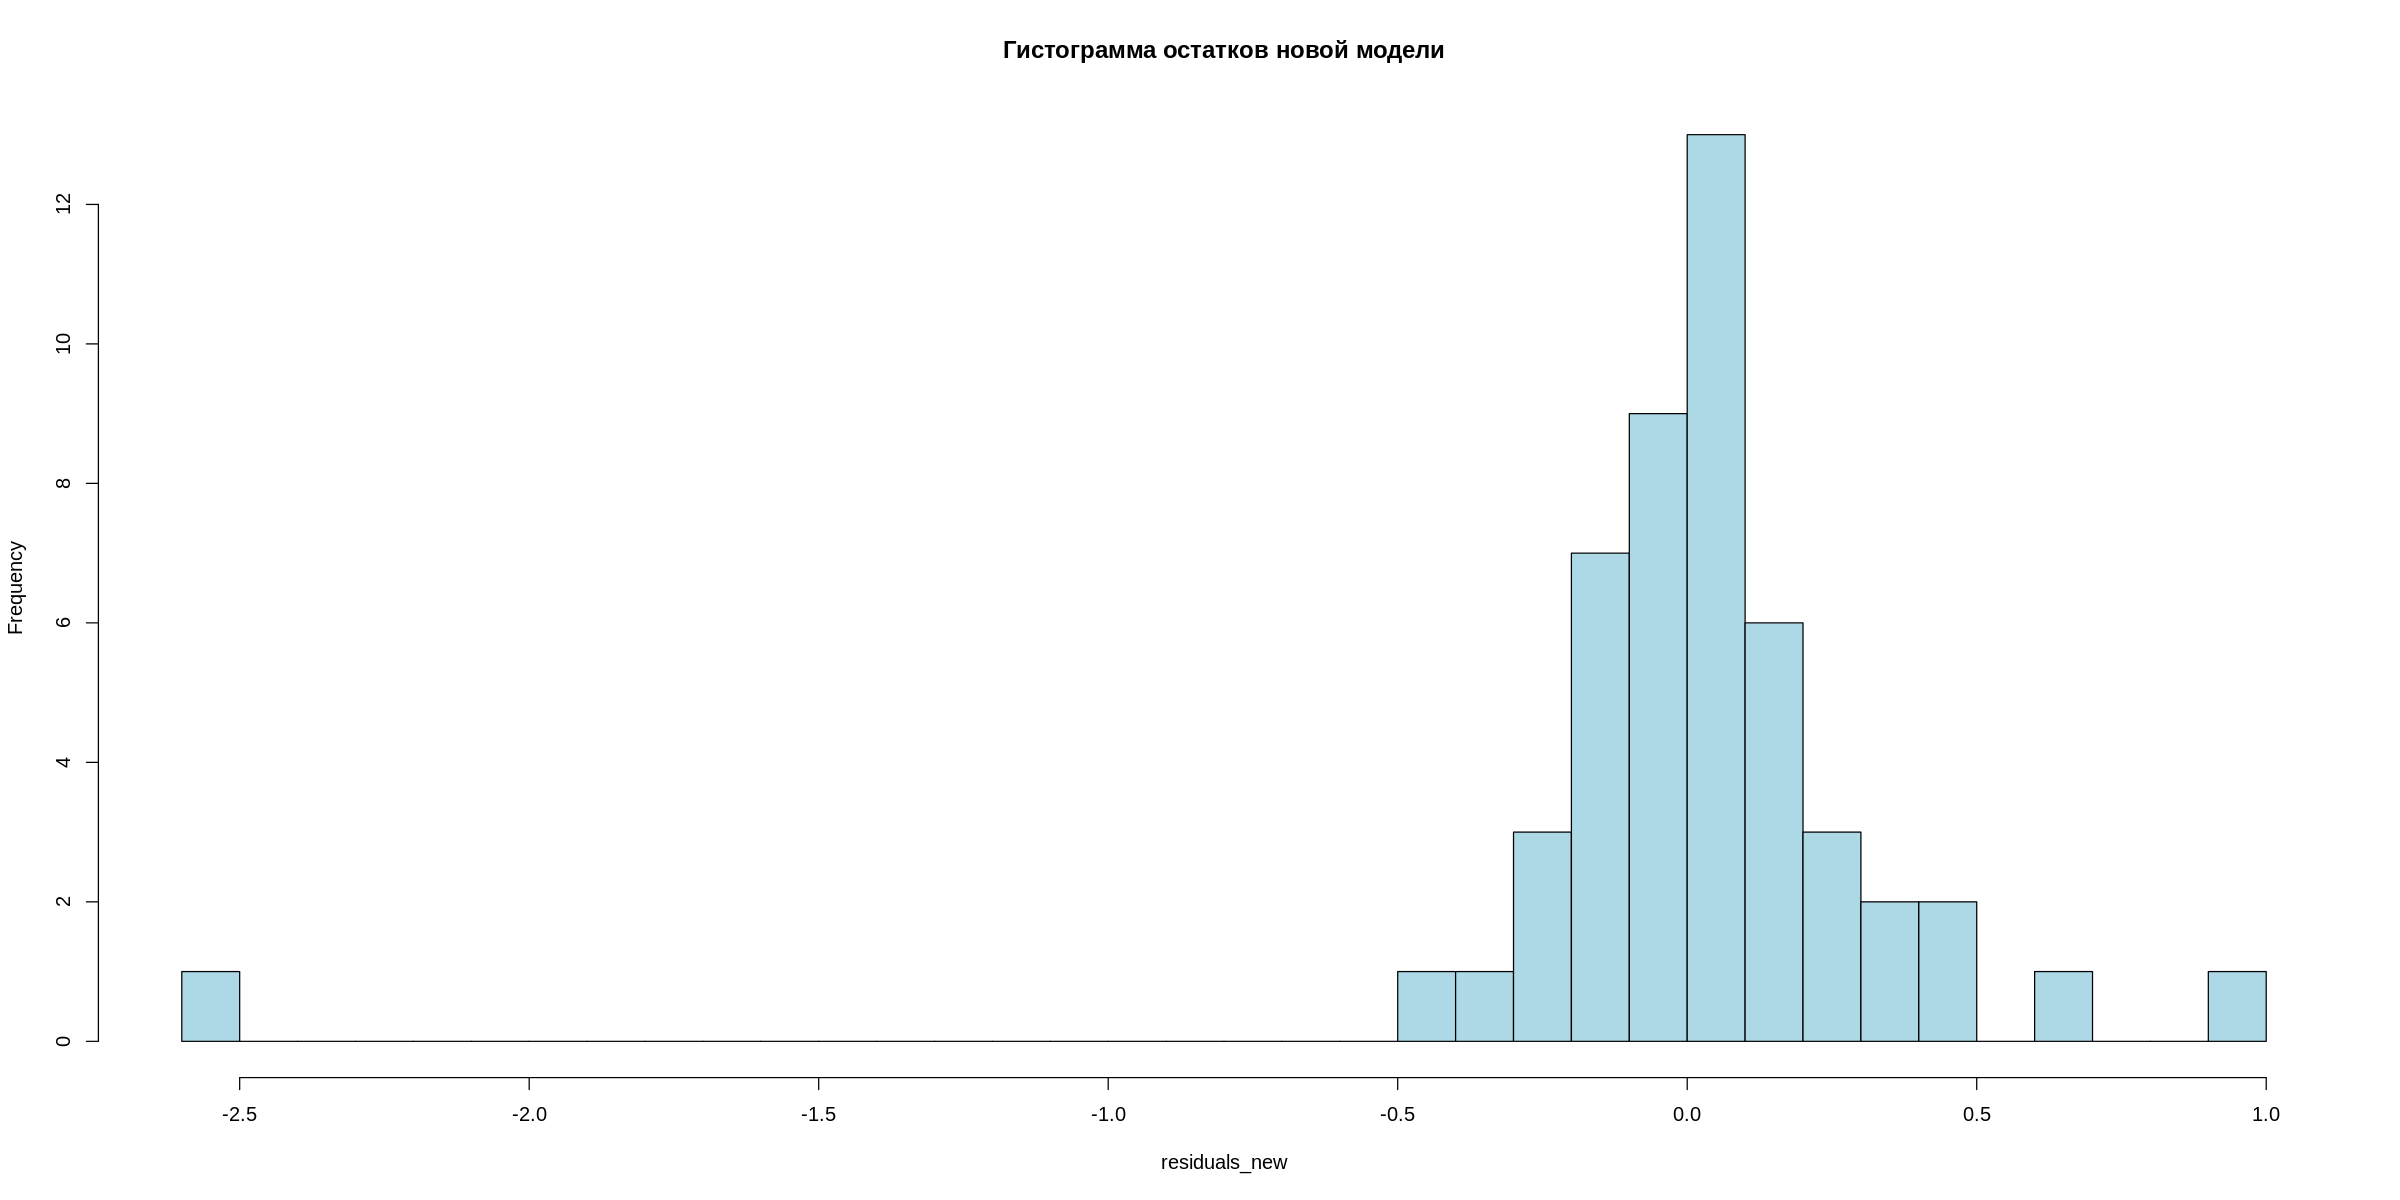


	Shapiro-Wilk normality test

data:  residuals_new
W = 0.63508, p-value = 6.705e-10


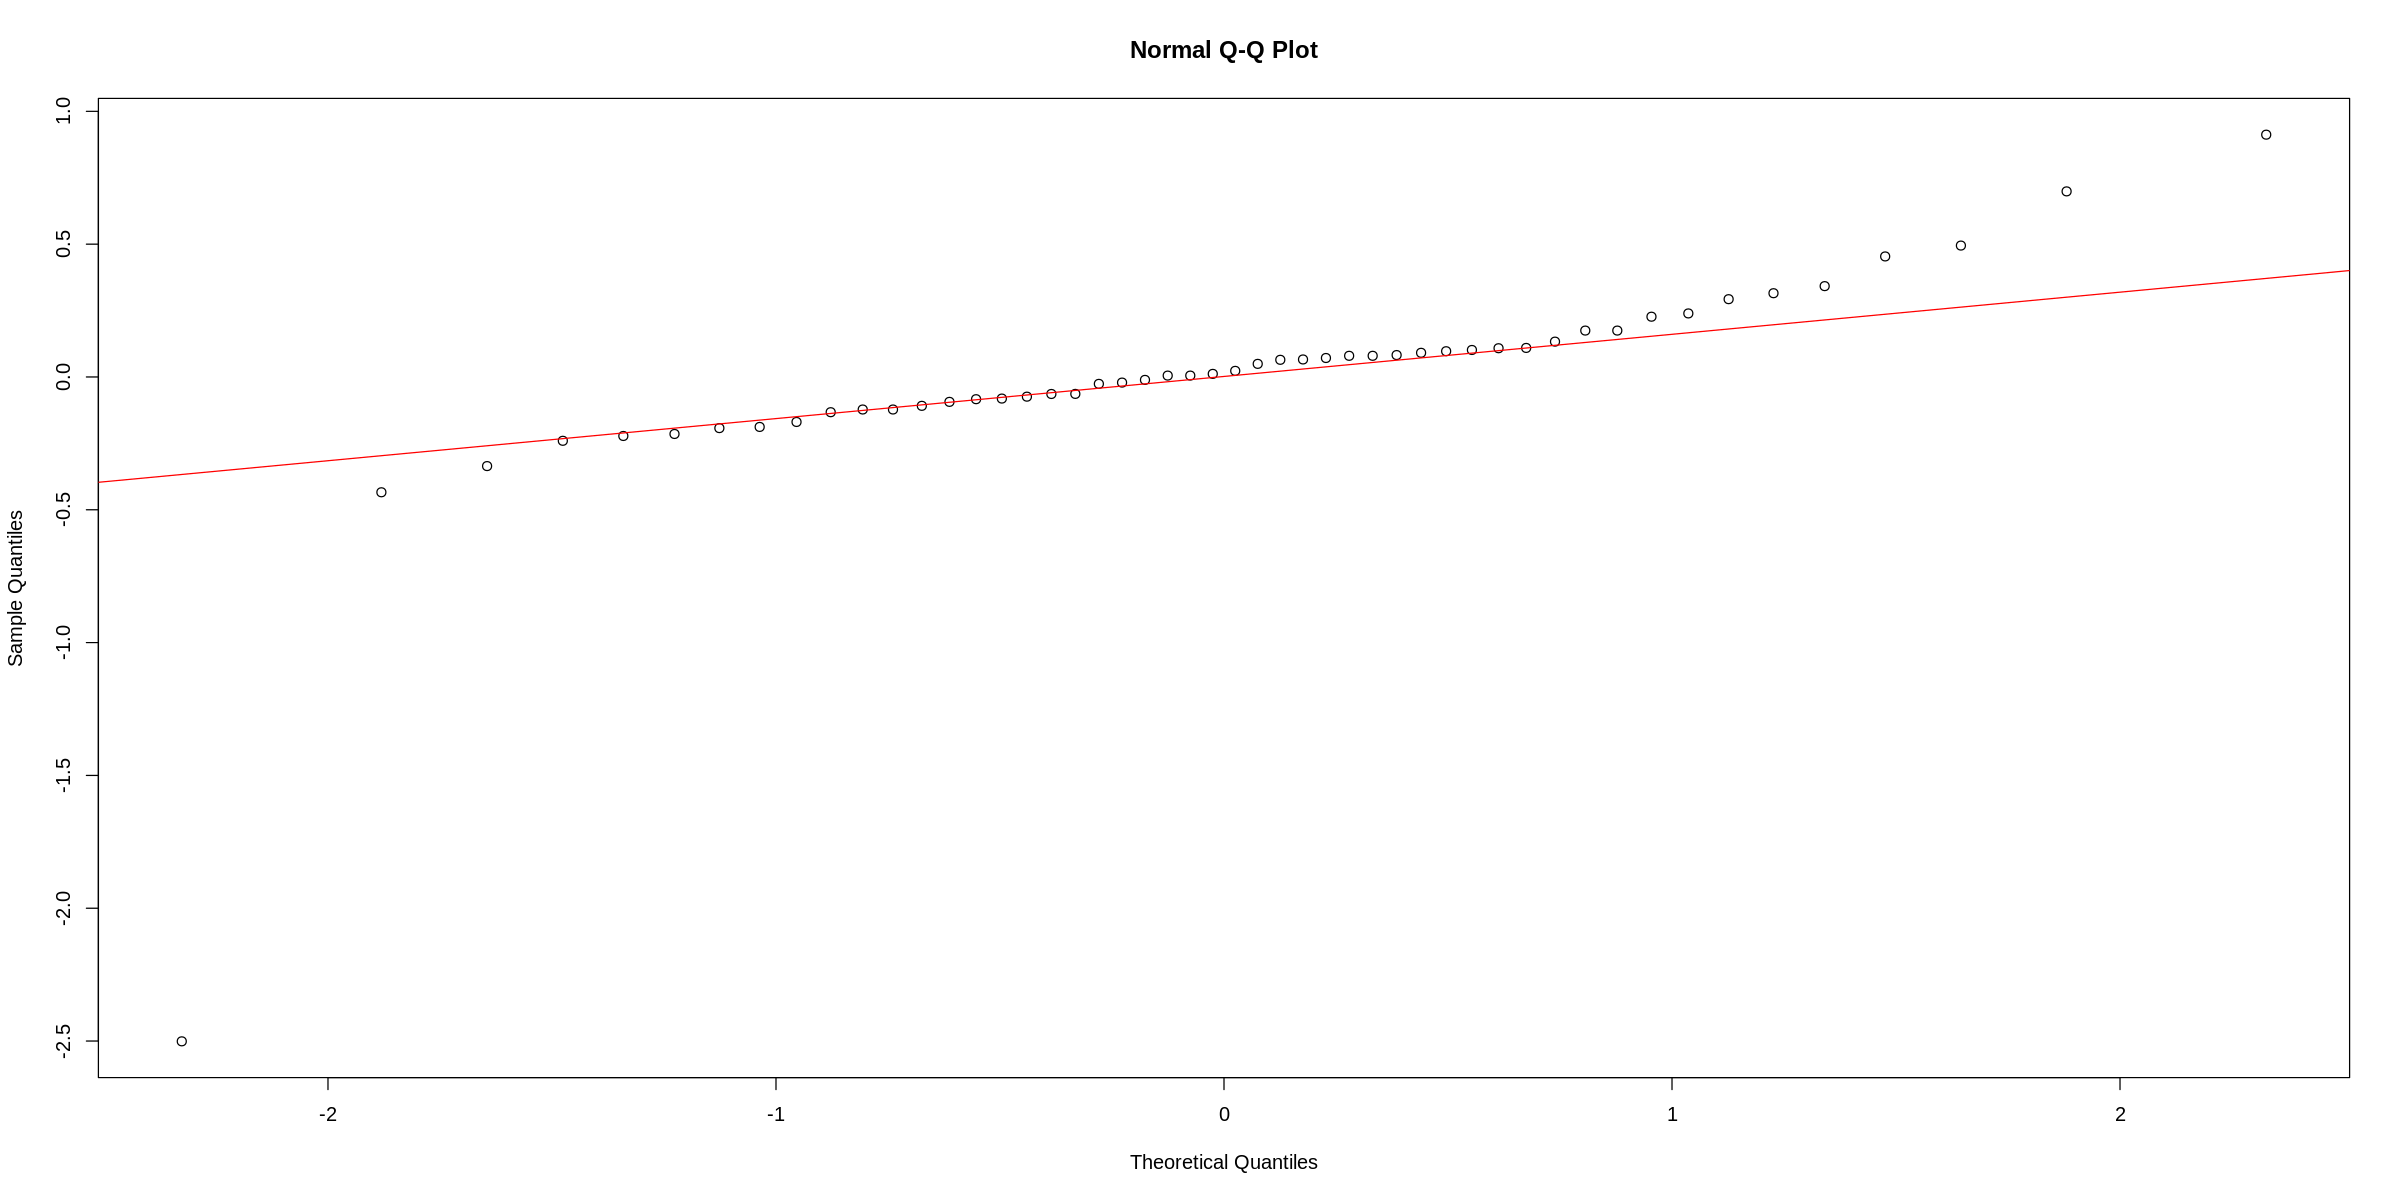

In [ ]:
# Получаем остатки модели
residuals_new <- residuals(model_log)

# Гистограмма остатков
hist(residuals_new, breaks = 30, main = "Гистограмма остатков новой модели", col = "lightblue")

# QQ-график для остатков
qqnorm(residuals_new)
qqline(residuals_new, col = "red")

# Тест Шапиро-Уилка
shapiro.test(residuals_new)

# 11. Проверить остатки новой модели на гетероскедастичность.

In [ ]:
# 11

library(lmtest)
bptest(model_adjusted)
gqtest(model_adjusted)



	studentized Breusch-Pagan test

data:  model_adjusted
BP = 31.636, df = 1, p-value = 1.86e-08



	Goldfeld-Quandt test

data:  model_adjusted
GQ = 4.4202, df1 = 23, df2 = 23, p-value = 0.0003596
alternative hypothesis: variance increases from segment 1 to 2


In [ ]:
library(lmtest)
bptest(model_log)
gqtest(model_log)


	studentized Breusch-Pagan test

data:  model_log
BP = 0.037442, df = 1, p-value = 0.8466



	Goldfeld-Quandt test

data:  model_log
GQ = 17.944, df1 = 23, df2 = 23, p-value = 8.345e-10
alternative hypothesis: variance increases from segment 1 to 2


# 12. Построить диаграмму рассеяния, линию регрессии, доверительные интервалы для функции регрессии и для прогноза.


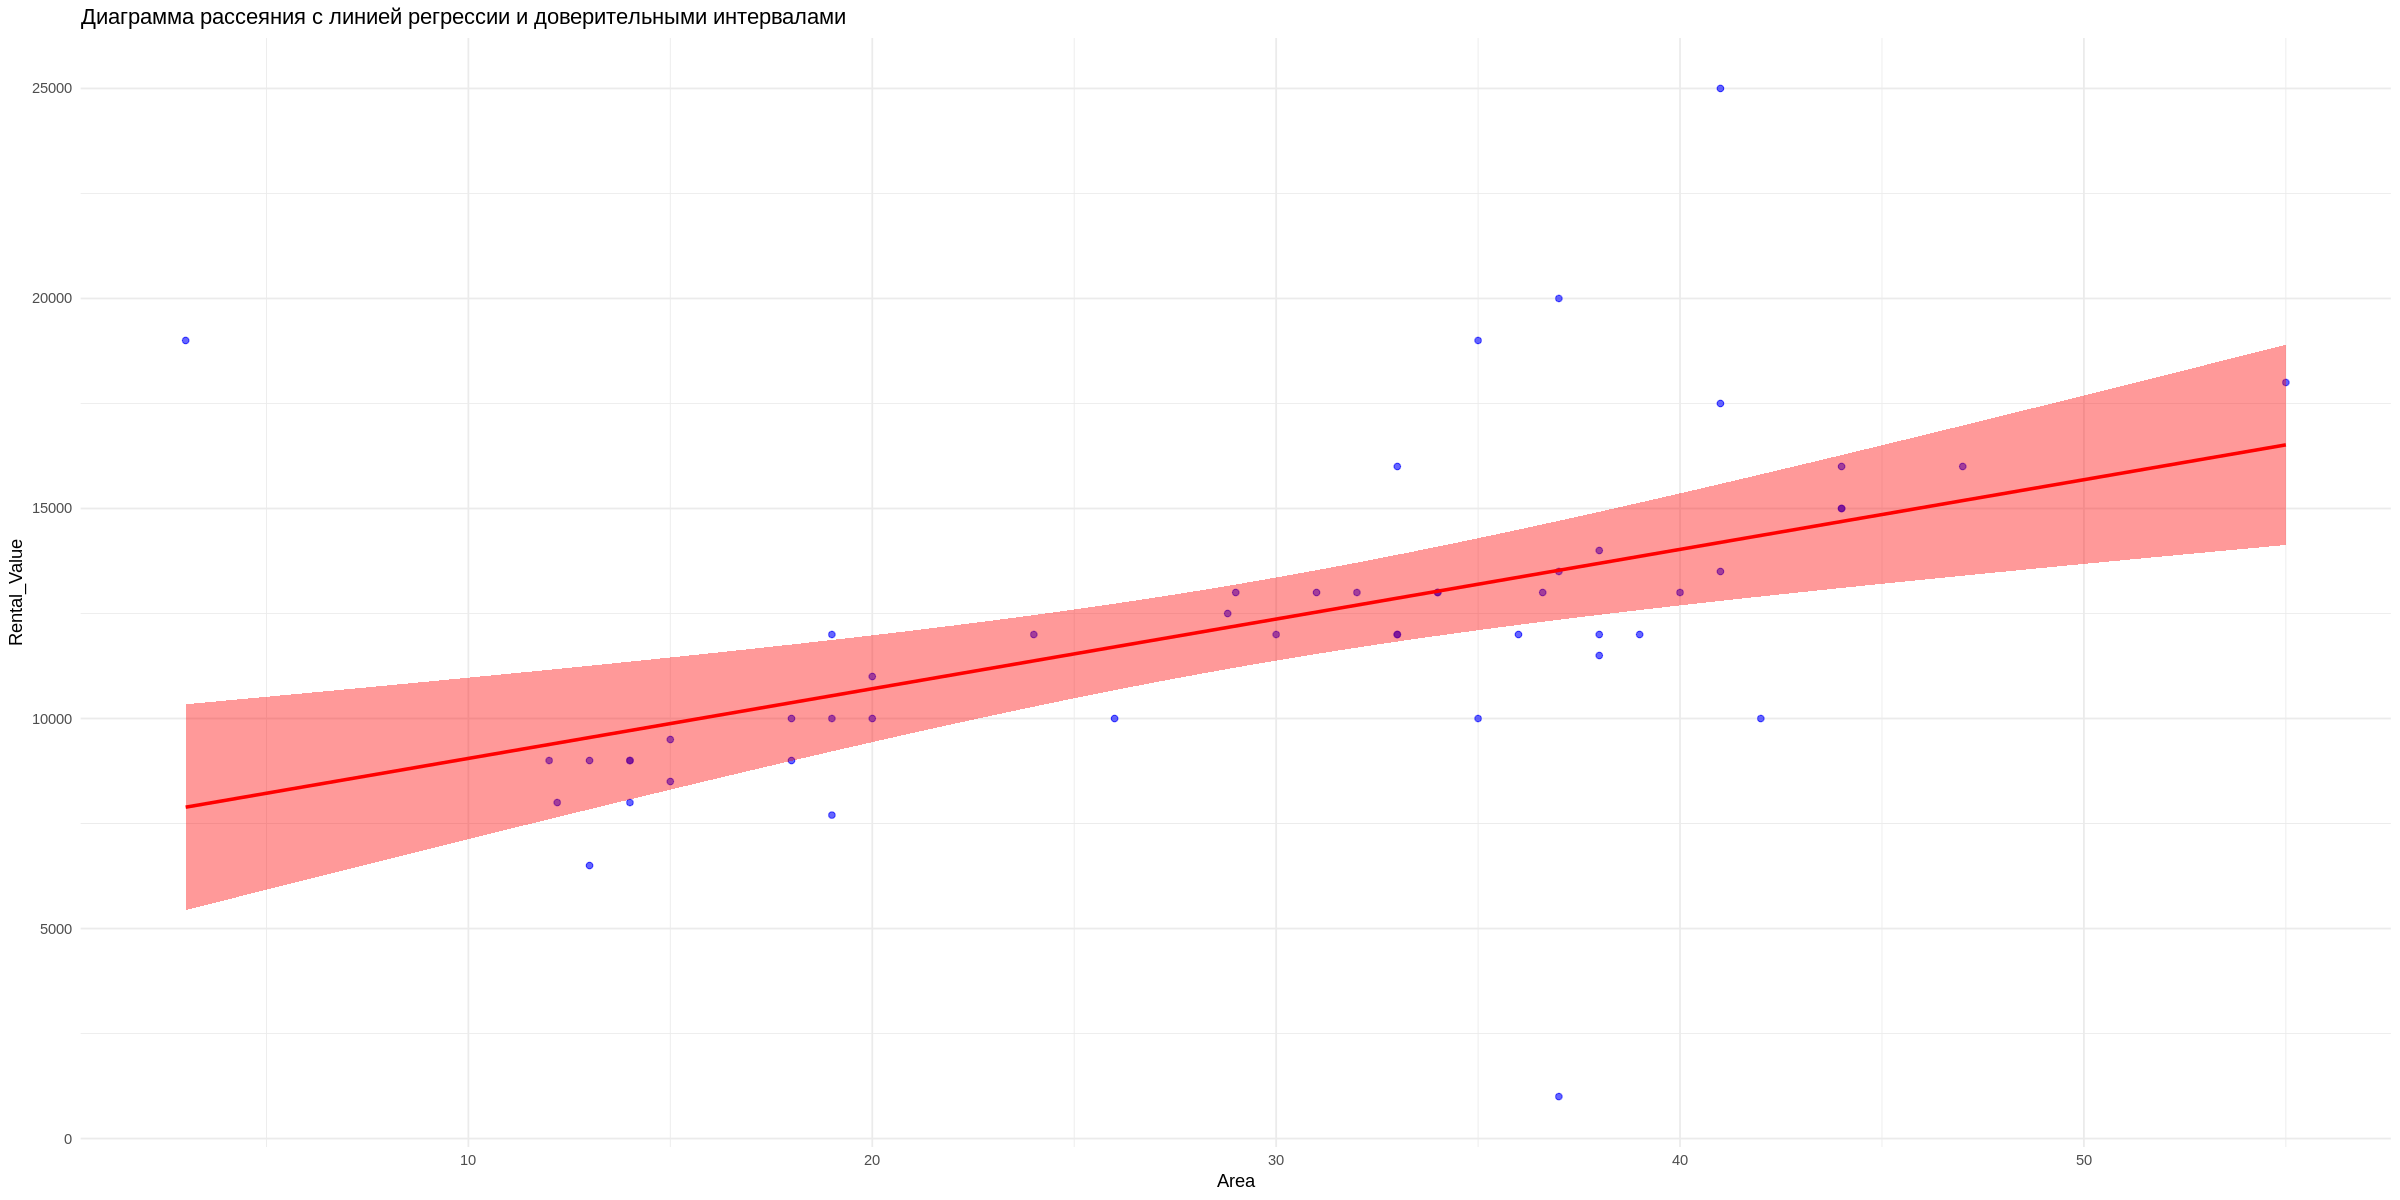

In [ ]:
# 12

# Построение графика
ggplot(flats, aes(x = Area, y = Rental_Value)) +
  geom_point(color = "blue", alpha = 0.6) +  # Диаграмма рассеяния
  geom_smooth(method = "lm", formula = y ~ x, color = "red", fill = "red", level = 0.95) +  # Линия регрессии + доверительный интервал
  ggtitle("Диаграмма рассеяния с линией регрессии и доверительными интервалами") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


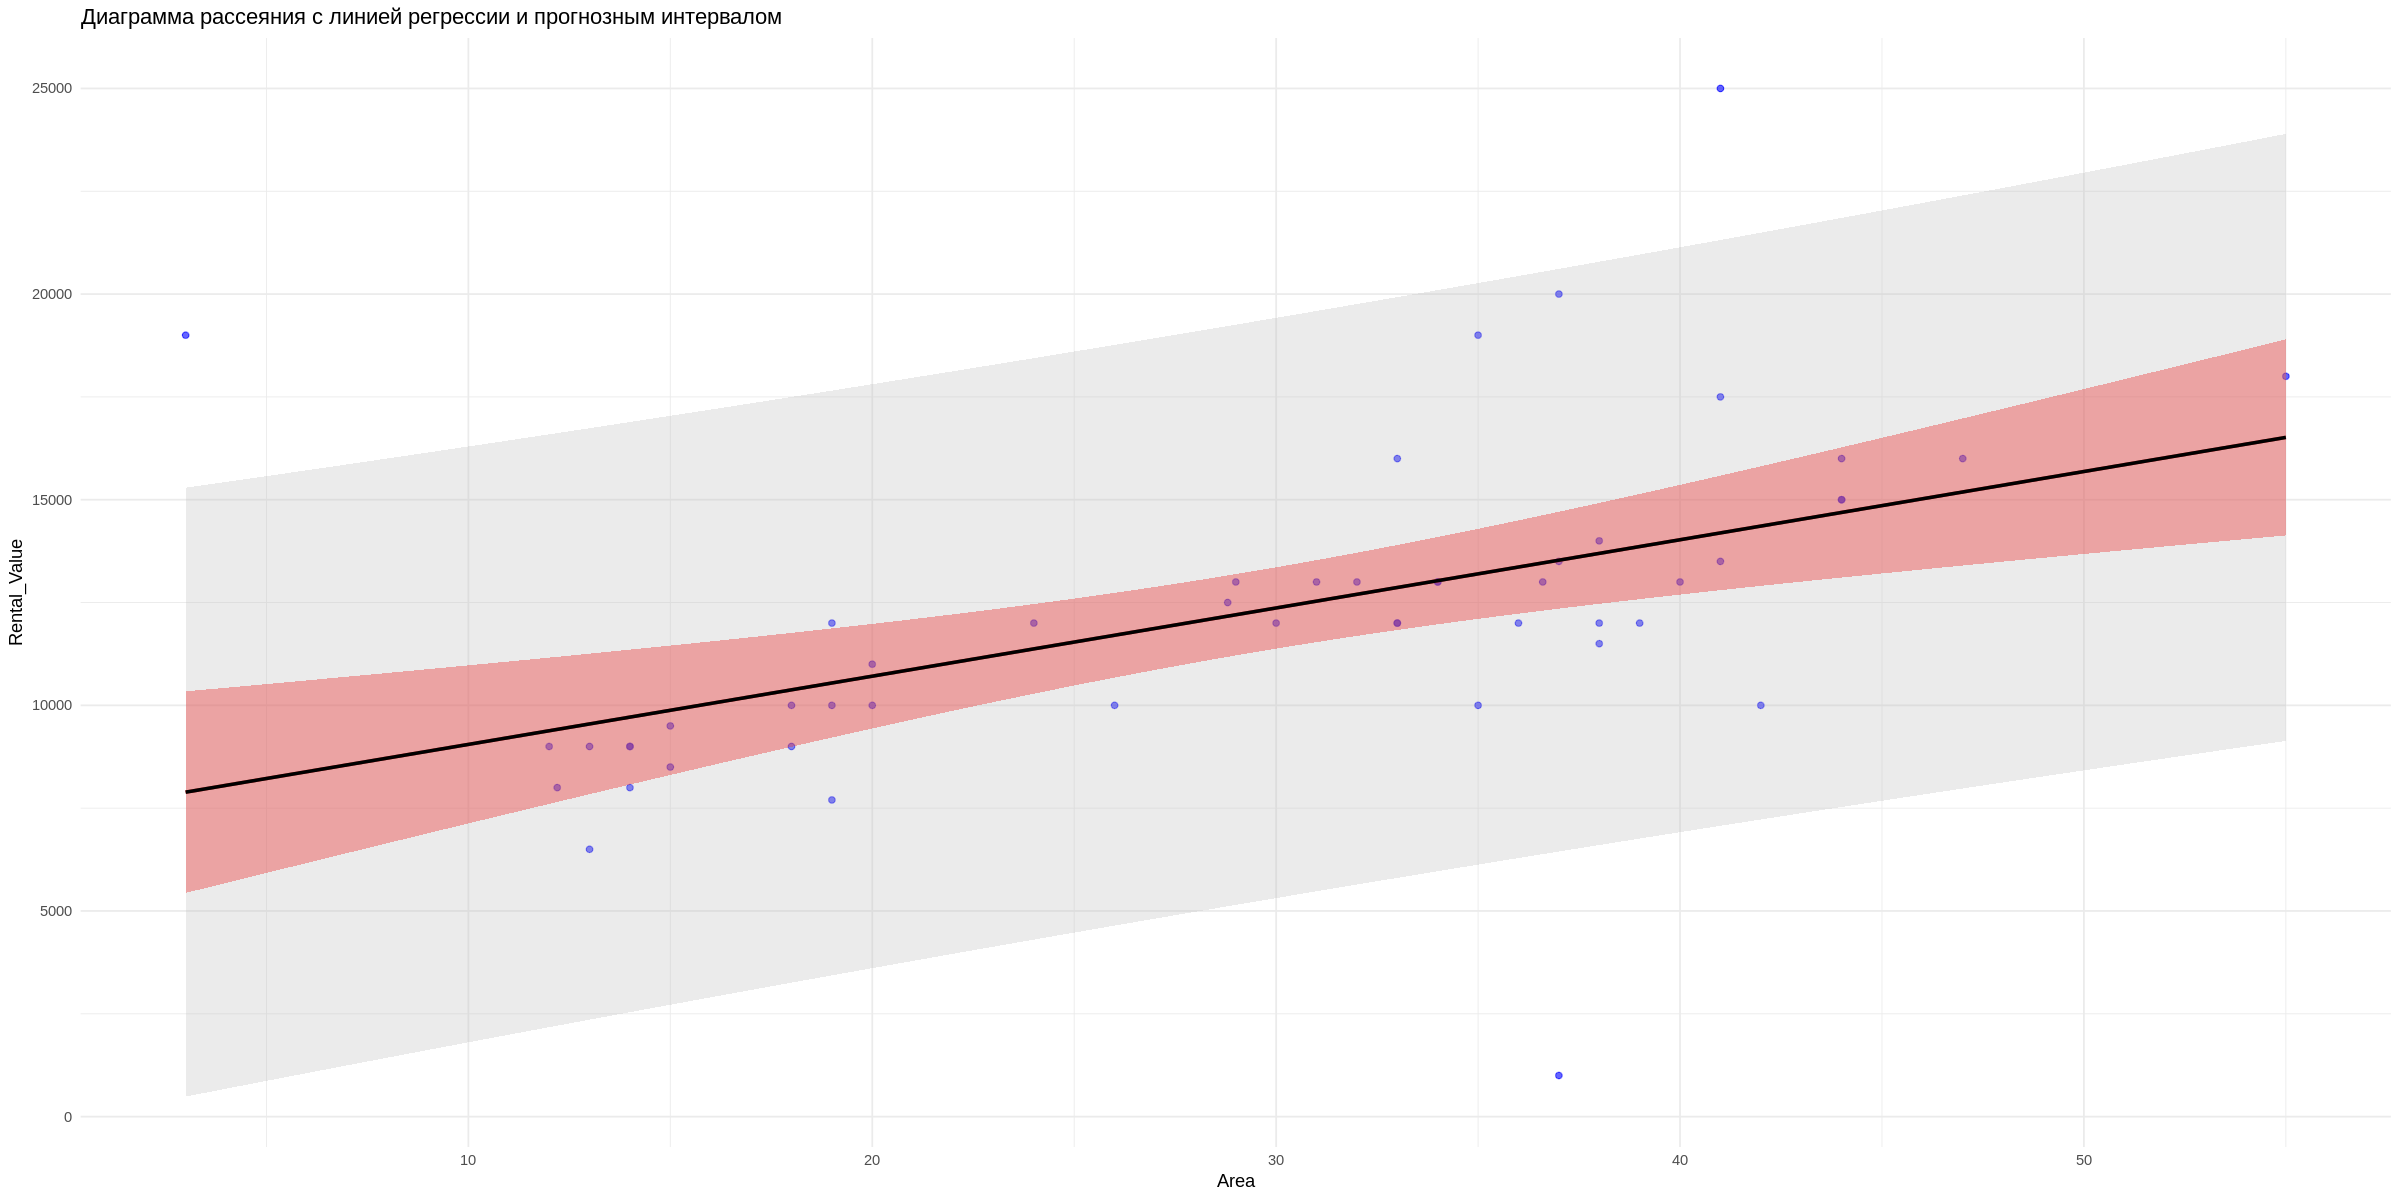

In [ ]:
# 12

# Убеждаемся, что модель создана
model <- lm(Rental_Value ~ Area, data = flats)

# Создаем новые данные для предсказания
new_data <- data.frame(Area = seq(min(flats$Area), max(flats$Area), length.out = 100))

# Предсказания с доверительными и прогнозными интервалами
predictions <- predict(model, newdata = new_data, interval = "prediction")

# Добавляем предсказанные значения в таблицу
new_data$fit <- predictions[, "fit"]
new_data$lwr_pred <- predictions[, "lwr"]
new_data$upr_pred <- predictions[, "upr"]

# Построение графика
ggplot() +
  geom_point(data = flats, aes(x = Area, y = Rental_Value), color = "blue", alpha = 0.6) +  # Исходные данные
  geom_smooth(data = flats, aes(x = Area, y = Rental_Value), method = "lm", color = "red", fill = "red", level = 0.95) +  # Доверительный интервал
  geom_ribbon(data = new_data, aes(x = Area, ymin = lwr_pred, ymax = upr_pred), fill = "gray", alpha = 0.3) +  # Прогнозный интервал
  geom_line(data = new_data, aes(x = Area, y = fit), color = "black", linewidth = 1) +  # Линия регрессии
  ggtitle("Диаграмма рассеяния с линией регрессии и прогнозным интервалом") +
  theme_minimal()


# 13. Построить модель множественной регрессии на все факторы.

In [ ]:
# 13
flats <- flats[, !(names(flats) %in% c("Rental_Value_Adjusted", "Log_Rental_Value"))]
str(flats)  # Проверяем структуру данных
summary(flats)  # Основная статистика по столбцам

'data.frame':	50 obs. of  8 variables:
 $ Type        : chr  "студия" "студия" "студия" "студия" ...
 $ Rental_Value: int  8500 9000 9500 8000 9000 9000 10000 8000 6500 9000 ...
 $ Floor       : int  1 1 8 1 2 1 2 1 1 2 ...
 $ Total_Floors: int  5 5 9 5 5 5 5 5 3 4 ...
 $ Area        : num  15 14 15 12.2 18 14 19 14 13 13 ...
 $ Furniture   : chr  "нет" "нет" "есть" "есть" ...
 $ Area_Scaled : num  0.0667 0.0714 0.0667 0.082 0.0556 ...
 $ Area_Log    : num  2.71 2.64 2.71 2.5 2.89 ...


     Type            Rental_Value       Floor        Total_Floors  
 Length:50          Min.   : 1000   Min.   : 1.00   Min.   : 3.00  
 Class :character   1st Qu.:10000   1st Qu.: 2.00   1st Qu.: 5.00  
 Mode  :character   Median :12000   Median : 3.00   Median : 5.00  
                    Mean   :12274   Mean   : 3.58   Mean   : 7.16  
                    3rd Qu.:13500   3rd Qu.: 4.00   3rd Qu.: 9.00  
                    Max.   :25000   Max.   :13.00   Max.   :17.00  
      Area        Furniture          Area_Scaled         Area_Log    
 Min.   : 3.00   Length:50          Min.   :0.01818   Min.   :1.099  
 1st Qu.:19.00   Class :character   1st Qu.:0.02632   1st Qu.:2.944  
 Median :33.00   Mode  :character   Median :0.03030   Median :3.497  
 Mean   :29.43                      Mean   :0.04585   Mean   :3.273  
 3rd Qu.:38.00                      3rd Qu.:0.05263   3rd Qu.:3.638  
 Max.   :55.00                      Max.   :0.33333   Max.   :4.007  

In [ ]:
model_multiple <- lm(Rental_Value ~ ., data = flats)
summary(model_multiple)  # Вывод результатов


Call:
lm(formula = Rental_Value ~ ., data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-13075.3   -887.1    -25.4    852.3  10068.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   -228.78   40304.63  -0.006    0.995
Typeстудия     -66.49    2352.31  -0.028    0.978
Floor          240.88     215.13   1.120    0.269
Total_Floors   -62.11     165.05  -0.376    0.709
Area           256.83     369.56   0.695    0.491
Furnitureнет -1171.55    1081.42  -1.083    0.285
Area_Scaled  50757.40   79695.29   0.637    0.528
Area_Log       770.97   14296.40   0.054    0.957

Residual standard error: 3123 on 42 degrees of freedom
Multiple R-squared:  0.4649,	Adjusted R-squared:  0.3757 
F-statistic: 5.213 on 7 and 42 DF,  p-value: 0.0002472


# 14. Удалить незначимые факторы, объяснить, почему факторы незначимы и построить новую модель.

In [ ]:
# 14
# удалить по этапно незначимые факторы

# удаляем сначала Total_Floors
model_reduced <- lm(Rental_Value ~ Type + Floor + Area + Furniture, data = flats)
summary(model_reduced)  # Проверяем обновлённую модель


Call:
lm(formula = Rental_Value ~ Type + Floor + Area + Furniture, 
    data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-13258.3  -1273.1   -571.7   1179.5  10596.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10858.46    2514.16   4.319 8.53e-05 ***
Typeстудия   -2746.96    1662.13  -1.653    0.105    
Floor          144.15     200.71   0.718    0.476    
Area            72.41      63.31   1.144    0.259    
Furnitureнет -1567.36    1087.39  -1.441    0.156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3344 on 45 degrees of freedom
Multiple R-squared:  0.3429,	Adjusted R-squared:  0.2845 
F-statistic: 5.871 on 4 and 45 DF,  p-value: 0.0006868


In [ ]:
# удаляем сначала Total_Floors
model_reduced <- lm(Rental_Value ~ Type + Area + Furniture, data = flats)
summary(model_reduced)  # Проверяем обновлённую модель


Call:
lm(formula = Rental_Value ~ Type + Area + Furniture, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-13133.7  -1363.4   -507.1   1117.9  10589.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11571.84    2297.43   5.037 7.77e-06 ***
Typeстудия   -3045.78    1600.72  -1.903   0.0633 .  
Area            69.24      62.82   1.102   0.2761    
Furnitureнет -1622.86    1078.92  -1.504   0.1394    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3326 on 46 degrees of freedom
Multiple R-squared:  0.3354,	Adjusted R-squared:  0.292 
F-statistic: 7.737 on 3 and 46 DF,  p-value: 0.0002749


In [ ]:
# удаляем сначала Total_Floors
model_reduced <- lm(Rental_Value ~ Type + Floor + Furniture, data = flats)
summary(model_reduced)  # Проверяем обновлённую модель


Call:
lm(formula = Rental_Value ~ Type + Floor + Furniture, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-13117.6  -1655.4   -550.3   1266.8  11010.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13476.9     1042.5  12.928  < 2e-16 ***
Typeстудия    -4182.9     1092.8  -3.828 0.000389 ***
Floor           128.1      200.9   0.638 0.526707    
Furnitureнет  -1564.5     1091.0  -1.434 0.158333    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3355 on 46 degrees of freedom
Multiple R-squared:  0.3238,	Adjusted R-squared:  0.2797 
F-statistic: 7.343 on 3 and 46 DF,  p-value: 0.0004026


In [ ]:
# удаляем сначала Total_Floors
model_reduced <- lm(Rental_Value ~ Type + Furniture, data = flats)
summary(model_reduced)  # Проверяем обновлённую модель


Call:
lm(formula = Rental_Value ~ Type + Furniture, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-13011.8  -1913.4   -511.8    996.2  10988.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   14011.8      615.3  22.771  < 2e-16 ***
Typeстудия    -4393.7     1035.0  -4.245 0.000102 ***
Furnitureнет  -1614.2     1081.4  -1.493 0.142175    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3334 on 47 degrees of freedom
Multiple R-squared:  0.3178,	Adjusted R-squared:  0.2888 
F-statistic: 10.95 on 2 and 47 DF,  p-value: 0.0001249


In [ ]:
# удаляем сначала Total_Floors
model_reduced <- lm(Rental_Value ~ Type, data = flats)
summary(model_reduced)  # Проверяем обновлённую модель


Call:
lm(formula = Rental_Value ~ Type, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-12642.9  -1642.9   -611.4   1247.9  11357.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13642.9      570.7  23.906  < 2e-16 ***
Typeстудия   -4562.9     1041.9  -4.379 6.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3376 on 48 degrees of freedom
Multiple R-squared:  0.2855,	Adjusted R-squared:  0.2706 
F-statistic: 19.18 on 1 and 48 DF,  p-value: 6.426e-05


# 15. Построить прогноз для «своей квартиры» в соответствии с множественной моделью.

In [ ]:
# 15

# Создаём датафрейм с характеристиками новой квартиры
new_flat <- data.frame(
  Type = "студия",
  Floor = 3,
  Total_Floors = 5,
  Area = 25,
  Furniture = "есть"
)

# Делаем прогноз на основе построенной модели
predicted_value <- predict(model_reduced, newdata = new_flat)
print(predicted_value)  # Оценка стоимости аренды


   1 
9080 


# 16. Провести анализ остатков.

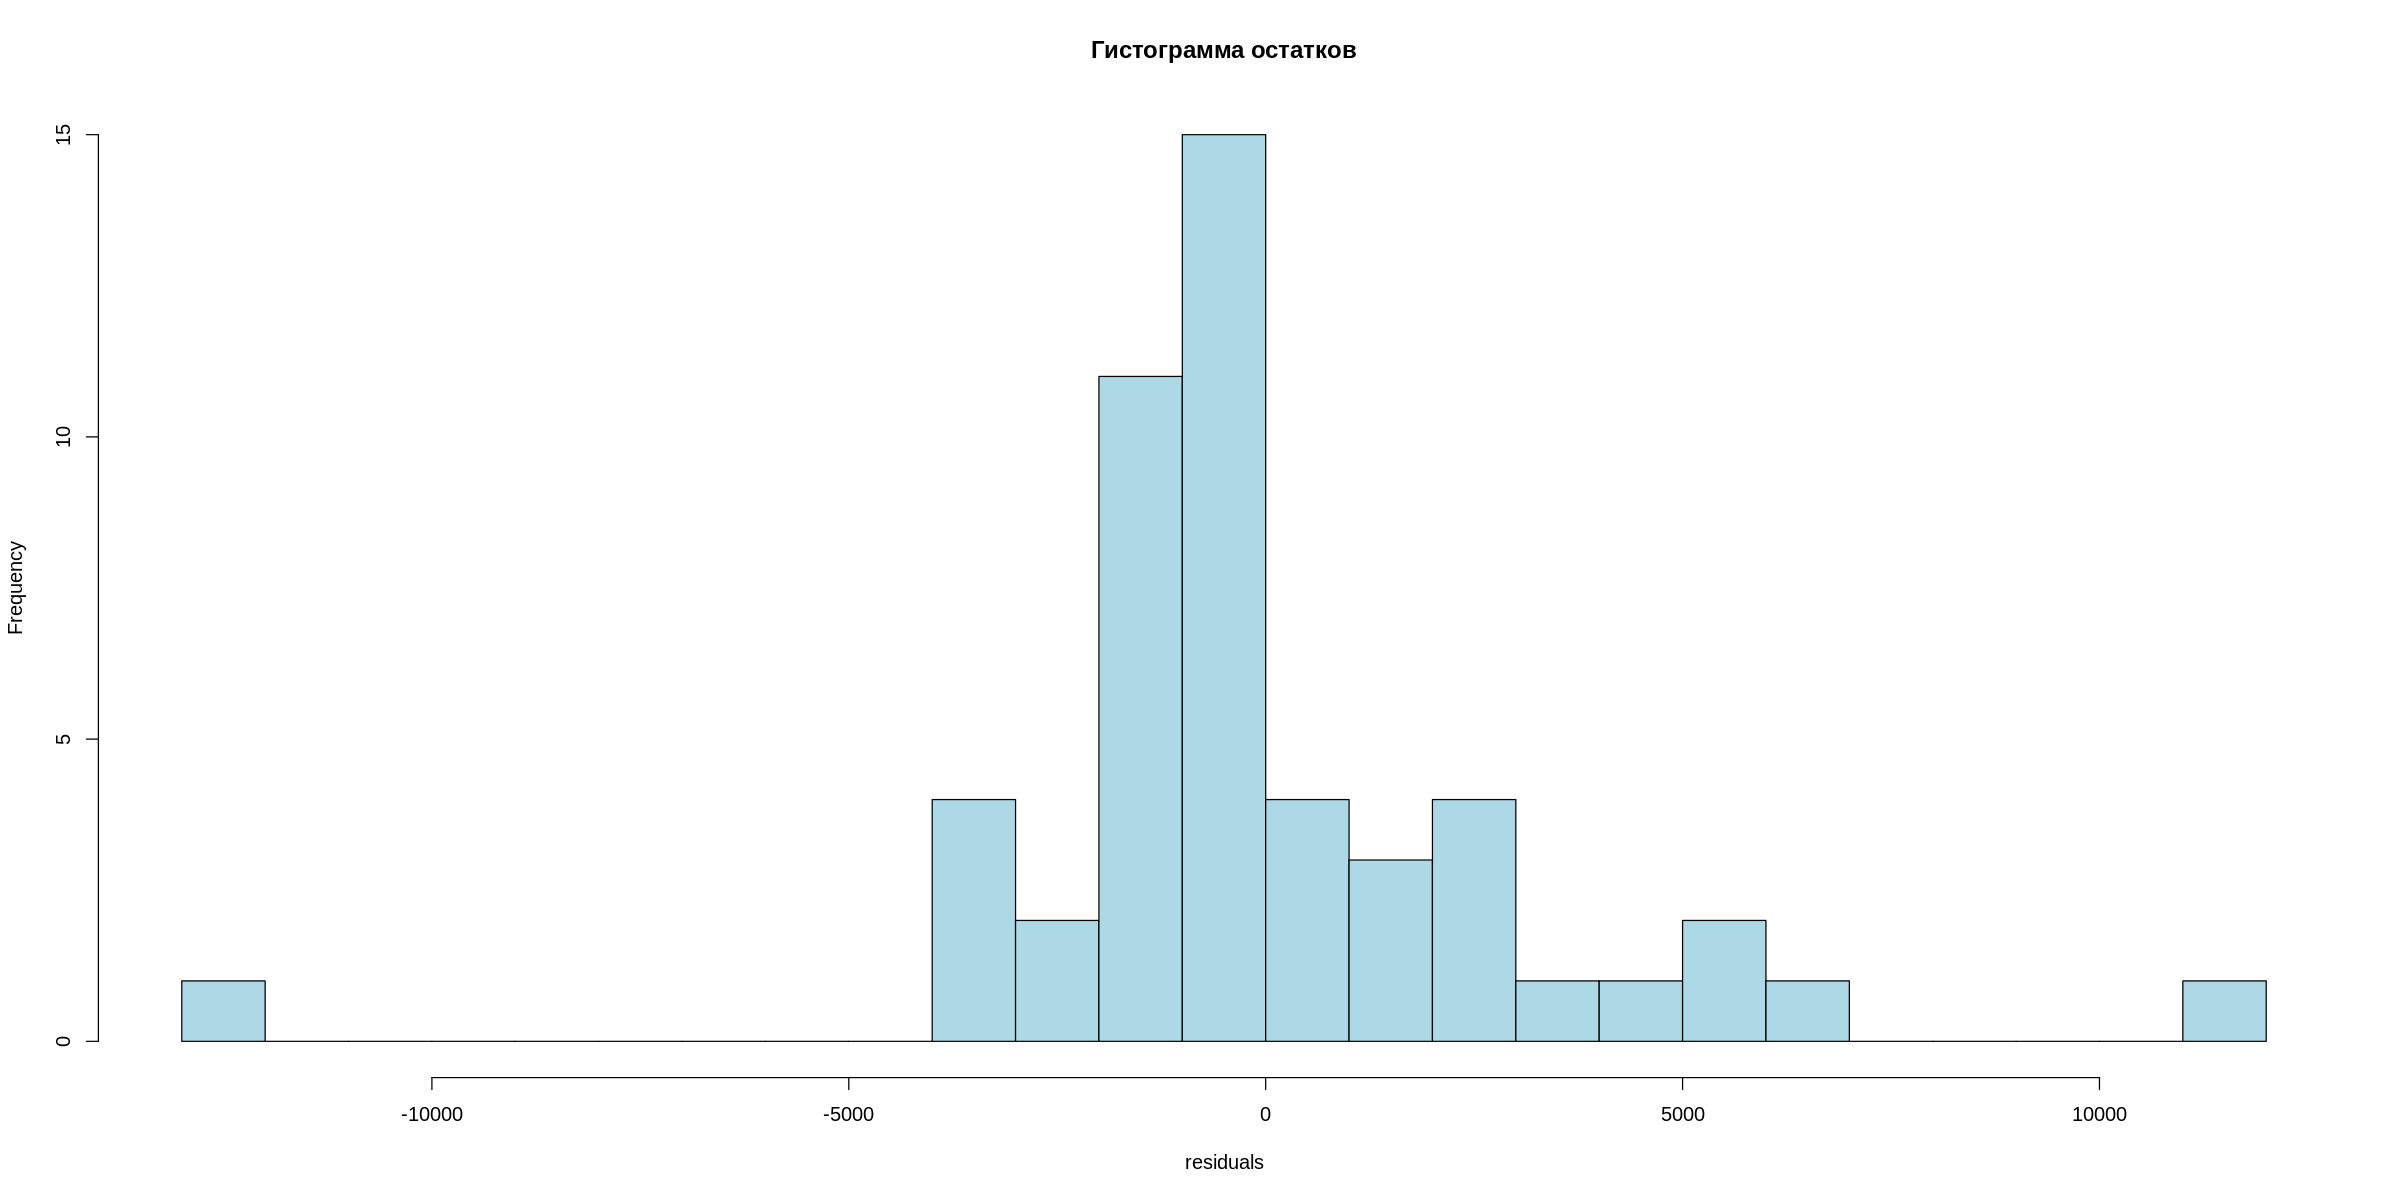


	Shapiro-Wilk normality test

data:  residuals
W = 0.87055, p-value = 5.852e-05


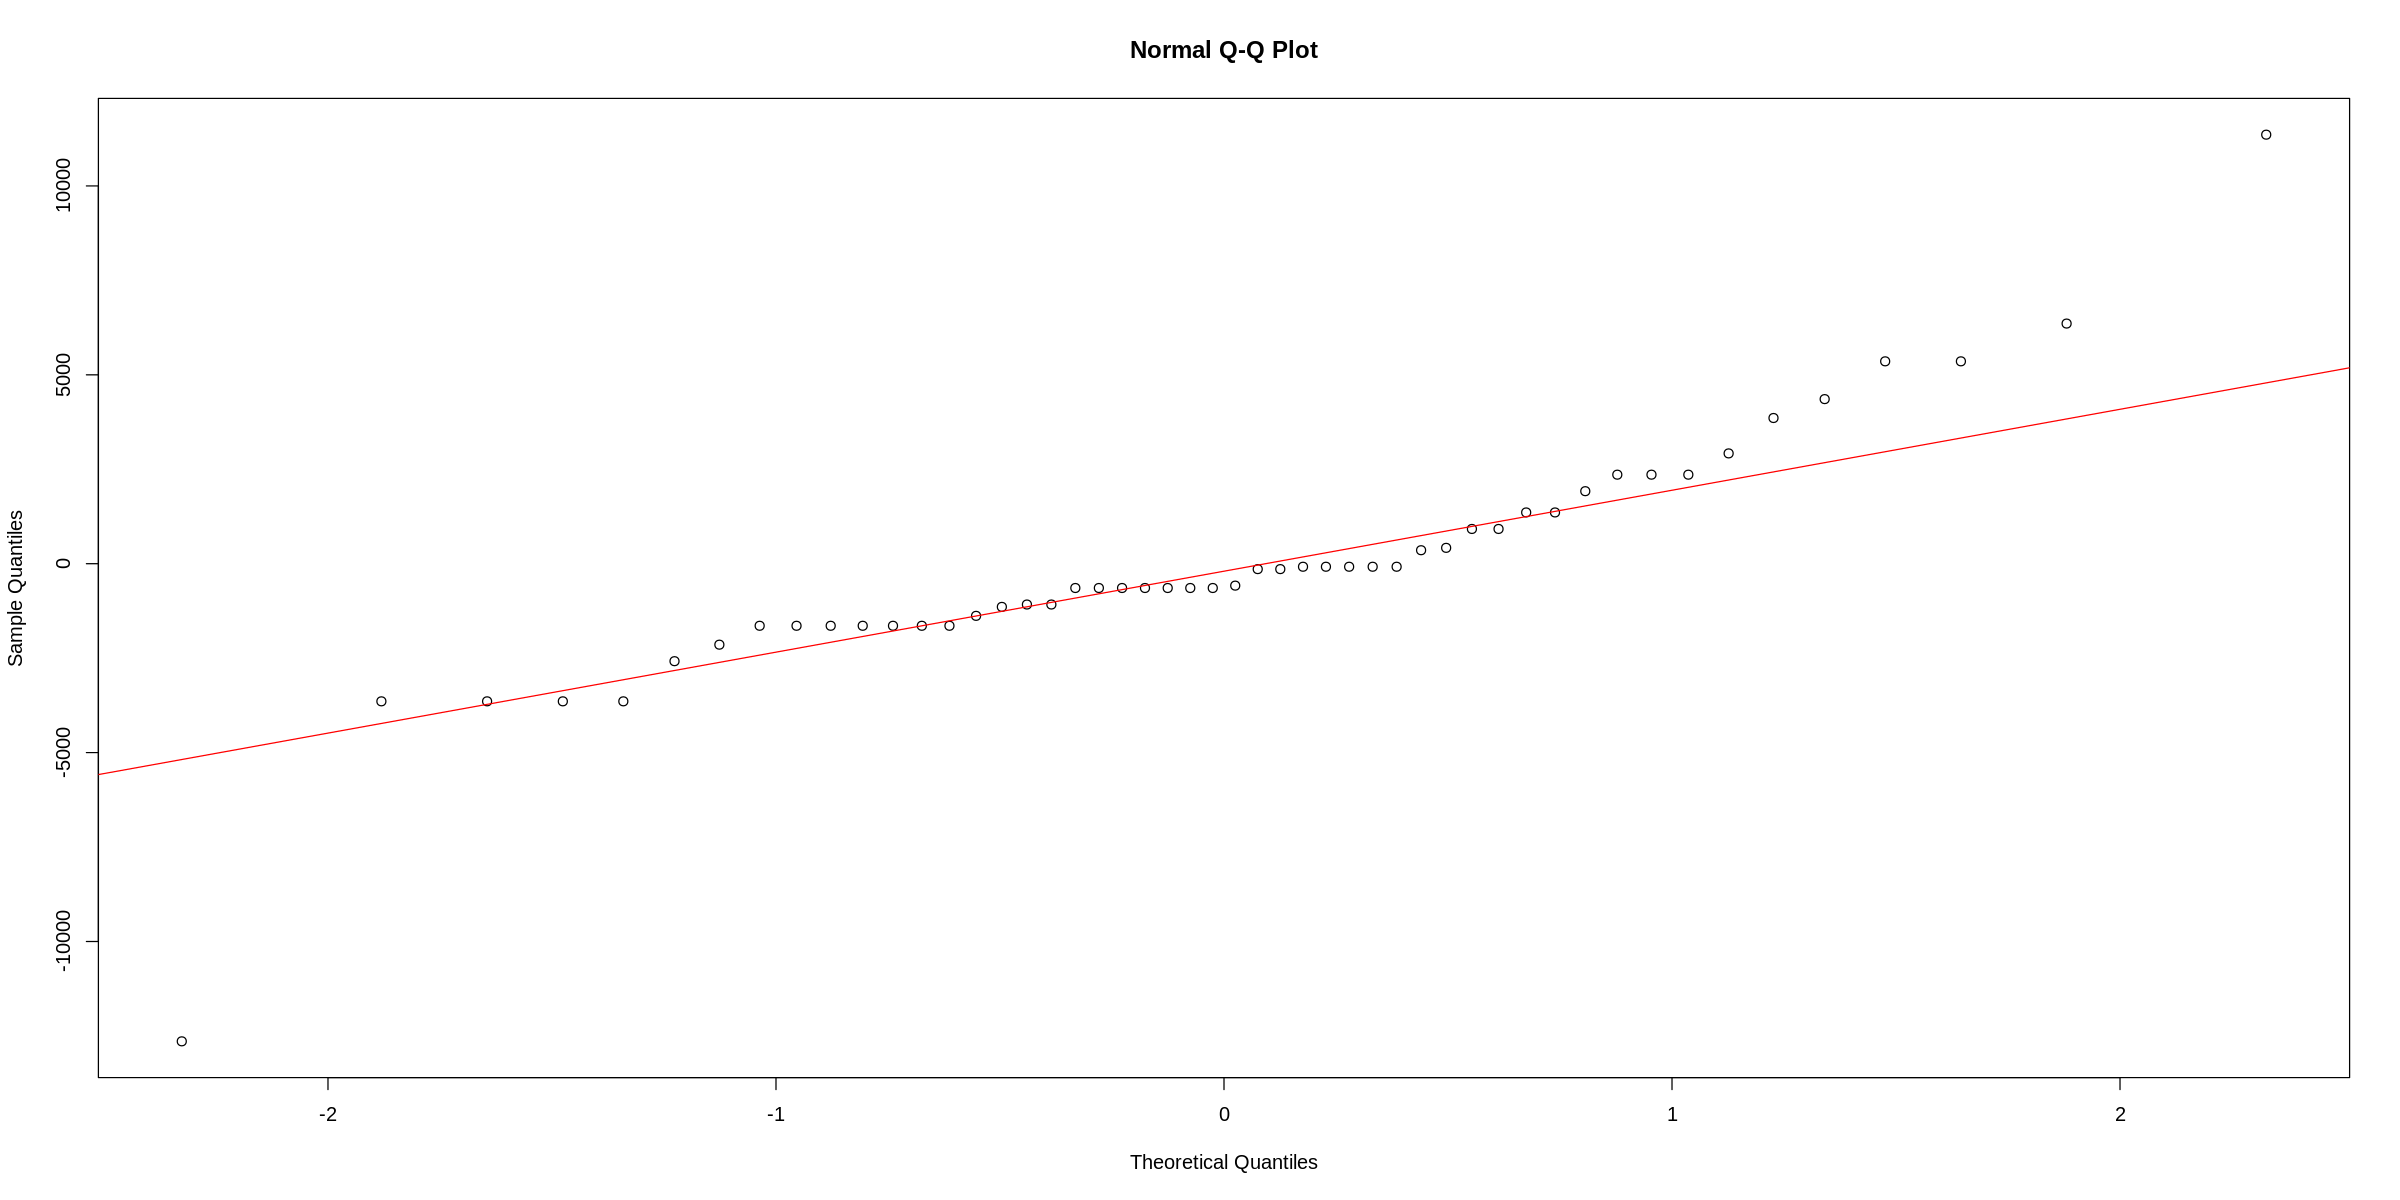

In [ ]:
# 16

residuals <- resid(model_reduced)  # Остатки модели

# Гистограмма остатков
hist(residuals, breaks = 30, main = "Гистограмма остатков", col = "lightblue")

# QQ-график
qqnorm(residuals)
qqline(residuals, col = "red")

# Тест Шапиро-Уилка
shapiro.test(residuals)

Тест не применим, так как нет регрессоров, только свободный член

In [ ]:
# library(lmtest)
# bptest(model_reduced)  # p-value < 0.05 → есть гетероскедастичность

Допустим оставим ещё Area как значимый регрессор

In [ ]:
model_reduced <- lm(Rental_Value ~ Area, data = flats)
# bptest(model_reduced)
gqtest(model_reduced)


	Goldfeld-Quandt test

data:  model_reduced
GQ = 7.0517, df1 = 23, df2 = 23, p-value = 7.421e-06
alternative hypothesis: variance increases from segment 1 to 2


# 17. Устранить гетероскедастичность логарифмированием зависимой переменной.

In [ ]:
# 17

flats$log_Rental_Value <- log(flats$Rental_Value)

model_log <- lm(log_Rental_Value ~ Area, data = flats)
summary(model_log)


Call:
lm(formula = log_Rental_Value ~ Area, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.53083 -0.05650  0.01382  0.10479  0.83073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.984661   0.163836   54.84   <2e-16 ***
Area        0.012268   0.005176    2.37   0.0219 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4261 on 48 degrees of freedom
Multiple R-squared:  0.1048,	Adjusted R-squared:  0.08611 
F-statistic: 5.617 on 1 and 48 DF,  p-value: 0.02185


In [ ]:
predicted_log_value <- predict(model_log, newdata = new_flat)
predicted_rent <- exp(predicted_log_value)
print(predicted_rent)

       1 
10843.98 
